## Code actionnable 

L'idee du code actionnable est de produire un code sur lequel on puisse appliquer des transformations lineaires simples : rotations, translations, homoteties.

On étudie le melange de deux flux d'information, l'un étant l'identité (invariant selon les poses), l'autre etant l'action (l'information spatiale) appliquee sur l'objet.

en entrée : z et x

Un auto-encodeur variationnel est utilisé pour encoder l'information spatiale à partir de x.  x se projette donc sur un espace 2D encodant la position de l'objet dans l'espace (action).

z se projette sur un espace de caracteristiques n x 2D (n = 32)

l'information encodee dans u  est appliquee uniformement à chacune des n caracteristiques

le code est ensuite utilisé pour generer une image

validation du code par reconstruction de x en sortie (BCE Loss + KL Loss)

** on a ici une projection simple :

        u_d1 = u_out[:,0].view(-1, 1)  
        u_d2 = u_out[:,1].view(-1, 1)
        for _ in range(5):
            u_d1 = torch.cat((u_d1, u_d1), 1)
            u_d2 = torch.cat((u_d2, u_d2), 1)
        
        # transcoding (Linear)
        transfo_d1 = z_d1 + u_d1
        transfo_d2 = z_d2 + u_d2        
        x_hat = F.relu(self.fc_transcode_d1(transfo_d1) + self.fc_transcode_d2(transfo_d2))
        

==> fonctionne remarquablement bien. le code latent respecte la topologie de l'espace (continuité) et les n = 3é caracteristiques 2D permettent de produire une image reconnaissable. 


In [1]:
%matplotlib inline

In [2]:
from Where_act_code_VAE import init
args = init(verbose=1, epochs=10)
print('Parameters=', args)

Parameters= {'dimension': 25, 'size': 64, 'lr': 0.001, 'verbose': 1, 'momentum': 0.48, 'seed': 42, 'num_processes': 1, 'valid_size': 0.2, 'std': 1.0, 'batch_size': 50, 'log_interval': 10, 'no_cuda': True, 'test_batch_size': 1, 'epochs': 10, 'mean': 0.0}


In [3]:
import numpy as np
import torch

In [4]:
import easydict

## Réseau de neurones

### Lancer l'apprentissage ou charger les données

In [33]:
path = '2018-07-26_actionnable_code_VAE_BIAS.pt'

In [6]:
!ls -l {path}
!rm {path}

ls: impossible d'accéder à '2018-07-26_actionnable_code_BIAS.pt': Aucun fichier ou dossier de ce type
rm: impossible de supprimer '2018-07-26_actionnable_code_BIAS.pt': Aucun fichier ou dossier de ce type


In [7]:
from Where_act_code_VAE import ML
ml = ML(args)

cuda? False


(<matplotlib.figure.Figure at 0x7fa134fabc18>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa0fd795710>)

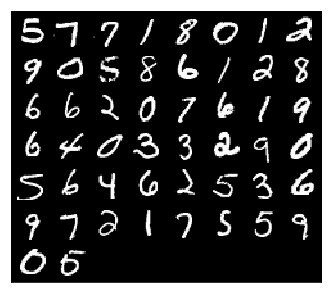

In [8]:
ml.dataset.show()

In [9]:
print(ml.model)

Net(
  (conv1): Conv2d(1, 16, kernel_size=(4, 4), stride=(4, 4))
  (conv2): Conv2d(16, 64, kernel_size=(4, 4), stride=(4, 4))
  (conv3): Conv2d(64, 256, kernel_size=(4, 4), stride=(4, 4))
  (fc_label_d1): Linear(in_features=10, out_features=32, bias=False)
  (fc_label_d2): Linear(in_features=10, out_features=32, bias=False)
  (fc_x): Linear(in_features=256, out_features=32, bias=False)
  (fc_mu): Linear(in_features=32, out_features=2, bias=False)
  (fc_logvar): Linear(in_features=32, out_features=2, bias=False)
  (fc_transcode_d1): Linear(in_features=32, out_features=256, bias=True)
  (fc_transcode_d2): Linear(in_features=32, out_features=256, bias=True)
  (deconv3): ConvTranspose2d(256, 64, kernel_size=(4, 4), stride=(4, 4))
  (deconv2): ConvTranspose2d(64, 16, kernel_size=(4, 4), stride=(4, 4))
  (deconv1): ConvTranspose2d(16, 1, kernel_size=(4, 4), stride=(4, 4))
)


In [28]:
ml.args.epochs = 1000

In [11]:
#ml.model.fc_logvar.weight

In [12]:
#ml.model.fc_logvar.weight

In [13]:
#ml.model.fc_mu.weight

In [14]:
#ml.model.fc_mu.weight

In [29]:
ml.train(path)

Train Epoch
	Train Epoch: 1 [0/60000 (0%)]	BCELoss: 9943	KL: 384
	Train Epoch: 1 [500/60000 (1%)]	BCELoss: 10536	KL: 358
	Train Epoch: 1 [1000/60000 (2%)]	BCELoss: 10527	KL: 359
	Train Epoch: 1 [1500/60000 (2%)]	BCELoss: 9918	KL: 347
	Train Epoch: 1 [2000/60000 (3%)]	BCELoss: 10065	KL: 354
	Train Epoch: 1 [2500/60000 (4%)]	BCELoss: 10381	KL: 328
	Train Epoch: 1 [3000/60000 (5%)]	BCELoss: 10657	KL: 377
	Train Epoch: 1 [3500/60000 (6%)]	BCELoss: 9986	KL: 380
	Train Epoch: 1 [4000/60000 (7%)]	BCELoss: 10349	KL: 373
	Train Epoch: 1 [4500/60000 (8%)]	BCELoss: 10203	KL: 345
	Train Epoch: 1 [5000/60000 (8%)]	BCELoss: 9174	KL: 352
	Train Epoch: 1 [5500/60000 (9%)]	BCELoss: 10038	KL: 355
	Train Epoch: 1 [6000/60000 (10%)]	BCELoss: 10523	KL: 367
	Train Epoch: 1 [6500/60000 (11%)]	BCELoss: 10048	KL: 359
	Train Epoch: 1 [7000/60000 (12%)]	BCELoss: 10333	KL: 391
	Train Epoch: 1 [7500/60000 (12%)]	BCELoss: 10440	KL: 387
	Train Epoch: 1 [8000/60000 (13%)]	BCELoss: 9355	KL: 339
	Train Epoch: 1 [8500/6

	Train Epoch: 2 [11000/60000 (18%)]	BCELoss: 9810	KL: 358
	Train Epoch: 2 [11500/60000 (19%)]	BCELoss: 10180	KL: 373
	Train Epoch: 2 [12000/60000 (20%)]	BCELoss: 10038	KL: 357
	Train Epoch: 2 [12500/60000 (21%)]	BCELoss: 10344	KL: 388
	Train Epoch: 2 [13000/60000 (22%)]	BCELoss: 10111	KL: 354
	Train Epoch: 2 [13500/60000 (22%)]	BCELoss: 9685	KL: 376
	Train Epoch: 2 [14000/60000 (23%)]	BCELoss: 9667	KL: 363
	Train Epoch: 2 [14500/60000 (24%)]	BCELoss: 10106	KL: 373
	Train Epoch: 2 [15000/60000 (25%)]	BCELoss: 10142	KL: 384
	Train Epoch: 2 [15500/60000 (26%)]	BCELoss: 10655	KL: 398
	Train Epoch: 2 [16000/60000 (27%)]	BCELoss: 9690	KL: 394
	Train Epoch: 2 [16500/60000 (28%)]	BCELoss: 9987	KL: 365
	Train Epoch: 2 [17000/60000 (28%)]	BCELoss: 9920	KL: 348
	Train Epoch: 2 [17500/60000 (29%)]	BCELoss: 10798	KL: 381
	Train Epoch: 2 [18000/60000 (30%)]	BCELoss: 10688	KL: 356
	Train Epoch: 2 [18500/60000 (31%)]	BCELoss: 9205	KL: 352
	Train Epoch: 2 [19000/60000 (32%)]	BCELoss: 9591	KL: 363
	Trai

	Train Epoch: 3 [22000/60000 (37%)]	BCELoss: 9101	KL: 361
	Train Epoch: 3 [22500/60000 (38%)]	BCELoss: 9580	KL: 345
	Train Epoch: 3 [23000/60000 (38%)]	BCELoss: 9432	KL: 370
	Train Epoch: 3 [23500/60000 (39%)]	BCELoss: 9563	KL: 394
	Train Epoch: 3 [24000/60000 (40%)]	BCELoss: 10172	KL: 377
	Train Epoch: 3 [24500/60000 (41%)]	BCELoss: 9927	KL: 369
	Train Epoch: 3 [25000/60000 (42%)]	BCELoss: 10235	KL: 380
	Train Epoch: 3 [25500/60000 (42%)]	BCELoss: 10151	KL: 399
	Train Epoch: 3 [26000/60000 (43%)]	BCELoss: 10233	KL: 392
	Train Epoch: 3 [26500/60000 (44%)]	BCELoss: 9914	KL: 360
	Train Epoch: 3 [27000/60000 (45%)]	BCELoss: 10082	KL: 373
	Train Epoch: 3 [27500/60000 (46%)]	BCELoss: 9880	KL: 343
	Train Epoch: 3 [28000/60000 (47%)]	BCELoss: 9726	KL: 391
	Train Epoch: 3 [28500/60000 (48%)]	BCELoss: 10340	KL: 375
	Train Epoch: 3 [29000/60000 (48%)]	BCELoss: 10135	KL: 355
	Train Epoch: 3 [29500/60000 (49%)]	BCELoss: 9747	KL: 358
	Train Epoch: 3 [30000/60000 (50%)]	BCELoss: 9433	KL: 378
	Train 

	Train Epoch: 4 [33000/60000 (55%)]	BCELoss: 10584	KL: 403
	Train Epoch: 4 [33500/60000 (56%)]	BCELoss: 9570	KL: 363
	Train Epoch: 4 [34000/60000 (57%)]	BCELoss: 9212	KL: 369
	Train Epoch: 4 [34500/60000 (58%)]	BCELoss: 10488	KL: 390
	Train Epoch: 4 [35000/60000 (58%)]	BCELoss: 9485	KL: 361
	Train Epoch: 4 [35500/60000 (59%)]	BCELoss: 10055	KL: 375
	Train Epoch: 4 [36000/60000 (60%)]	BCELoss: 9320	KL: 355
	Train Epoch: 4 [36500/60000 (61%)]	BCELoss: 10780	KL: 372
	Train Epoch: 4 [37000/60000 (62%)]	BCELoss: 9575	KL: 368
	Train Epoch: 4 [37500/60000 (62%)]	BCELoss: 9611	KL: 377
	Train Epoch: 4 [38000/60000 (63%)]	BCELoss: 9966	KL: 402
	Train Epoch: 4 [38500/60000 (64%)]	BCELoss: 9555	KL: 358
	Train Epoch: 4 [39000/60000 (65%)]	BCELoss: 9188	KL: 375
	Train Epoch: 4 [39500/60000 (66%)]	BCELoss: 9378	KL: 355
	Train Epoch: 4 [40000/60000 (67%)]	BCELoss: 9617	KL: 360
	Train Epoch: 4 [40500/60000 (68%)]	BCELoss: 9833	KL: 357
	Train Epoch: 4 [41000/60000 (68%)]	BCELoss: 10018	KL: 353
	Train Ep

	Train Epoch: 5 [44000/60000 (73%)]	BCELoss: 9261	KL: 358
	Train Epoch: 5 [44500/60000 (74%)]	BCELoss: 9525	KL: 390
	Train Epoch: 5 [45000/60000 (75%)]	BCELoss: 9424	KL: 400
	Train Epoch: 5 [45500/60000 (76%)]	BCELoss: 9483	KL: 381
	Train Epoch: 5 [46000/60000 (77%)]	BCELoss: 9471	KL: 373
	Train Epoch: 5 [46500/60000 (78%)]	BCELoss: 9583	KL: 366
	Train Epoch: 5 [47000/60000 (78%)]	BCELoss: 9662	KL: 364
	Train Epoch: 5 [47500/60000 (79%)]	BCELoss: 10292	KL: 411
	Train Epoch: 5 [48000/60000 (80%)]	BCELoss: 9220	KL: 392
	Train Epoch: 5 [48500/60000 (81%)]	BCELoss: 9121	KL: 358
	Train Epoch: 5 [49000/60000 (82%)]	BCELoss: 9263	KL: 372
	Train Epoch: 5 [49500/60000 (82%)]	BCELoss: 10110	KL: 356
	Train Epoch: 5 [50000/60000 (83%)]	BCELoss: 9091	KL: 381
	Train Epoch: 5 [50500/60000 (84%)]	BCELoss: 9012	KL: 369
	Train Epoch: 5 [51000/60000 (85%)]	BCELoss: 10023	KL: 367
	Train Epoch: 5 [51500/60000 (86%)]	BCELoss: 9519	KL: 388
	Train Epoch: 5 [52000/60000 (87%)]	BCELoss: 10058	KL: 356
	Train Epo

	Train Epoch: 6 [55000/60000 (92%)]	BCELoss: 9659	KL: 380
	Train Epoch: 6 [55500/60000 (92%)]	BCELoss: 9604	KL: 373
	Train Epoch: 6 [56000/60000 (93%)]	BCELoss: 9180	KL: 383
	Train Epoch: 6 [56500/60000 (94%)]	BCELoss: 9290	KL: 385
	Train Epoch: 6 [57000/60000 (95%)]	BCELoss: 9551	KL: 378
	Train Epoch: 6 [57500/60000 (96%)]	BCELoss: 10047	KL: 391
	Train Epoch: 6 [58000/60000 (97%)]	BCELoss: 9389	KL: 383
	Train Epoch: 6 [58500/60000 (98%)]	BCELoss: 9456	KL: 382
	Train Epoch: 6 [59000/60000 (98%)]	BCELoss: 9563	KL: 390
	Train Epoch: 6 [59500/60000 (99%)]	BCELoss: 8645	KL: 352
	Train Epoch: 7 [0/60000 (0%)]	BCELoss: 10061	KL: 388
	Train Epoch: 7 [500/60000 (1%)]	BCELoss: 9498	KL: 369
	Train Epoch: 7 [1000/60000 (2%)]	BCELoss: 9861	KL: 404
	Train Epoch: 7 [1500/60000 (2%)]	BCELoss: 10144	KL: 392
	Train Epoch: 7 [2000/60000 (3%)]	BCELoss: 9853	KL: 371
	Train Epoch: 7 [2500/60000 (4%)]	BCELoss: 9475	KL: 364
	Train Epoch: 7 [3000/60000 (5%)]	BCELoss: 9464	KL: 383
	Train Epoch: 7 [3500/60000 (

	Train Epoch: 8 [6000/60000 (10%)]	BCELoss: 9876	KL: 395
	Train Epoch: 8 [6500/60000 (11%)]	BCELoss: 9262	KL: 395
	Train Epoch: 8 [7000/60000 (12%)]	BCELoss: 9699	KL: 376
	Train Epoch: 8 [7500/60000 (12%)]	BCELoss: 8816	KL: 372
	Train Epoch: 8 [8000/60000 (13%)]	BCELoss: 9633	KL: 375
	Train Epoch: 8 [8500/60000 (14%)]	BCELoss: 8925	KL: 357
	Train Epoch: 8 [9000/60000 (15%)]	BCELoss: 9390	KL: 374
	Train Epoch: 8 [9500/60000 (16%)]	BCELoss: 9005	KL: 373
	Train Epoch: 8 [10000/60000 (17%)]	BCELoss: 9612	KL: 361
	Train Epoch: 8 [10500/60000 (18%)]	BCELoss: 9280	KL: 373
	Train Epoch: 8 [11000/60000 (18%)]	BCELoss: 9407	KL: 379
	Train Epoch: 8 [11500/60000 (19%)]	BCELoss: 9871	KL: 367
	Train Epoch: 8 [12000/60000 (20%)]	BCELoss: 9528	KL: 364
	Train Epoch: 8 [12500/60000 (21%)]	BCELoss: 9991	KL: 358
	Train Epoch: 8 [13000/60000 (22%)]	BCELoss: 9144	KL: 383
	Train Epoch: 8 [13500/60000 (22%)]	BCELoss: 9560	KL: 362
	Train Epoch: 8 [14000/60000 (23%)]	BCELoss: 9289	KL: 363
	Train Epoch: 8 [14500

	Train Epoch: 9 [17000/60000 (28%)]	BCELoss: 10736	KL: 381
	Train Epoch: 9 [17500/60000 (29%)]	BCELoss: 9293	KL: 350
	Train Epoch: 9 [18000/60000 (30%)]	BCELoss: 9873	KL: 392
	Train Epoch: 9 [18500/60000 (31%)]	BCELoss: 9563	KL: 370
	Train Epoch: 9 [19000/60000 (32%)]	BCELoss: 10070	KL: 404
	Train Epoch: 9 [19500/60000 (32%)]	BCELoss: 9818	KL: 374
	Train Epoch: 9 [20000/60000 (33%)]	BCELoss: 9637	KL: 412
	Train Epoch: 9 [20500/60000 (34%)]	BCELoss: 10196	KL: 428
	Train Epoch: 9 [21000/60000 (35%)]	BCELoss: 9600	KL: 381
	Train Epoch: 9 [21500/60000 (36%)]	BCELoss: 9575	KL: 397
	Train Epoch: 9 [22000/60000 (37%)]	BCELoss: 8928	KL: 361
	Train Epoch: 9 [22500/60000 (38%)]	BCELoss: 9830	KL: 389
	Train Epoch: 9 [23000/60000 (38%)]	BCELoss: 10158	KL: 375
	Train Epoch: 9 [23500/60000 (39%)]	BCELoss: 9820	KL: 403
	Train Epoch: 9 [24000/60000 (40%)]	BCELoss: 10144	KL: 392
	Train Epoch: 9 [24500/60000 (41%)]	BCELoss: 9385	KL: 366
	Train Epoch: 9 [25000/60000 (42%)]	BCELoss: 9385	KL: 398
	Train Ep

	Train Epoch: 10 [27500/60000 (46%)]	BCELoss: 9541	KL: 374
	Train Epoch: 10 [28000/60000 (47%)]	BCELoss: 9277	KL: 381
	Train Epoch: 10 [28500/60000 (48%)]	BCELoss: 10461	KL: 390
	Train Epoch: 10 [29000/60000 (48%)]	BCELoss: 9270	KL: 371
	Train Epoch: 10 [29500/60000 (49%)]	BCELoss: 9615	KL: 372
	Train Epoch: 10 [30000/60000 (50%)]	BCELoss: 9263	KL: 381
	Train Epoch: 10 [30500/60000 (51%)]	BCELoss: 8932	KL: 374
	Train Epoch: 10 [31000/60000 (52%)]	BCELoss: 9362	KL: 391
	Train Epoch: 10 [31500/60000 (52%)]	BCELoss: 9671	KL: 370
	Train Epoch: 10 [32000/60000 (53%)]	BCELoss: 9247	KL: 371
	Train Epoch: 10 [32500/60000 (54%)]	BCELoss: 9106	KL: 386
	Train Epoch: 10 [33000/60000 (55%)]	BCELoss: 9872	KL: 376
	Train Epoch: 10 [33500/60000 (56%)]	BCELoss: 9432	KL: 378
	Train Epoch: 10 [34000/60000 (57%)]	BCELoss: 9601	KL: 381
	Train Epoch: 10 [34500/60000 (58%)]	BCELoss: 9085	KL: 375
	Train Epoch: 10 [35000/60000 (58%)]	BCELoss: 9495	KL: 361
	Train Epoch: 10 [35500/60000 (59%)]	BCELoss: 9362	KL: 

	Train Epoch: 11 [37500/60000 (62%)]	BCELoss: 9887	KL: 421
	Train Epoch: 11 [38000/60000 (63%)]	BCELoss: 9201	KL: 380
	Train Epoch: 11 [38500/60000 (64%)]	BCELoss: 9458	KL: 364
	Train Epoch: 11 [39000/60000 (65%)]	BCELoss: 9583	KL: 417
	Train Epoch: 11 [39500/60000 (66%)]	BCELoss: 9603	KL: 371
	Train Epoch: 11 [40000/60000 (67%)]	BCELoss: 9514	KL: 385
	Train Epoch: 11 [40500/60000 (68%)]	BCELoss: 8840	KL: 360
	Train Epoch: 11 [41000/60000 (68%)]	BCELoss: 9721	KL: 381
	Train Epoch: 11 [41500/60000 (69%)]	BCELoss: 8824	KL: 373
	Train Epoch: 11 [42000/60000 (70%)]	BCELoss: 9345	KL: 384
	Train Epoch: 11 [42500/60000 (71%)]	BCELoss: 9498	KL: 382
	Train Epoch: 11 [43000/60000 (72%)]	BCELoss: 9808	KL: 383
	Train Epoch: 11 [43500/60000 (72%)]	BCELoss: 9684	KL: 370
	Train Epoch: 11 [44000/60000 (73%)]	BCELoss: 9258	KL: 365
	Train Epoch: 11 [44500/60000 (74%)]	BCELoss: 9145	KL: 359
	Train Epoch: 11 [45000/60000 (75%)]	BCELoss: 8631	KL: 363
	Train Epoch: 11 [45500/60000 (76%)]	BCELoss: 9270	KL: 3

	Train Epoch: 12 [47500/60000 (79%)]	BCELoss: 10470	KL: 396
	Train Epoch: 12 [48000/60000 (80%)]	BCELoss: 8828	KL: 376
	Train Epoch: 12 [48500/60000 (81%)]	BCELoss: 9763	KL: 379
	Train Epoch: 12 [49000/60000 (82%)]	BCELoss: 9427	KL: 379
	Train Epoch: 12 [49500/60000 (82%)]	BCELoss: 9489	KL: 382
	Train Epoch: 12 [50000/60000 (83%)]	BCELoss: 9411	KL: 389
	Train Epoch: 12 [50500/60000 (84%)]	BCELoss: 8872	KL: 382
	Train Epoch: 12 [51000/60000 (85%)]	BCELoss: 9693	KL: 399
	Train Epoch: 12 [51500/60000 (86%)]	BCELoss: 8849	KL: 366
	Train Epoch: 12 [52000/60000 (87%)]	BCELoss: 9233	KL: 367
	Train Epoch: 12 [52500/60000 (88%)]	BCELoss: 9475	KL: 363
	Train Epoch: 12 [53000/60000 (88%)]	BCELoss: 9442	KL: 368
	Train Epoch: 12 [53500/60000 (89%)]	BCELoss: 9359	KL: 370
	Train Epoch: 12 [54000/60000 (90%)]	BCELoss: 9280	KL: 391
	Train Epoch: 12 [54500/60000 (91%)]	BCELoss: 9472	KL: 377
	Train Epoch: 12 [55000/60000 (92%)]	BCELoss: 9813	KL: 414
	Train Epoch: 12 [55500/60000 (92%)]	BCELoss: 10149	KL:

	Train Epoch: 13 [57500/60000 (96%)]	BCELoss: 9670	KL: 372
	Train Epoch: 13 [58000/60000 (97%)]	BCELoss: 9792	KL: 373
	Train Epoch: 13 [58500/60000 (98%)]	BCELoss: 9692	KL: 368
	Train Epoch: 13 [59000/60000 (98%)]	BCELoss: 9279	KL: 378
	Train Epoch: 13 [59500/60000 (99%)]	BCELoss: 9279	KL: 386
	Train Epoch: 14 [0/60000 (0%)]	BCELoss: 9501	KL: 380
	Train Epoch: 14 [500/60000 (1%)]	BCELoss: 9593	KL: 375
	Train Epoch: 14 [1000/60000 (2%)]	BCELoss: 9263	KL: 397
	Train Epoch: 14 [1500/60000 (2%)]	BCELoss: 9207	KL: 368
	Train Epoch: 14 [2000/60000 (3%)]	BCELoss: 9217	KL: 367
	Train Epoch: 14 [2500/60000 (4%)]	BCELoss: 9280	KL: 369
	Train Epoch: 14 [3000/60000 (5%)]	BCELoss: 9280	KL: 360
	Train Epoch: 14 [3500/60000 (6%)]	BCELoss: 8541	KL: 369
	Train Epoch: 14 [4000/60000 (7%)]	BCELoss: 9361	KL: 381
	Train Epoch: 14 [4500/60000 (8%)]	BCELoss: 9423	KL: 378
	Train Epoch: 14 [5000/60000 (8%)]	BCELoss: 9811	KL: 384
	Train Epoch: 14 [5500/60000 (9%)]	BCELoss: 9667	KL: 405
	Train Epoch: 14 [6000/60

	Train Epoch: 15 [7500/60000 (12%)]	BCELoss: 9713	KL: 391
	Train Epoch: 15 [8000/60000 (13%)]	BCELoss: 9502	KL: 390
	Train Epoch: 15 [8500/60000 (14%)]	BCELoss: 8717	KL: 376
	Train Epoch: 15 [9000/60000 (15%)]	BCELoss: 9761	KL: 391
	Train Epoch: 15 [9500/60000 (16%)]	BCELoss: 9864	KL: 378
	Train Epoch: 15 [10000/60000 (17%)]	BCELoss: 9596	KL: 400
	Train Epoch: 15 [10500/60000 (18%)]	BCELoss: 9565	KL: 374
	Train Epoch: 15 [11000/60000 (18%)]	BCELoss: 8639	KL: 377
	Train Epoch: 15 [11500/60000 (19%)]	BCELoss: 9430	KL: 370
	Train Epoch: 15 [12000/60000 (20%)]	BCELoss: 9552	KL: 380
	Train Epoch: 15 [12500/60000 (21%)]	BCELoss: 8741	KL: 390
	Train Epoch: 15 [13000/60000 (22%)]	BCELoss: 9563	KL: 375
	Train Epoch: 15 [13500/60000 (22%)]	BCELoss: 9541	KL: 391
	Train Epoch: 15 [14000/60000 (23%)]	BCELoss: 8768	KL: 379
	Train Epoch: 15 [14500/60000 (24%)]	BCELoss: 9008	KL: 373
	Train Epoch: 15 [15000/60000 (25%)]	BCELoss: 9263	KL: 386
	Train Epoch: 15 [15500/60000 (26%)]	BCELoss: 9818	KL: 384
	T

	Train Epoch: 16 [17500/60000 (29%)]	BCELoss: 9255	KL: 375
	Train Epoch: 16 [18000/60000 (30%)]	BCELoss: 9612	KL: 382
	Train Epoch: 16 [18500/60000 (31%)]	BCELoss: 9095	KL: 366
	Train Epoch: 16 [19000/60000 (32%)]	BCELoss: 9050	KL: 381
	Train Epoch: 16 [19500/60000 (32%)]	BCELoss: 9553	KL: 367
	Train Epoch: 16 [20000/60000 (33%)]	BCELoss: 8805	KL: 388
	Train Epoch: 16 [20500/60000 (34%)]	BCELoss: 9100	KL: 367
	Train Epoch: 16 [21000/60000 (35%)]	BCELoss: 8828	KL: 348
	Train Epoch: 16 [21500/60000 (36%)]	BCELoss: 9663	KL: 379
	Train Epoch: 16 [22000/60000 (37%)]	BCELoss: 9239	KL: 382
	Train Epoch: 16 [22500/60000 (38%)]	BCELoss: 9323	KL: 378
	Train Epoch: 16 [23000/60000 (38%)]	BCELoss: 8967	KL: 374
	Train Epoch: 16 [23500/60000 (39%)]	BCELoss: 9926	KL: 399
	Train Epoch: 16 [24000/60000 (40%)]	BCELoss: 9012	KL: 377
	Train Epoch: 16 [24500/60000 (41%)]	BCELoss: 9600	KL: 381
	Train Epoch: 16 [25000/60000 (42%)]	BCELoss: 8779	KL: 376
	Train Epoch: 16 [25500/60000 (42%)]	BCELoss: 10150	KL: 

	Train Epoch: 17 [27500/60000 (46%)]	BCELoss: 10036	KL: 398
	Train Epoch: 17 [28000/60000 (47%)]	BCELoss: 9744	KL: 376
	Train Epoch: 17 [28500/60000 (48%)]	BCELoss: 9877	KL: 411
	Train Epoch: 17 [29000/60000 (48%)]	BCELoss: 9462	KL: 393
	Train Epoch: 17 [29500/60000 (49%)]	BCELoss: 9741	KL: 419
	Train Epoch: 17 [30000/60000 (50%)]	BCELoss: 9188	KL: 387
	Train Epoch: 17 [30500/60000 (51%)]	BCELoss: 9733	KL: 379
	Train Epoch: 17 [31000/60000 (52%)]	BCELoss: 9031	KL: 376
	Train Epoch: 17 [31500/60000 (52%)]	BCELoss: 9124	KL: 369
	Train Epoch: 17 [32000/60000 (53%)]	BCELoss: 9547	KL: 413
	Train Epoch: 17 [32500/60000 (54%)]	BCELoss: 9576	KL: 375
	Train Epoch: 17 [33000/60000 (55%)]	BCELoss: 8742	KL: 382
	Train Epoch: 17 [33500/60000 (56%)]	BCELoss: 9392	KL: 364
	Train Epoch: 17 [34000/60000 (57%)]	BCELoss: 9247	KL: 375
	Train Epoch: 17 [34500/60000 (58%)]	BCELoss: 8770	KL: 369
	Train Epoch: 17 [35000/60000 (58%)]	BCELoss: 9450	KL: 372
	Train Epoch: 17 [35500/60000 (59%)]	BCELoss: 8943	KL: 

	Train Epoch: 18 [37500/60000 (62%)]	BCELoss: 9514	KL: 375
	Train Epoch: 18 [38000/60000 (63%)]	BCELoss: 9761	KL: 372
	Train Epoch: 18 [38500/60000 (64%)]	BCELoss: 9429	KL: 380
	Train Epoch: 18 [39000/60000 (65%)]	BCELoss: 9162	KL: 370
	Train Epoch: 18 [39500/60000 (66%)]	BCELoss: 8955	KL: 379
	Train Epoch: 18 [40000/60000 (67%)]	BCELoss: 9045	KL: 385
	Train Epoch: 18 [40500/60000 (68%)]	BCELoss: 9394	KL: 385
	Train Epoch: 18 [41000/60000 (68%)]	BCELoss: 9363	KL: 380
	Train Epoch: 18 [41500/60000 (69%)]	BCELoss: 8958	KL: 377
	Train Epoch: 18 [42000/60000 (70%)]	BCELoss: 9891	KL: 390
	Train Epoch: 18 [42500/60000 (71%)]	BCELoss: 9116	KL: 390
	Train Epoch: 18 [43000/60000 (72%)]	BCELoss: 9495	KL: 372
	Train Epoch: 18 [43500/60000 (72%)]	BCELoss: 9004	KL: 404
	Train Epoch: 18 [44000/60000 (73%)]	BCELoss: 10007	KL: 407
	Train Epoch: 18 [44500/60000 (74%)]	BCELoss: 9052	KL: 384
	Train Epoch: 18 [45000/60000 (75%)]	BCELoss: 9973	KL: 376
	Train Epoch: 18 [45500/60000 (76%)]	BCELoss: 9609	KL: 

	Train Epoch: 19 [47500/60000 (79%)]	BCELoss: 9535	KL: 409
	Train Epoch: 19 [48000/60000 (80%)]	BCELoss: 9440	KL: 385
	Train Epoch: 19 [48500/60000 (81%)]	BCELoss: 9401	KL: 382
	Train Epoch: 19 [49000/60000 (82%)]	BCELoss: 8973	KL: 385
	Train Epoch: 19 [49500/60000 (82%)]	BCELoss: 9119	KL: 374
	Train Epoch: 19 [50000/60000 (83%)]	BCELoss: 9534	KL: 375
	Train Epoch: 19 [50500/60000 (84%)]	BCELoss: 9756	KL: 385
	Train Epoch: 19 [51000/60000 (85%)]	BCELoss: 8688	KL: 381
	Train Epoch: 19 [51500/60000 (86%)]	BCELoss: 9602	KL: 381
	Train Epoch: 19 [52000/60000 (87%)]	BCELoss: 9503	KL: 380
	Train Epoch: 19 [52500/60000 (88%)]	BCELoss: 10554	KL: 368
	Train Epoch: 19 [53000/60000 (88%)]	BCELoss: 9074	KL: 438
	Train Epoch: 19 [53500/60000 (89%)]	BCELoss: 9060	KL: 375
	Train Epoch: 19 [54000/60000 (90%)]	BCELoss: 9738	KL: 401
	Train Epoch: 19 [54500/60000 (91%)]	BCELoss: 8901	KL: 379
	Train Epoch: 19 [55000/60000 (92%)]	BCELoss: 9781	KL: 381
	Train Epoch: 19 [55500/60000 (92%)]	BCELoss: 9494	KL: 

	Train Epoch: 20 [57500/60000 (96%)]	BCELoss: 9388	KL: 382
	Train Epoch: 20 [58000/60000 (97%)]	BCELoss: 9037	KL: 373
	Train Epoch: 20 [58500/60000 (98%)]	BCELoss: 8802	KL: 381
	Train Epoch: 20 [59000/60000 (98%)]	BCELoss: 9080	KL: 391
	Train Epoch: 20 [59500/60000 (99%)]	BCELoss: 8888	KL: 371
	Train Epoch: 21 [0/60000 (0%)]	BCELoss: 9511	KL: 386
	Train Epoch: 21 [500/60000 (1%)]	BCELoss: 11362	KL: 381
	Train Epoch: 21 [1000/60000 (2%)]	BCELoss: 9280	KL: 378
	Train Epoch: 21 [1500/60000 (2%)]	BCELoss: 9225	KL: 391
	Train Epoch: 21 [2000/60000 (3%)]	BCELoss: 9228	KL: 380
	Train Epoch: 21 [2500/60000 (4%)]	BCELoss: 9227	KL: 376
	Train Epoch: 21 [3000/60000 (5%)]	BCELoss: 9313	KL: 379
	Train Epoch: 21 [3500/60000 (6%)]	BCELoss: 9278	KL: 373
	Train Epoch: 21 [4000/60000 (7%)]	BCELoss: 9709	KL: 387
	Train Epoch: 21 [4500/60000 (8%)]	BCELoss: 9491	KL: 375
	Train Epoch: 21 [5000/60000 (8%)]	BCELoss: 9018	KL: 369
	Train Epoch: 21 [5500/60000 (9%)]	BCELoss: 8996	KL: 385
	Train Epoch: 21 [6000/6

	Train Epoch: 22 [7500/60000 (12%)]	BCELoss: 9352	KL: 385
	Train Epoch: 22 [8000/60000 (13%)]	BCELoss: 8854	KL: 376
	Train Epoch: 22 [8500/60000 (14%)]	BCELoss: 9241	KL: 383
	Train Epoch: 22 [9000/60000 (15%)]	BCELoss: 8833	KL: 369
	Train Epoch: 22 [9500/60000 (16%)]	BCELoss: 9520	KL: 414
	Train Epoch: 22 [10000/60000 (17%)]	BCELoss: 8821	KL: 362
	Train Epoch: 22 [10500/60000 (18%)]	BCELoss: 9279	KL: 378
	Train Epoch: 22 [11000/60000 (18%)]	BCELoss: 10668	KL: 367
	Train Epoch: 22 [11500/60000 (19%)]	BCELoss: 9196	KL: 383
	Train Epoch: 22 [12000/60000 (20%)]	BCELoss: 9501	KL: 396
	Train Epoch: 22 [12500/60000 (21%)]	BCELoss: 9192	KL: 381
	Train Epoch: 22 [13000/60000 (22%)]	BCELoss: 8916	KL: 398
	Train Epoch: 22 [13500/60000 (22%)]	BCELoss: 9167	KL: 387
	Train Epoch: 22 [14000/60000 (23%)]	BCELoss: 9041	KL: 372
	Train Epoch: 22 [14500/60000 (24%)]	BCELoss: 9062	KL: 376
	Train Epoch: 22 [15000/60000 (25%)]	BCELoss: 9885	KL: 397
	Train Epoch: 22 [15500/60000 (26%)]	BCELoss: 8878	KL: 413
	

	Train Epoch: 23 [17500/60000 (29%)]	BCELoss: 9413	KL: 396
	Train Epoch: 23 [18000/60000 (30%)]	BCELoss: 9067	KL: 376
	Train Epoch: 23 [18500/60000 (31%)]	BCELoss: 9018	KL: 378
	Train Epoch: 23 [19000/60000 (32%)]	BCELoss: 9066	KL: 382
	Train Epoch: 23 [19500/60000 (32%)]	BCELoss: 8800	KL: 393
	Train Epoch: 23 [20000/60000 (33%)]	BCELoss: 9065	KL: 361
	Train Epoch: 23 [20500/60000 (34%)]	BCELoss: 9361	KL: 384
	Train Epoch: 23 [21000/60000 (35%)]	BCELoss: 9542	KL: 381
	Train Epoch: 23 [21500/60000 (36%)]	BCELoss: 9496	KL: 391
	Train Epoch: 23 [22000/60000 (37%)]	BCELoss: 9044	KL: 378
	Train Epoch: 23 [22500/60000 (38%)]	BCELoss: 9109	KL: 367
	Train Epoch: 23 [23000/60000 (38%)]	BCELoss: 9061	KL: 356
	Train Epoch: 23 [23500/60000 (39%)]	BCELoss: 9423	KL: 376
	Train Epoch: 23 [24000/60000 (40%)]	BCELoss: 8551	KL: 393
	Train Epoch: 23 [24500/60000 (41%)]	BCELoss: 9359	KL: 388
	Train Epoch: 23 [25000/60000 (42%)]	BCELoss: 9023	KL: 402
	Train Epoch: 23 [25500/60000 (42%)]	BCELoss: 9355	KL: 3

	Train Epoch: 24 [27500/60000 (46%)]	BCELoss: 9118	KL: 391
	Train Epoch: 24 [28000/60000 (47%)]	BCELoss: 9247	KL: 389
	Train Epoch: 24 [28500/60000 (48%)]	BCELoss: 9076	KL: 379
	Train Epoch: 24 [29000/60000 (48%)]	BCELoss: 9274	KL: 378
	Train Epoch: 24 [29500/60000 (49%)]	BCELoss: 9007	KL: 372
	Train Epoch: 24 [30000/60000 (50%)]	BCELoss: 9605	KL: 389
	Train Epoch: 24 [30500/60000 (51%)]	BCELoss: 9915	KL: 396
	Train Epoch: 24 [31000/60000 (52%)]	BCELoss: 8979	KL: 377
	Train Epoch: 24 [31500/60000 (52%)]	BCELoss: 8692	KL: 366
	Train Epoch: 24 [32000/60000 (53%)]	BCELoss: 9133	KL: 414
	Train Epoch: 24 [32500/60000 (54%)]	BCELoss: 8538	KL: 376
	Train Epoch: 24 [33000/60000 (55%)]	BCELoss: 8993	KL: 378
	Train Epoch: 24 [33500/60000 (56%)]	BCELoss: 9208	KL: 402
	Train Epoch: 24 [34000/60000 (57%)]	BCELoss: 8621	KL: 384
	Train Epoch: 24 [34500/60000 (58%)]	BCELoss: 9107	KL: 379
	Train Epoch: 24 [35000/60000 (58%)]	BCELoss: 9774	KL: 388
	Train Epoch: 24 [35500/60000 (59%)]	BCELoss: 9512	KL: 3

	Train Epoch: 25 [37500/60000 (62%)]	BCELoss: 9491	KL: 383
	Train Epoch: 25 [38000/60000 (63%)]	BCELoss: 8833	KL: 377
	Train Epoch: 25 [38500/60000 (64%)]	BCELoss: 9042	KL: 388
	Train Epoch: 25 [39000/60000 (65%)]	BCELoss: 8423	KL: 384
	Train Epoch: 25 [39500/60000 (66%)]	BCELoss: 9383	KL: 377
	Train Epoch: 25 [40000/60000 (67%)]	BCELoss: 9413	KL: 371
	Train Epoch: 25 [40500/60000 (68%)]	BCELoss: 8949	KL: 374
	Train Epoch: 25 [41000/60000 (68%)]	BCELoss: 9309	KL: 375
	Train Epoch: 25 [41500/60000 (69%)]	BCELoss: 8819	KL: 390
	Train Epoch: 25 [42000/60000 (70%)]	BCELoss: 9610	KL: 385
	Train Epoch: 25 [42500/60000 (71%)]	BCELoss: 9371	KL: 379
	Train Epoch: 25 [43000/60000 (72%)]	BCELoss: 8993	KL: 372
	Train Epoch: 25 [43500/60000 (72%)]	BCELoss: 8680	KL: 368
	Train Epoch: 25 [44000/60000 (73%)]	BCELoss: 8751	KL: 372
	Train Epoch: 25 [44500/60000 (74%)]	BCELoss: 8776	KL: 381
	Train Epoch: 25 [45000/60000 (75%)]	BCELoss: 9035	KL: 388
	Train Epoch: 25 [45500/60000 (76%)]	BCELoss: 9249	KL: 3

	Train Epoch: 26 [47500/60000 (79%)]	BCELoss: 9285	KL: 399
	Train Epoch: 26 [48000/60000 (80%)]	BCELoss: 9177	KL: 372
	Train Epoch: 26 [48500/60000 (81%)]	BCELoss: 9209	KL: 362
	Train Epoch: 26 [49000/60000 (82%)]	BCELoss: 8721	KL: 362
	Train Epoch: 26 [49500/60000 (82%)]	BCELoss: 8950	KL: 389
	Train Epoch: 26 [50000/60000 (83%)]	BCELoss: 8987	KL: 396
	Train Epoch: 26 [50500/60000 (84%)]	BCELoss: 9402	KL: 391
	Train Epoch: 26 [51000/60000 (85%)]	BCELoss: 8983	KL: 371
	Train Epoch: 26 [51500/60000 (86%)]	BCELoss: 8842	KL: 368
	Train Epoch: 26 [52000/60000 (87%)]	BCELoss: 8858	KL: 383
	Train Epoch: 26 [52500/60000 (88%)]	BCELoss: 8738	KL: 367
	Train Epoch: 26 [53000/60000 (88%)]	BCELoss: 9445	KL: 387
	Train Epoch: 26 [53500/60000 (89%)]	BCELoss: 9756	KL: 396
	Train Epoch: 26 [54000/60000 (90%)]	BCELoss: 9655	KL: 393
	Train Epoch: 26 [54500/60000 (91%)]	BCELoss: 9678	KL: 376
	Train Epoch: 26 [55000/60000 (92%)]	BCELoss: 9831	KL: 383
	Train Epoch: 26 [55500/60000 (92%)]	BCELoss: 9595	KL: 3

	Train Epoch: 27 [57500/60000 (96%)]	BCELoss: 9266	KL: 440
	Train Epoch: 27 [58000/60000 (97%)]	BCELoss: 9124	KL: 378
	Train Epoch: 27 [58500/60000 (98%)]	BCELoss: 9585	KL: 382
	Train Epoch: 27 [59000/60000 (98%)]	BCELoss: 9418	KL: 384
	Train Epoch: 27 [59500/60000 (99%)]	BCELoss: 9603	KL: 368
	Train Epoch: 28 [0/60000 (0%)]	BCELoss: 8785	KL: 375
	Train Epoch: 28 [500/60000 (1%)]	BCELoss: 9703	KL: 367
	Train Epoch: 28 [1000/60000 (2%)]	BCELoss: 9700	KL: 392
	Train Epoch: 28 [1500/60000 (2%)]	BCELoss: 9333	KL: 373
	Train Epoch: 28 [2000/60000 (3%)]	BCELoss: 9294	KL: 370
	Train Epoch: 28 [2500/60000 (4%)]	BCELoss: 9104	KL: 429
	Train Epoch: 28 [3000/60000 (5%)]	BCELoss: 9196	KL: 390
	Train Epoch: 28 [3500/60000 (6%)]	BCELoss: 9119	KL: 383
	Train Epoch: 28 [4000/60000 (7%)]	BCELoss: 9276	KL: 378
	Train Epoch: 28 [4500/60000 (8%)]	BCELoss: 8803	KL: 381
	Train Epoch: 28 [5000/60000 (8%)]	BCELoss: 9525	KL: 378
	Train Epoch: 28 [5500/60000 (9%)]	BCELoss: 8925	KL: 380
	Train Epoch: 28 [6000/60

	Train Epoch: 29 [7500/60000 (12%)]	BCELoss: 9726	KL: 419
	Train Epoch: 29 [8000/60000 (13%)]	BCELoss: 8965	KL: 384
	Train Epoch: 29 [8500/60000 (14%)]	BCELoss: 8958	KL: 406
	Train Epoch: 29 [9000/60000 (15%)]	BCELoss: 9172	KL: 367
	Train Epoch: 29 [9500/60000 (16%)]	BCELoss: 9989	KL: 397
	Train Epoch: 29 [10000/60000 (17%)]	BCELoss: 9120	KL: 395
	Train Epoch: 29 [10500/60000 (18%)]	BCELoss: 8801	KL: 383
	Train Epoch: 29 [11000/60000 (18%)]	BCELoss: 9198	KL: 366
	Train Epoch: 29 [11500/60000 (19%)]	BCELoss: 9024	KL: 393
	Train Epoch: 29 [12000/60000 (20%)]	BCELoss: 9201	KL: 395
	Train Epoch: 29 [12500/60000 (21%)]	BCELoss: 9033	KL: 386
	Train Epoch: 29 [13000/60000 (22%)]	BCELoss: 8938	KL: 396
	Train Epoch: 29 [13500/60000 (22%)]	BCELoss: 9382	KL: 403
	Train Epoch: 29 [14000/60000 (23%)]	BCELoss: 8715	KL: 385
	Train Epoch: 29 [14500/60000 (24%)]	BCELoss: 9320	KL: 381
	Train Epoch: 29 [15000/60000 (25%)]	BCELoss: 9255	KL: 379
	Train Epoch: 29 [15500/60000 (26%)]	BCELoss: 8621	KL: 381
	T

	Train Epoch: 30 [17500/60000 (29%)]	BCELoss: 8951	KL: 388
	Train Epoch: 30 [18000/60000 (30%)]	BCELoss: 9433	KL: 381
	Train Epoch: 30 [18500/60000 (31%)]	BCELoss: 9367	KL: 379
	Train Epoch: 30 [19000/60000 (32%)]	BCELoss: 9207	KL: 370
	Train Epoch: 30 [19500/60000 (32%)]	BCELoss: 9753	KL: 397
	Train Epoch: 30 [20000/60000 (33%)]	BCELoss: 9648	KL: 384
	Train Epoch: 30 [20500/60000 (34%)]	BCELoss: 9373	KL: 380
	Train Epoch: 30 [21000/60000 (35%)]	BCELoss: 9074	KL: 378
	Train Epoch: 30 [21500/60000 (36%)]	BCELoss: 10030	KL: 388
	Train Epoch: 30 [22000/60000 (37%)]	BCELoss: 9133	KL: 382
	Train Epoch: 30 [22500/60000 (38%)]	BCELoss: 10920	KL: 393
	Train Epoch: 30 [23000/60000 (38%)]	BCELoss: 9576	KL: 374
	Train Epoch: 30 [23500/60000 (39%)]	BCELoss: 9463	KL: 369
	Train Epoch: 30 [24000/60000 (40%)]	BCELoss: 9371	KL: 376
	Train Epoch: 30 [24500/60000 (41%)]	BCELoss: 9529	KL: 384
	Train Epoch: 30 [25000/60000 (42%)]	BCELoss: 9547	KL: 386
	Train Epoch: 30 [25500/60000 (42%)]	BCELoss: 9701	KL:

	Train Epoch: 31 [27500/60000 (46%)]	BCELoss: 8875	KL: 406
	Train Epoch: 31 [28000/60000 (47%)]	BCELoss: 9187	KL: 384
	Train Epoch: 31 [28500/60000 (48%)]	BCELoss: 9259	KL: 397
	Train Epoch: 31 [29000/60000 (48%)]	BCELoss: 8896	KL: 407
	Train Epoch: 31 [29500/60000 (49%)]	BCELoss: 9487	KL: 390
	Train Epoch: 31 [30000/60000 (50%)]	BCELoss: 9151	KL: 391
	Train Epoch: 31 [30500/60000 (51%)]	BCELoss: 9253	KL: 378
	Train Epoch: 31 [31000/60000 (52%)]	BCELoss: 9345	KL: 381
	Train Epoch: 31 [31500/60000 (52%)]	BCELoss: 9005	KL: 371
	Train Epoch: 31 [32000/60000 (53%)]	BCELoss: 8258	KL: 376
	Train Epoch: 31 [32500/60000 (54%)]	BCELoss: 10316	KL: 386
	Train Epoch: 31 [33000/60000 (55%)]	BCELoss: 9247	KL: 376
	Train Epoch: 31 [33500/60000 (56%)]	BCELoss: 9273	KL: 381
	Train Epoch: 31 [34000/60000 (57%)]	BCELoss: 8716	KL: 379
	Train Epoch: 31 [34500/60000 (58%)]	BCELoss: 8687	KL: 385
	Train Epoch: 31 [35000/60000 (58%)]	BCELoss: 8685	KL: 381
	Train Epoch: 31 [35500/60000 (59%)]	BCELoss: 9566	KL: 

	Train Epoch: 32 [37500/60000 (62%)]	BCELoss: 8978	KL: 371
	Train Epoch: 32 [38000/60000 (63%)]	BCELoss: 8959	KL: 381
	Train Epoch: 32 [38500/60000 (64%)]	BCELoss: 9514	KL: 378
	Train Epoch: 32 [39000/60000 (65%)]	BCELoss: 9240	KL: 375
	Train Epoch: 32 [39500/60000 (66%)]	BCELoss: 9250	KL: 377
	Train Epoch: 32 [40000/60000 (67%)]	BCELoss: 9962	KL: 392
	Train Epoch: 32 [40500/60000 (68%)]	BCELoss: 9307	KL: 372
	Train Epoch: 32 [41000/60000 (68%)]	BCELoss: 9472	KL: 372
	Train Epoch: 32 [41500/60000 (69%)]	BCELoss: 8916	KL: 359
	Train Epoch: 32 [42000/60000 (70%)]	BCELoss: 9072	KL: 384
	Train Epoch: 32 [42500/60000 (71%)]	BCELoss: 9102	KL: 395
	Train Epoch: 32 [43000/60000 (72%)]	BCELoss: 9648	KL: 383
	Train Epoch: 32 [43500/60000 (72%)]	BCELoss: 8932	KL: 381
	Train Epoch: 32 [44000/60000 (73%)]	BCELoss: 9017	KL: 401
	Train Epoch: 32 [44500/60000 (74%)]	BCELoss: 8772	KL: 397
	Train Epoch: 32 [45000/60000 (75%)]	BCELoss: 9144	KL: 394
	Train Epoch: 32 [45500/60000 (76%)]	BCELoss: 9475	KL: 3

	Train Epoch: 33 [47500/60000 (79%)]	BCELoss: 8888	KL: 383
	Train Epoch: 33 [48000/60000 (80%)]	BCELoss: 9231	KL: 373
	Train Epoch: 33 [48500/60000 (81%)]	BCELoss: 9310	KL: 378
	Train Epoch: 33 [49000/60000 (82%)]	BCELoss: 8943	KL: 368
	Train Epoch: 33 [49500/60000 (82%)]	BCELoss: 9058	KL: 371
	Train Epoch: 33 [50000/60000 (83%)]	BCELoss: 8885	KL: 375
	Train Epoch: 33 [50500/60000 (84%)]	BCELoss: 9432	KL: 391
	Train Epoch: 33 [51000/60000 (85%)]	BCELoss: 9289	KL: 391
	Train Epoch: 33 [51500/60000 (86%)]	BCELoss: 9220	KL: 408
	Train Epoch: 33 [52000/60000 (87%)]	BCELoss: 8625	KL: 380
	Train Epoch: 33 [52500/60000 (88%)]	BCELoss: 9250	KL: 382
	Train Epoch: 33 [53000/60000 (88%)]	BCELoss: 9214	KL: 379
	Train Epoch: 33 [53500/60000 (89%)]	BCELoss: 9323	KL: 383
	Train Epoch: 33 [54000/60000 (90%)]	BCELoss: 9608	KL: 378
	Train Epoch: 33 [54500/60000 (91%)]	BCELoss: 9286	KL: 378
	Train Epoch: 33 [55000/60000 (92%)]	BCELoss: 9383	KL: 376
	Train Epoch: 33 [55500/60000 (92%)]	BCELoss: 9535	KL: 3

	Train Epoch: 34 [57500/60000 (96%)]	BCELoss: 8809	KL: 402
	Train Epoch: 34 [58000/60000 (97%)]	BCELoss: 9075	KL: 400
	Train Epoch: 34 [58500/60000 (98%)]	BCELoss: 8677	KL: 381
	Train Epoch: 34 [59000/60000 (98%)]	BCELoss: 9678	KL: 385
	Train Epoch: 34 [59500/60000 (99%)]	BCELoss: 9554	KL: 400
	Train Epoch: 35 [0/60000 (0%)]	BCELoss: 8921	KL: 380
	Train Epoch: 35 [500/60000 (1%)]	BCELoss: 9138	KL: 366
	Train Epoch: 35 [1000/60000 (2%)]	BCELoss: 9251	KL: 383
	Train Epoch: 35 [1500/60000 (2%)]	BCELoss: 8547	KL: 370
	Train Epoch: 35 [2000/60000 (3%)]	BCELoss: 8469	KL: 376
	Train Epoch: 35 [2500/60000 (4%)]	BCELoss: 8836	KL: 373
	Train Epoch: 35 [3000/60000 (5%)]	BCELoss: 10366	KL: 398
	Train Epoch: 35 [3500/60000 (6%)]	BCELoss: 8994	KL: 375
	Train Epoch: 35 [4000/60000 (7%)]	BCELoss: 8376	KL: 368
	Train Epoch: 35 [4500/60000 (8%)]	BCELoss: 10008	KL: 383
	Train Epoch: 35 [5000/60000 (8%)]	BCELoss: 9081	KL: 373
	Train Epoch: 35 [5500/60000 (9%)]	BCELoss: 9655	KL: 396
	Train Epoch: 35 [6000/

	Train Epoch: 36 [7500/60000 (12%)]	BCELoss: 8837	KL: 384
	Train Epoch: 36 [8000/60000 (13%)]	BCELoss: 8543	KL: 374
	Train Epoch: 36 [8500/60000 (14%)]	BCELoss: 9483	KL: 392
	Train Epoch: 36 [9000/60000 (15%)]	BCELoss: 9310	KL: 402
	Train Epoch: 36 [9500/60000 (16%)]	BCELoss: 9034	KL: 385
	Train Epoch: 36 [10000/60000 (17%)]	BCELoss: 9289	KL: 378
	Train Epoch: 36 [10500/60000 (18%)]	BCELoss: 9022	KL: 391
	Train Epoch: 36 [11000/60000 (18%)]	BCELoss: 8372	KL: 384
	Train Epoch: 36 [11500/60000 (19%)]	BCELoss: 8940	KL: 377
	Train Epoch: 36 [12000/60000 (20%)]	BCELoss: 9124	KL: 394
	Train Epoch: 36 [12500/60000 (21%)]	BCELoss: 9215	KL: 381
	Train Epoch: 36 [13000/60000 (22%)]	BCELoss: 9487	KL: 377
	Train Epoch: 36 [13500/60000 (22%)]	BCELoss: 10143	KL: 381
	Train Epoch: 36 [14000/60000 (23%)]	BCELoss: 9386	KL: 390
	Train Epoch: 36 [14500/60000 (24%)]	BCELoss: 8767	KL: 392
	Train Epoch: 36 [15000/60000 (25%)]	BCELoss: 9128	KL: 406
	Train Epoch: 36 [15500/60000 (26%)]	BCELoss: 9176	KL: 378
	

	Train Epoch: 37 [17500/60000 (29%)]	BCELoss: 8923	KL: 377
	Train Epoch: 37 [18000/60000 (30%)]	BCELoss: 9138	KL: 378
	Train Epoch: 37 [18500/60000 (31%)]	BCELoss: 9122	KL: 378
	Train Epoch: 37 [19000/60000 (32%)]	BCELoss: 9064	KL: 382
	Train Epoch: 37 [19500/60000 (32%)]	BCELoss: 9604	KL: 391
	Train Epoch: 37 [20000/60000 (33%)]	BCELoss: 8280	KL: 368
	Train Epoch: 37 [20500/60000 (34%)]	BCELoss: 10205	KL: 372
	Train Epoch: 37 [21000/60000 (35%)]	BCELoss: 9174	KL: 372
	Train Epoch: 37 [21500/60000 (36%)]	BCELoss: 9422	KL: 381
	Train Epoch: 37 [22000/60000 (37%)]	BCELoss: 9250	KL: 385
	Train Epoch: 37 [22500/60000 (38%)]	BCELoss: 9955	KL: 385
	Train Epoch: 37 [23000/60000 (38%)]	BCELoss: 8683	KL: 373
	Train Epoch: 37 [23500/60000 (39%)]	BCELoss: 10650	KL: 368
	Train Epoch: 37 [24000/60000 (40%)]	BCELoss: 9456	KL: 378
	Train Epoch: 37 [24500/60000 (41%)]	BCELoss: 9267	KL: 383
	Train Epoch: 37 [25000/60000 (42%)]	BCELoss: 9529	KL: 375
	Train Epoch: 37 [25500/60000 (42%)]	BCELoss: 9674	KL:

	Train Epoch: 38 [27500/60000 (46%)]	BCELoss: 8857	KL: 377
	Train Epoch: 38 [28000/60000 (47%)]	BCELoss: 8590	KL: 390
	Train Epoch: 38 [28500/60000 (48%)]	BCELoss: 9150	KL: 380
	Train Epoch: 38 [29000/60000 (48%)]	BCELoss: 9470	KL: 388
	Train Epoch: 38 [29500/60000 (49%)]	BCELoss: 9296	KL: 398
	Train Epoch: 38 [30000/60000 (50%)]	BCELoss: 9998	KL: 398
	Train Epoch: 38 [30500/60000 (51%)]	BCELoss: 9062	KL: 393
	Train Epoch: 38 [31000/60000 (52%)]	BCELoss: 8326	KL: 366
	Train Epoch: 38 [31500/60000 (52%)]	BCELoss: 8873	KL: 373
	Train Epoch: 38 [32000/60000 (53%)]	BCELoss: 9383	KL: 387
	Train Epoch: 38 [32500/60000 (54%)]	BCELoss: 8912	KL: 378
	Train Epoch: 38 [33000/60000 (55%)]	BCELoss: 9046	KL: 375
	Train Epoch: 38 [33500/60000 (56%)]	BCELoss: 9241	KL: 390
	Train Epoch: 38 [34000/60000 (57%)]	BCELoss: 8925	KL: 381
	Train Epoch: 38 [34500/60000 (58%)]	BCELoss: 8871	KL: 371
	Train Epoch: 38 [35000/60000 (58%)]	BCELoss: 8977	KL: 384
	Train Epoch: 38 [35500/60000 (59%)]	BCELoss: 8796	KL: 3

	Train Epoch: 39 [37500/60000 (62%)]	BCELoss: 9425	KL: 382
	Train Epoch: 39 [38000/60000 (63%)]	BCELoss: 8834	KL: 399
	Train Epoch: 39 [38500/60000 (64%)]	BCELoss: 8674	KL: 378
	Train Epoch: 39 [39000/60000 (65%)]	BCELoss: 9010	KL: 398
	Train Epoch: 39 [39500/60000 (66%)]	BCELoss: 9703	KL: 415
	Train Epoch: 39 [40000/60000 (67%)]	BCELoss: 9063	KL: 394
	Train Epoch: 39 [40500/60000 (68%)]	BCELoss: 9355	KL: 388
	Train Epoch: 39 [41000/60000 (68%)]	BCELoss: 8761	KL: 389
	Train Epoch: 39 [41500/60000 (69%)]	BCELoss: 9592	KL: 394
	Train Epoch: 39 [42000/60000 (70%)]	BCELoss: 11092	KL: 379
	Train Epoch: 39 [42500/60000 (71%)]	BCELoss: 9039	KL: 380
	Train Epoch: 39 [43000/60000 (72%)]	BCELoss: 9392	KL: 414
	Train Epoch: 39 [43500/60000 (72%)]	BCELoss: 8642	KL: 364
	Train Epoch: 39 [44000/60000 (73%)]	BCELoss: 9020	KL: 374
	Train Epoch: 39 [44500/60000 (74%)]	BCELoss: 9403	KL: 420
	Train Epoch: 39 [45000/60000 (75%)]	BCELoss: 9062	KL: 374
	Train Epoch: 39 [45500/60000 (76%)]	BCELoss: 8691	KL: 

	Train Epoch: 40 [47500/60000 (79%)]	BCELoss: 9238	KL: 381
	Train Epoch: 40 [48000/60000 (80%)]	BCELoss: 9365	KL: 380
	Train Epoch: 40 [48500/60000 (81%)]	BCELoss: 9140	KL: 384
	Train Epoch: 40 [49000/60000 (82%)]	BCELoss: 8565	KL: 382
	Train Epoch: 40 [49500/60000 (82%)]	BCELoss: 8545	KL: 398
	Train Epoch: 40 [50000/60000 (83%)]	BCELoss: 9222	KL: 427
	Train Epoch: 40 [50500/60000 (84%)]	BCELoss: 9375	KL: 389
	Train Epoch: 40 [51000/60000 (85%)]	BCELoss: 9391	KL: 376
	Train Epoch: 40 [51500/60000 (86%)]	BCELoss: 8542	KL: 394
	Train Epoch: 40 [52000/60000 (87%)]	BCELoss: 8900	KL: 372
	Train Epoch: 40 [52500/60000 (88%)]	BCELoss: 9285	KL: 389
	Train Epoch: 40 [53000/60000 (88%)]	BCELoss: 9137	KL: 379
	Train Epoch: 40 [53500/60000 (89%)]	BCELoss: 9244	KL: 370
	Train Epoch: 40 [54000/60000 (90%)]	BCELoss: 8873	KL: 401
	Train Epoch: 40 [54500/60000 (91%)]	BCELoss: 8764	KL: 382
	Train Epoch: 40 [55000/60000 (92%)]	BCELoss: 9288	KL: 391
	Train Epoch: 40 [55500/60000 (92%)]	BCELoss: 8762	KL: 3

	Train Epoch: 41 [57500/60000 (96%)]	BCELoss: 9601	KL: 379
	Train Epoch: 41 [58000/60000 (97%)]	BCELoss: 9290	KL: 377
	Train Epoch: 41 [58500/60000 (98%)]	BCELoss: 9058	KL: 399
	Train Epoch: 41 [59000/60000 (98%)]	BCELoss: 9544	KL: 388
	Train Epoch: 41 [59500/60000 (99%)]	BCELoss: 9331	KL: 373
	Train Epoch: 42 [0/60000 (0%)]	BCELoss: 8821	KL: 372
	Train Epoch: 42 [500/60000 (1%)]	BCELoss: 9543	KL: 398
	Train Epoch: 42 [1000/60000 (2%)]	BCELoss: 9277	KL: 377
	Train Epoch: 42 [1500/60000 (2%)]	BCELoss: 9470	KL: 392
	Train Epoch: 42 [2000/60000 (3%)]	BCELoss: 9527	KL: 375
	Train Epoch: 42 [2500/60000 (4%)]	BCELoss: 9233	KL: 389
	Train Epoch: 42 [3000/60000 (5%)]	BCELoss: 8879	KL: 396
	Train Epoch: 42 [3500/60000 (6%)]	BCELoss: 9003	KL: 384
	Train Epoch: 42 [4000/60000 (7%)]	BCELoss: 8737	KL: 385
	Train Epoch: 42 [4500/60000 (8%)]	BCELoss: 9655	KL: 396
	Train Epoch: 42 [5000/60000 (8%)]	BCELoss: 9170	KL: 376
	Train Epoch: 42 [5500/60000 (9%)]	BCELoss: 9164	KL: 366
	Train Epoch: 42 [6000/60

	Train Epoch: 43 [7500/60000 (12%)]	BCELoss: 8967	KL: 376
	Train Epoch: 43 [8000/60000 (13%)]	BCELoss: 10224	KL: 383
	Train Epoch: 43 [8500/60000 (14%)]	BCELoss: 9728	KL: 386
	Train Epoch: 43 [9000/60000 (15%)]	BCELoss: 9190	KL: 386
	Train Epoch: 43 [9500/60000 (16%)]	BCELoss: 9448	KL: 392
	Train Epoch: 43 [10000/60000 (17%)]	BCELoss: 9645	KL: 373
	Train Epoch: 43 [10500/60000 (18%)]	BCELoss: 9280	KL: 375
	Train Epoch: 43 [11000/60000 (18%)]	BCELoss: 8674	KL: 379
	Train Epoch: 43 [11500/60000 (19%)]	BCELoss: 9743	KL: 359
	Train Epoch: 43 [12000/60000 (20%)]	BCELoss: 9156	KL: 368
	Train Epoch: 43 [12500/60000 (21%)]	BCELoss: 9052	KL: 380
	Train Epoch: 43 [13000/60000 (22%)]	BCELoss: 9033	KL: 382
	Train Epoch: 43 [13500/60000 (22%)]	BCELoss: 8588	KL: 377
	Train Epoch: 43 [14000/60000 (23%)]	BCELoss: 9215	KL: 394
	Train Epoch: 43 [14500/60000 (24%)]	BCELoss: 9092	KL: 392
	Train Epoch: 43 [15000/60000 (25%)]	BCELoss: 8719	KL: 379
	Train Epoch: 43 [15500/60000 (26%)]	BCELoss: 8997	KL: 375
	

	Train Epoch: 44 [17500/60000 (29%)]	BCELoss: 9304	KL: 373
	Train Epoch: 44 [18000/60000 (30%)]	BCELoss: 9291	KL: 407
	Train Epoch: 44 [18500/60000 (31%)]	BCELoss: 8901	KL: 377
	Train Epoch: 44 [19000/60000 (32%)]	BCELoss: 9286	KL: 373
	Train Epoch: 44 [19500/60000 (32%)]	BCELoss: 9403	KL: 386
	Train Epoch: 44 [20000/60000 (33%)]	BCELoss: 8925	KL: 381
	Train Epoch: 44 [20500/60000 (34%)]	BCELoss: 9597	KL: 371
	Train Epoch: 44 [21000/60000 (35%)]	BCELoss: 8980	KL: 380
	Train Epoch: 44 [21500/60000 (36%)]	BCELoss: 8416	KL: 374
	Train Epoch: 44 [22000/60000 (37%)]	BCELoss: 8998	KL: 369
	Train Epoch: 44 [22500/60000 (38%)]	BCELoss: 9687	KL: 370
	Train Epoch: 44 [23000/60000 (38%)]	BCELoss: 9387	KL: 384
	Train Epoch: 44 [23500/60000 (39%)]	BCELoss: 9348	KL: 383
	Train Epoch: 44 [24000/60000 (40%)]	BCELoss: 9011	KL: 379
	Train Epoch: 44 [24500/60000 (41%)]	BCELoss: 9123	KL: 381
	Train Epoch: 44 [25000/60000 (42%)]	BCELoss: 8848	KL: 375
	Train Epoch: 44 [25500/60000 (42%)]	BCELoss: 9105	KL: 3

	Train Epoch: 45 [27500/60000 (46%)]	BCELoss: 9270	KL: 389
	Train Epoch: 45 [28000/60000 (47%)]	BCELoss: 8967	KL: 397
	Train Epoch: 45 [28500/60000 (48%)]	BCELoss: 9345	KL: 386
	Train Epoch: 45 [29000/60000 (48%)]	BCELoss: 9403	KL: 379
	Train Epoch: 45 [29500/60000 (49%)]	BCELoss: 9247	KL: 373
	Train Epoch: 45 [30000/60000 (50%)]	BCELoss: 8878	KL: 394
	Train Epoch: 45 [30500/60000 (51%)]	BCELoss: 8955	KL: 374
	Train Epoch: 45 [31000/60000 (52%)]	BCELoss: 8797	KL: 383
	Train Epoch: 45 [31500/60000 (52%)]	BCELoss: 9747	KL: 375
	Train Epoch: 45 [32000/60000 (53%)]	BCELoss: 9246	KL: 387
	Train Epoch: 45 [32500/60000 (54%)]	BCELoss: 9415	KL: 391
	Train Epoch: 45 [33000/60000 (55%)]	BCELoss: 9707	KL: 390
	Train Epoch: 45 [33500/60000 (56%)]	BCELoss: 9175	KL: 403
	Train Epoch: 45 [34000/60000 (57%)]	BCELoss: 9066	KL: 380
	Train Epoch: 45 [34500/60000 (58%)]	BCELoss: 9118	KL: 376
	Train Epoch: 45 [35000/60000 (58%)]	BCELoss: 9143	KL: 379
	Train Epoch: 45 [35500/60000 (59%)]	BCELoss: 8961	KL: 3

	Train Epoch: 46 [37500/60000 (62%)]	BCELoss: 8853	KL: 396
	Train Epoch: 46 [38000/60000 (63%)]	BCELoss: 9117	KL: 374
	Train Epoch: 46 [38500/60000 (64%)]	BCELoss: 9275	KL: 383
	Train Epoch: 46 [39000/60000 (65%)]	BCELoss: 9038	KL: 378
	Train Epoch: 46 [39500/60000 (66%)]	BCELoss: 8940	KL: 390
	Train Epoch: 46 [40000/60000 (67%)]	BCELoss: 9278	KL: 382
	Train Epoch: 46 [40500/60000 (68%)]	BCELoss: 9183	KL: 389
	Train Epoch: 46 [41000/60000 (68%)]	BCELoss: 9220	KL: 373
	Train Epoch: 46 [41500/60000 (69%)]	BCELoss: 8939	KL: 376
	Train Epoch: 46 [42000/60000 (70%)]	BCELoss: 8864	KL: 375
	Train Epoch: 46 [42500/60000 (71%)]	BCELoss: 8971	KL: 373
	Train Epoch: 46 [43000/60000 (72%)]	BCELoss: 9152	KL: 390
	Train Epoch: 46 [43500/60000 (72%)]	BCELoss: 9232	KL: 396
	Train Epoch: 46 [44000/60000 (73%)]	BCELoss: 9101	KL: 373
	Train Epoch: 46 [44500/60000 (74%)]	BCELoss: 8808	KL: 384
	Train Epoch: 46 [45000/60000 (75%)]	BCELoss: 8780	KL: 365
	Train Epoch: 46 [45500/60000 (76%)]	BCELoss: 8925	KL: 3

	Train Epoch: 47 [47500/60000 (79%)]	BCELoss: 8967	KL: 378
	Train Epoch: 47 [48000/60000 (80%)]	BCELoss: 9113	KL: 388
	Train Epoch: 47 [48500/60000 (81%)]	BCELoss: 9296	KL: 386
	Train Epoch: 47 [49000/60000 (82%)]	BCELoss: 8883	KL: 398
	Train Epoch: 47 [49500/60000 (82%)]	BCELoss: 9259	KL: 385
	Train Epoch: 47 [50000/60000 (83%)]	BCELoss: 9050	KL: 390
	Train Epoch: 47 [50500/60000 (84%)]	BCELoss: 9200	KL: 390
	Train Epoch: 47 [51000/60000 (85%)]	BCELoss: 9147	KL: 392
	Train Epoch: 47 [51500/60000 (86%)]	BCELoss: 9194	KL: 382
	Train Epoch: 47 [52000/60000 (87%)]	BCELoss: 9652	KL: 384
	Train Epoch: 47 [52500/60000 (88%)]	BCELoss: 8958	KL: 377
	Train Epoch: 47 [53000/60000 (88%)]	BCELoss: 9474	KL: 385
	Train Epoch: 47 [53500/60000 (89%)]	BCELoss: 8465	KL: 376
	Train Epoch: 47 [54000/60000 (90%)]	BCELoss: 9102	KL: 383
	Train Epoch: 47 [54500/60000 (91%)]	BCELoss: 9151	KL: 398
	Train Epoch: 47 [55000/60000 (92%)]	BCELoss: 8802	KL: 386
	Train Epoch: 47 [55500/60000 (92%)]	BCELoss: 9236	KL: 3

	Train Epoch: 48 [57500/60000 (96%)]	BCELoss: 9024	KL: 374
	Train Epoch: 48 [58000/60000 (97%)]	BCELoss: 8992	KL: 383
	Train Epoch: 48 [58500/60000 (98%)]	BCELoss: 9621	KL: 387
	Train Epoch: 48 [59000/60000 (98%)]	BCELoss: 8565	KL: 379
	Train Epoch: 48 [59500/60000 (99%)]	BCELoss: 9129	KL: 390
	Train Epoch: 49 [0/60000 (0%)]	BCELoss: 9287	KL: 390
	Train Epoch: 49 [500/60000 (1%)]	BCELoss: 8431	KL: 380
	Train Epoch: 49 [1000/60000 (2%)]	BCELoss: 8412	KL: 378
	Train Epoch: 49 [1500/60000 (2%)]	BCELoss: 8905	KL: 366
	Train Epoch: 49 [2000/60000 (3%)]	BCELoss: 8984	KL: 379
	Train Epoch: 49 [2500/60000 (4%)]	BCELoss: 10393	KL: 387
	Train Epoch: 49 [3000/60000 (5%)]	BCELoss: 9227	KL: 382
	Train Epoch: 49 [3500/60000 (6%)]	BCELoss: 8871	KL: 391
	Train Epoch: 49 [4000/60000 (7%)]	BCELoss: 9443	KL: 387
	Train Epoch: 49 [4500/60000 (8%)]	BCELoss: 10040	KL: 387
	Train Epoch: 49 [5000/60000 (8%)]	BCELoss: 9072	KL: 386
	Train Epoch: 49 [5500/60000 (9%)]	BCELoss: 8705	KL: 381
	Train Epoch: 49 [6000/

	Train Epoch: 50 [7500/60000 (12%)]	BCELoss: 9717	KL: 378
	Train Epoch: 50 [8000/60000 (13%)]	BCELoss: 9187	KL: 393
	Train Epoch: 50 [8500/60000 (14%)]	BCELoss: 8379	KL: 373
	Train Epoch: 50 [9000/60000 (15%)]	BCELoss: 9298	KL: 389
	Train Epoch: 50 [9500/60000 (16%)]	BCELoss: 8895	KL: 379
	Train Epoch: 50 [10000/60000 (17%)]	BCELoss: 8991	KL: 375
	Train Epoch: 50 [10500/60000 (18%)]	BCELoss: 9124	KL: 395
	Train Epoch: 50 [11000/60000 (18%)]	BCELoss: 9669	KL: 390
	Train Epoch: 50 [11500/60000 (19%)]	BCELoss: 8945	KL: 375
	Train Epoch: 50 [12000/60000 (20%)]	BCELoss: 8663	KL: 372
	Train Epoch: 50 [12500/60000 (21%)]	BCELoss: 8823	KL: 384
	Train Epoch: 50 [13000/60000 (22%)]	BCELoss: 9353	KL: 394
	Train Epoch: 50 [13500/60000 (22%)]	BCELoss: 9598	KL: 381
	Train Epoch: 50 [14000/60000 (23%)]	BCELoss: 8889	KL: 382
	Train Epoch: 50 [14500/60000 (24%)]	BCELoss: 9453	KL: 393
	Train Epoch: 50 [15000/60000 (25%)]	BCELoss: 9201	KL: 390
	Train Epoch: 50 [15500/60000 (26%)]	BCELoss: 9439	KL: 386
	T

	Train Epoch: 51 [17500/60000 (29%)]	BCELoss: 8479	KL: 403
	Train Epoch: 51 [18000/60000 (30%)]	BCELoss: 8789	KL: 390
	Train Epoch: 51 [18500/60000 (31%)]	BCELoss: 8582	KL: 386
	Train Epoch: 51 [19000/60000 (32%)]	BCELoss: 8611	KL: 379
	Train Epoch: 51 [19500/60000 (32%)]	BCELoss: 9443	KL: 381
	Train Epoch: 51 [20000/60000 (33%)]	BCELoss: 8846	KL: 393
	Train Epoch: 51 [20500/60000 (34%)]	BCELoss: 9028	KL: 382
	Train Epoch: 51 [21000/60000 (35%)]	BCELoss: 9294	KL: 393
	Train Epoch: 51 [21500/60000 (36%)]	BCELoss: 8648	KL: 388
	Train Epoch: 51 [22000/60000 (37%)]	BCELoss: 9234	KL: 396
	Train Epoch: 51 [22500/60000 (38%)]	BCELoss: 8667	KL: 377
	Train Epoch: 51 [23000/60000 (38%)]	BCELoss: 9093	KL: 386
	Train Epoch: 51 [23500/60000 (39%)]	BCELoss: 8674	KL: 376
	Train Epoch: 51 [24000/60000 (40%)]	BCELoss: 9001	KL: 385
	Train Epoch: 51 [24500/60000 (41%)]	BCELoss: 8745	KL: 384
	Train Epoch: 51 [25000/60000 (42%)]	BCELoss: 9533	KL: 382
	Train Epoch: 51 [25500/60000 (42%)]	BCELoss: 9469	KL: 3

	Train Epoch: 52 [27500/60000 (46%)]	BCELoss: 9406	KL: 399
	Train Epoch: 52 [28000/60000 (47%)]	BCELoss: 8886	KL: 377
	Train Epoch: 52 [28500/60000 (48%)]	BCELoss: 9561	KL: 385
	Train Epoch: 52 [29000/60000 (48%)]	BCELoss: 8937	KL: 380
	Train Epoch: 52 [29500/60000 (49%)]	BCELoss: 8389	KL: 372
	Train Epoch: 52 [30000/60000 (50%)]	BCELoss: 8691	KL: 386
	Train Epoch: 52 [30500/60000 (51%)]	BCELoss: 9130	KL: 380
	Train Epoch: 52 [31000/60000 (52%)]	BCELoss: 9084	KL: 379
	Train Epoch: 52 [31500/60000 (52%)]	BCELoss: 9345	KL: 387
	Train Epoch: 52 [32000/60000 (53%)]	BCELoss: 9083	KL: 387
	Train Epoch: 52 [32500/60000 (54%)]	BCELoss: 9762	KL: 392
	Train Epoch: 52 [33000/60000 (55%)]	BCELoss: 8922	KL: 373
	Train Epoch: 52 [33500/60000 (56%)]	BCELoss: 8983	KL: 399
	Train Epoch: 52 [34000/60000 (57%)]	BCELoss: 9369	KL: 404
	Train Epoch: 52 [34500/60000 (58%)]	BCELoss: 8812	KL: 377
	Train Epoch: 52 [35000/60000 (58%)]	BCELoss: 9519	KL: 386
	Train Epoch: 52 [35500/60000 (59%)]	BCELoss: 8592	KL: 3

	Train Epoch: 53 [37500/60000 (62%)]	BCELoss: 9549	KL: 375
	Train Epoch: 53 [38000/60000 (63%)]	BCELoss: 8963	KL: 395
	Train Epoch: 53 [38500/60000 (64%)]	BCELoss: 8734	KL: 384
	Train Epoch: 53 [39000/60000 (65%)]	BCELoss: 9006	KL: 368
	Train Epoch: 53 [39500/60000 (66%)]	BCELoss: 9263	KL: 375
	Train Epoch: 53 [40000/60000 (67%)]	BCELoss: 8578	KL: 390
	Train Epoch: 53 [40500/60000 (68%)]	BCELoss: 10847	KL: 398
	Train Epoch: 53 [41000/60000 (68%)]	BCELoss: 9599	KL: 396
	Train Epoch: 53 [41500/60000 (69%)]	BCELoss: 9086	KL: 376
	Train Epoch: 53 [42000/60000 (70%)]	BCELoss: 8828	KL: 378
	Train Epoch: 53 [42500/60000 (71%)]	BCELoss: 9028	KL: 391
	Train Epoch: 53 [43000/60000 (72%)]	BCELoss: 8795	KL: 405
	Train Epoch: 53 [43500/60000 (72%)]	BCELoss: 10329	KL: 402
	Train Epoch: 53 [44000/60000 (73%)]	BCELoss: 8660	KL: 393
	Train Epoch: 53 [44500/60000 (74%)]	BCELoss: 9009	KL: 377
	Train Epoch: 53 [45000/60000 (75%)]	BCELoss: 9210	KL: 394
	Train Epoch: 53 [45500/60000 (76%)]	BCELoss: 8884	KL:

	Train Epoch: 54 [47500/60000 (79%)]	BCELoss: 8853	KL: 382
	Train Epoch: 54 [48000/60000 (80%)]	BCELoss: 8969	KL: 396
	Train Epoch: 54 [48500/60000 (81%)]	BCELoss: 9069	KL: 401
	Train Epoch: 54 [49000/60000 (82%)]	BCELoss: 9337	KL: 388
	Train Epoch: 54 [49500/60000 (82%)]	BCELoss: 9335	KL: 381
	Train Epoch: 54 [50000/60000 (83%)]	BCELoss: 9067	KL: 389
	Train Epoch: 54 [50500/60000 (84%)]	BCELoss: 8612	KL: 384
	Train Epoch: 54 [51000/60000 (85%)]	BCELoss: 8857	KL: 375
	Train Epoch: 54 [51500/60000 (86%)]	BCELoss: 9101	KL: 401
	Train Epoch: 54 [52000/60000 (87%)]	BCELoss: 9388	KL: 400
	Train Epoch: 54 [52500/60000 (88%)]	BCELoss: 8933	KL: 386
	Train Epoch: 54 [53000/60000 (88%)]	BCELoss: 9525	KL: 389
	Train Epoch: 54 [53500/60000 (89%)]	BCELoss: 9551	KL: 385
	Train Epoch: 54 [54000/60000 (90%)]	BCELoss: 8994	KL: 370
	Train Epoch: 54 [54500/60000 (91%)]	BCELoss: 9116	KL: 390
	Train Epoch: 54 [55000/60000 (92%)]	BCELoss: 8604	KL: 382
	Train Epoch: 54 [55500/60000 (92%)]	BCELoss: 9019	KL: 3

	Train Epoch: 55 [57500/60000 (96%)]	BCELoss: 9019	KL: 373
	Train Epoch: 55 [58000/60000 (97%)]	BCELoss: 9440	KL: 390
	Train Epoch: 55 [58500/60000 (98%)]	BCELoss: 9201	KL: 380
	Train Epoch: 55 [59000/60000 (98%)]	BCELoss: 11255	KL: 385
	Train Epoch: 55 [59500/60000 (99%)]	BCELoss: 9534	KL: 392
	Train Epoch: 56 [0/60000 (0%)]	BCELoss: 8992	KL: 378
	Train Epoch: 56 [500/60000 (1%)]	BCELoss: 9357	KL: 384
	Train Epoch: 56 [1000/60000 (2%)]	BCELoss: 9123	KL: 373
	Train Epoch: 56 [1500/60000 (2%)]	BCELoss: 9770	KL: 374
	Train Epoch: 56 [2000/60000 (3%)]	BCELoss: 8750	KL: 394
	Train Epoch: 56 [2500/60000 (4%)]	BCELoss: 8696	KL: 390
	Train Epoch: 56 [3000/60000 (5%)]	BCELoss: 8999	KL: 387
	Train Epoch: 56 [3500/60000 (6%)]	BCELoss: 9630	KL: 385
	Train Epoch: 56 [4000/60000 (7%)]	BCELoss: 9003	KL: 421
	Train Epoch: 56 [4500/60000 (8%)]	BCELoss: 9270	KL: 425
	Train Epoch: 56 [5000/60000 (8%)]	BCELoss: 9180	KL: 386
	Train Epoch: 56 [5500/60000 (9%)]	BCELoss: 8510	KL: 379
	Train Epoch: 56 [6000/6

	Train Epoch: 57 [7500/60000 (12%)]	BCELoss: 8811	KL: 405
	Train Epoch: 57 [8000/60000 (13%)]	BCELoss: 9255	KL: 401
	Train Epoch: 57 [8500/60000 (14%)]	BCELoss: 9450	KL: 372
	Train Epoch: 57 [9000/60000 (15%)]	BCELoss: 9206	KL: 377
	Train Epoch: 57 [9500/60000 (16%)]	BCELoss: 9163	KL: 388
	Train Epoch: 57 [10000/60000 (17%)]	BCELoss: 8950	KL: 376
	Train Epoch: 57 [10500/60000 (18%)]	BCELoss: 8617	KL: 385
	Train Epoch: 57 [11000/60000 (18%)]	BCELoss: 8804	KL: 390
	Train Epoch: 57 [11500/60000 (19%)]	BCELoss: 8691	KL: 372
	Train Epoch: 57 [12000/60000 (20%)]	BCELoss: 9342	KL: 374
	Train Epoch: 57 [12500/60000 (21%)]	BCELoss: 8795	KL: 377
	Train Epoch: 57 [13000/60000 (22%)]	BCELoss: 9171	KL: 380
	Train Epoch: 57 [13500/60000 (22%)]	BCELoss: 8720	KL: 374
	Train Epoch: 57 [14000/60000 (23%)]	BCELoss: 9407	KL: 386
	Train Epoch: 57 [14500/60000 (24%)]	BCELoss: 9340	KL: 388
	Train Epoch: 57 [15000/60000 (25%)]	BCELoss: 8978	KL: 375
	Train Epoch: 57 [15500/60000 (26%)]	BCELoss: 9427	KL: 392
	T

	Train Epoch: 58 [17500/60000 (29%)]	BCELoss: 9137	KL: 369
	Train Epoch: 58 [18000/60000 (30%)]	BCELoss: 9166	KL: 377
	Train Epoch: 58 [18500/60000 (31%)]	BCELoss: 9272	KL: 387
	Train Epoch: 58 [19000/60000 (32%)]	BCELoss: 9433	KL: 403
	Train Epoch: 58 [19500/60000 (32%)]	BCELoss: 8357	KL: 395
	Train Epoch: 58 [20000/60000 (33%)]	BCELoss: 10026	KL: 395
	Train Epoch: 58 [20500/60000 (34%)]	BCELoss: 8860	KL: 385
	Train Epoch: 58 [21000/60000 (35%)]	BCELoss: 8651	KL: 372
	Train Epoch: 58 [21500/60000 (36%)]	BCELoss: 8496	KL: 370
	Train Epoch: 58 [22000/60000 (37%)]	BCELoss: 9585	KL: 402
	Train Epoch: 58 [22500/60000 (38%)]	BCELoss: 9161	KL: 384
	Train Epoch: 58 [23000/60000 (38%)]	BCELoss: 8612	KL: 392
	Train Epoch: 58 [23500/60000 (39%)]	BCELoss: 8995	KL: 392
	Train Epoch: 58 [24000/60000 (40%)]	BCELoss: 8750	KL: 379
	Train Epoch: 58 [24500/60000 (41%)]	BCELoss: 8958	KL: 371
	Train Epoch: 58 [25000/60000 (42%)]	BCELoss: 8825	KL: 389
	Train Epoch: 58 [25500/60000 (42%)]	BCELoss: 8687	KL: 

	Train Epoch: 59 [27500/60000 (46%)]	BCELoss: 8620	KL: 381
	Train Epoch: 59 [28000/60000 (47%)]	BCELoss: 8737	KL: 382
	Train Epoch: 59 [28500/60000 (48%)]	BCELoss: 8475	KL: 379
	Train Epoch: 59 [29000/60000 (48%)]	BCELoss: 9160	KL: 384
	Train Epoch: 59 [29500/60000 (49%)]	BCELoss: 9077	KL: 375
	Train Epoch: 59 [30000/60000 (50%)]	BCELoss: 8681	KL: 398
	Train Epoch: 59 [30500/60000 (51%)]	BCELoss: 8646	KL: 378
	Train Epoch: 59 [31000/60000 (52%)]	BCELoss: 9755	KL: 398
	Train Epoch: 59 [31500/60000 (52%)]	BCELoss: 9479	KL: 372
	Train Epoch: 59 [32000/60000 (53%)]	BCELoss: 9604	KL: 385
	Train Epoch: 59 [32500/60000 (54%)]	BCELoss: 9011	KL: 375
	Train Epoch: 59 [33000/60000 (55%)]	BCELoss: 9867	KL: 399
	Train Epoch: 59 [33500/60000 (56%)]	BCELoss: 9274	KL: 388
	Train Epoch: 59 [34000/60000 (57%)]	BCELoss: 8832	KL: 384
	Train Epoch: 59 [34500/60000 (58%)]	BCELoss: 9145	KL: 365
	Train Epoch: 59 [35000/60000 (58%)]	BCELoss: 9403	KL: 364
	Train Epoch: 59 [35500/60000 (59%)]	BCELoss: 9322	KL: 3

	Train Epoch: 60 [37500/60000 (62%)]	BCELoss: 8733	KL: 381
	Train Epoch: 60 [38000/60000 (63%)]	BCELoss: 8783	KL: 382
	Train Epoch: 60 [38500/60000 (64%)]	BCELoss: 9457	KL: 378
	Train Epoch: 60 [39000/60000 (65%)]	BCELoss: 9422	KL: 387
	Train Epoch: 60 [39500/60000 (66%)]	BCELoss: 8522	KL: 393
	Train Epoch: 60 [40000/60000 (67%)]	BCELoss: 9544	KL: 371
	Train Epoch: 60 [40500/60000 (68%)]	BCELoss: 9032	KL: 375
	Train Epoch: 60 [41000/60000 (68%)]	BCELoss: 9161	KL: 369
	Train Epoch: 60 [41500/60000 (69%)]	BCELoss: 8141	KL: 389
	Train Epoch: 60 [42000/60000 (70%)]	BCELoss: 8573	KL: 408
	Train Epoch: 60 [42500/60000 (71%)]	BCELoss: 8522	KL: 387
	Train Epoch: 60 [43000/60000 (72%)]	BCELoss: 9299	KL: 417
	Train Epoch: 60 [43500/60000 (72%)]	BCELoss: 9492	KL: 370
	Train Epoch: 60 [44000/60000 (73%)]	BCELoss: 8511	KL: 370
	Train Epoch: 60 [44500/60000 (74%)]	BCELoss: 8682	KL: 382
	Train Epoch: 60 [45000/60000 (75%)]	BCELoss: 9040	KL: 380
	Train Epoch: 60 [45500/60000 (76%)]	BCELoss: 9413	KL: 3

	Train Epoch: 61 [47500/60000 (79%)]	BCELoss: 8653	KL: 378
	Train Epoch: 61 [48000/60000 (80%)]	BCELoss: 9413	KL: 380
	Train Epoch: 61 [48500/60000 (81%)]	BCELoss: 9143	KL: 387
	Train Epoch: 61 [49000/60000 (82%)]	BCELoss: 8751	KL: 364
	Train Epoch: 61 [49500/60000 (82%)]	BCELoss: 9030	KL: 382
	Train Epoch: 61 [50000/60000 (83%)]	BCELoss: 9162	KL: 384
	Train Epoch: 61 [50500/60000 (84%)]	BCELoss: 9076	KL: 377
	Train Epoch: 61 [51000/60000 (85%)]	BCELoss: 9234	KL: 383
	Train Epoch: 61 [51500/60000 (86%)]	BCELoss: 9077	KL: 381
	Train Epoch: 61 [52000/60000 (87%)]	BCELoss: 9237	KL: 387
	Train Epoch: 61 [52500/60000 (88%)]	BCELoss: 8863	KL: 378
	Train Epoch: 61 [53000/60000 (88%)]	BCELoss: 8746	KL: 389
	Train Epoch: 61 [53500/60000 (89%)]	BCELoss: 9982	KL: 441
	Train Epoch: 61 [54000/60000 (90%)]	BCELoss: 9527	KL: 403
	Train Epoch: 61 [54500/60000 (91%)]	BCELoss: 8990	KL: 386
	Train Epoch: 61 [55000/60000 (92%)]	BCELoss: 9644	KL: 384
	Train Epoch: 61 [55500/60000 (92%)]	BCELoss: 8519	KL: 4

	Train Epoch: 62 [57500/60000 (96%)]	BCELoss: 9838	KL: 384
	Train Epoch: 62 [58000/60000 (97%)]	BCELoss: 10531	KL: 392
	Train Epoch: 62 [58500/60000 (98%)]	BCELoss: 9172	KL: 382
	Train Epoch: 62 [59000/60000 (98%)]	BCELoss: 9577	KL: 401
	Train Epoch: 62 [59500/60000 (99%)]	BCELoss: 9493	KL: 405
	Train Epoch: 63 [0/60000 (0%)]	BCELoss: 9595	KL: 378
	Train Epoch: 63 [500/60000 (1%)]	BCELoss: 8376	KL: 372
	Train Epoch: 63 [1000/60000 (2%)]	BCELoss: 9606	KL: 382
	Train Epoch: 63 [1500/60000 (2%)]	BCELoss: 9533	KL: 389
	Train Epoch: 63 [2000/60000 (3%)]	BCELoss: 8982	KL: 405
	Train Epoch: 63 [2500/60000 (4%)]	BCELoss: 9181	KL: 381
	Train Epoch: 63 [3000/60000 (5%)]	BCELoss: 8996	KL: 394
	Train Epoch: 63 [3500/60000 (6%)]	BCELoss: 9574	KL: 385
	Train Epoch: 63 [4000/60000 (7%)]	BCELoss: 9844	KL: 389
	Train Epoch: 63 [4500/60000 (8%)]	BCELoss: 9254	KL: 402
	Train Epoch: 63 [5000/60000 (8%)]	BCELoss: 8782	KL: 380
	Train Epoch: 63 [5500/60000 (9%)]	BCELoss: 9476	KL: 398
	Train Epoch: 63 [6000/6

	Train Epoch: 64 [7500/60000 (12%)]	BCELoss: 8979	KL: 366
	Train Epoch: 64 [8000/60000 (13%)]	BCELoss: 9632	KL: 386
	Train Epoch: 64 [8500/60000 (14%)]	BCELoss: 9038	KL: 402
	Train Epoch: 64 [9000/60000 (15%)]	BCELoss: 9379	KL: 381
	Train Epoch: 64 [9500/60000 (16%)]	BCELoss: 9216	KL: 399
	Train Epoch: 64 [10000/60000 (17%)]	BCELoss: 9283	KL: 385
	Train Epoch: 64 [10500/60000 (18%)]	BCELoss: 9213	KL: 382
	Train Epoch: 64 [11000/60000 (18%)]	BCELoss: 9061	KL: 391
	Train Epoch: 64 [11500/60000 (19%)]	BCELoss: 9079	KL: 395
	Train Epoch: 64 [12000/60000 (20%)]	BCELoss: 8705	KL: 374
	Train Epoch: 64 [12500/60000 (21%)]	BCELoss: 8801	KL: 371
	Train Epoch: 64 [13000/60000 (22%)]	BCELoss: 9300	KL: 381
	Train Epoch: 64 [13500/60000 (22%)]	BCELoss: 8525	KL: 381
	Train Epoch: 64 [14000/60000 (23%)]	BCELoss: 8678	KL: 376
	Train Epoch: 64 [14500/60000 (24%)]	BCELoss: 8885	KL: 374
	Train Epoch: 64 [15000/60000 (25%)]	BCELoss: 9169	KL: 391
	Train Epoch: 64 [15500/60000 (26%)]	BCELoss: 9138	KL: 384
	T

	Train Epoch: 65 [17500/60000 (29%)]	BCELoss: 8607	KL: 368
	Train Epoch: 65 [18000/60000 (30%)]	BCELoss: 8977	KL: 426
	Train Epoch: 65 [18500/60000 (31%)]	BCELoss: 9587	KL: 409
	Train Epoch: 65 [19000/60000 (32%)]	BCELoss: 9560	KL: 383
	Train Epoch: 65 [19500/60000 (32%)]	BCELoss: 8751	KL: 375
	Train Epoch: 65 [20000/60000 (33%)]	BCELoss: 9505	KL: 365
	Train Epoch: 65 [20500/60000 (34%)]	BCELoss: 8709	KL: 386
	Train Epoch: 65 [21000/60000 (35%)]	BCELoss: 9103	KL: 381
	Train Epoch: 65 [21500/60000 (36%)]	BCELoss: 10252	KL: 395
	Train Epoch: 65 [22000/60000 (37%)]	BCELoss: 8722	KL: 373
	Train Epoch: 65 [22500/60000 (38%)]	BCELoss: 8671	KL: 370
	Train Epoch: 65 [23000/60000 (38%)]	BCELoss: 9093	KL: 392
	Train Epoch: 65 [23500/60000 (39%)]	BCELoss: 8712	KL: 381
	Train Epoch: 65 [24000/60000 (40%)]	BCELoss: 9535	KL: 391
	Train Epoch: 65 [24500/60000 (41%)]	BCELoss: 8827	KL: 365
	Train Epoch: 65 [25000/60000 (42%)]	BCELoss: 8811	KL: 396
	Train Epoch: 65 [25500/60000 (42%)]	BCELoss: 8930	KL: 

	Train Epoch: 66 [27500/60000 (46%)]	BCELoss: 9374	KL: 365
	Train Epoch: 66 [28000/60000 (47%)]	BCELoss: 8657	KL: 376
	Train Epoch: 66 [28500/60000 (48%)]	BCELoss: 8590	KL: 380
	Train Epoch: 66 [29000/60000 (48%)]	BCELoss: 8896	KL: 382
	Train Epoch: 66 [29500/60000 (49%)]	BCELoss: 8948	KL: 396
	Train Epoch: 66 [30000/60000 (50%)]	BCELoss: 8835	KL: 391
	Train Epoch: 66 [30500/60000 (51%)]	BCELoss: 8864	KL: 395
	Train Epoch: 66 [31000/60000 (52%)]	BCELoss: 9064	KL: 387
	Train Epoch: 66 [31500/60000 (52%)]	BCELoss: 9328	KL: 376
	Train Epoch: 66 [32000/60000 (53%)]	BCELoss: 9408	KL: 388
	Train Epoch: 66 [32500/60000 (54%)]	BCELoss: 9030	KL: 393
	Train Epoch: 66 [33000/60000 (55%)]	BCELoss: 8404	KL: 390
	Train Epoch: 66 [33500/60000 (56%)]	BCELoss: 8722	KL: 389
	Train Epoch: 66 [34000/60000 (57%)]	BCELoss: 8800	KL: 380
	Train Epoch: 66 [34500/60000 (58%)]	BCELoss: 8844	KL: 378
	Train Epoch: 66 [35000/60000 (58%)]	BCELoss: 9133	KL: 395
	Train Epoch: 66 [35500/60000 (59%)]	BCELoss: 9359	KL: 3

	Train Epoch: 67 [37500/60000 (62%)]	BCELoss: 8358	KL: 392
	Train Epoch: 67 [38000/60000 (63%)]	BCELoss: 8957	KL: 400
	Train Epoch: 67 [38500/60000 (64%)]	BCELoss: 9024	KL: 389
	Train Epoch: 67 [39000/60000 (65%)]	BCELoss: 9055	KL: 388
	Train Epoch: 67 [39500/60000 (66%)]	BCELoss: 9198	KL: 397
	Train Epoch: 67 [40000/60000 (67%)]	BCELoss: 9191	KL: 382
	Train Epoch: 67 [40500/60000 (68%)]	BCELoss: 8912	KL: 365
	Train Epoch: 67 [41000/60000 (68%)]	BCELoss: 8893	KL: 383
	Train Epoch: 67 [41500/60000 (69%)]	BCELoss: 8825	KL: 385
	Train Epoch: 67 [42000/60000 (70%)]	BCELoss: 9705	KL: 405
	Train Epoch: 67 [42500/60000 (71%)]	BCELoss: 8730	KL: 373
	Train Epoch: 67 [43000/60000 (72%)]	BCELoss: 8931	KL: 380
	Train Epoch: 67 [43500/60000 (72%)]	BCELoss: 8521	KL: 383
	Train Epoch: 67 [44000/60000 (73%)]	BCELoss: 9125	KL: 391
	Train Epoch: 67 [44500/60000 (74%)]	BCELoss: 9312	KL: 407
	Train Epoch: 67 [45000/60000 (75%)]	BCELoss: 9555	KL: 374
	Train Epoch: 67 [45500/60000 (76%)]	BCELoss: 10501	KL: 

	Train Epoch: 68 [47500/60000 (79%)]	BCELoss: 8474	KL: 382
	Train Epoch: 68 [48000/60000 (80%)]	BCELoss: 9384	KL: 391
	Train Epoch: 68 [48500/60000 (81%)]	BCELoss: 9181	KL: 370
	Train Epoch: 68 [49000/60000 (82%)]	BCELoss: 9178	KL: 392
	Train Epoch: 68 [49500/60000 (82%)]	BCELoss: 8578	KL: 373
	Train Epoch: 68 [50000/60000 (83%)]	BCELoss: 9059	KL: 397
	Train Epoch: 68 [50500/60000 (84%)]	BCELoss: 9132	KL: 402
	Train Epoch: 68 [51000/60000 (85%)]	BCELoss: 9127	KL: 391
	Train Epoch: 68 [51500/60000 (86%)]	BCELoss: 8736	KL: 380
	Train Epoch: 68 [52000/60000 (87%)]	BCELoss: 8959	KL: 382
	Train Epoch: 68 [52500/60000 (88%)]	BCELoss: 9024	KL: 404
	Train Epoch: 68 [53000/60000 (88%)]	BCELoss: 9294	KL: 383
	Train Epoch: 68 [53500/60000 (89%)]	BCELoss: 8718	KL: 394
	Train Epoch: 68 [54000/60000 (90%)]	BCELoss: 9181	KL: 400
	Train Epoch: 68 [54500/60000 (91%)]	BCELoss: 8778	KL: 370
	Train Epoch: 68 [55000/60000 (92%)]	BCELoss: 8504	KL: 380
	Train Epoch: 68 [55500/60000 (92%)]	BCELoss: 8979	KL: 3

	Train Epoch: 69 [57500/60000 (96%)]	BCELoss: 9179	KL: 389
	Train Epoch: 69 [58000/60000 (97%)]	BCELoss: 9095	KL: 407
	Train Epoch: 69 [58500/60000 (98%)]	BCELoss: 10317	KL: 387
	Train Epoch: 69 [59000/60000 (98%)]	BCELoss: 8834	KL: 379
	Train Epoch: 69 [59500/60000 (99%)]	BCELoss: 8820	KL: 381
	Train Epoch: 70 [0/60000 (0%)]	BCELoss: 8664	KL: 393
	Train Epoch: 70 [500/60000 (1%)]	BCELoss: 9240	KL: 379
	Train Epoch: 70 [1000/60000 (2%)]	BCELoss: 8565	KL: 376
	Train Epoch: 70 [1500/60000 (2%)]	BCELoss: 8927	KL: 389
	Train Epoch: 70 [2000/60000 (3%)]	BCELoss: 8980	KL: 388
	Train Epoch: 70 [2500/60000 (4%)]	BCELoss: 8455	KL: 371
	Train Epoch: 70 [3000/60000 (5%)]	BCELoss: 8867	KL: 381
	Train Epoch: 70 [3500/60000 (6%)]	BCELoss: 9528	KL: 410
	Train Epoch: 70 [4000/60000 (7%)]	BCELoss: 9137	KL: 390
	Train Epoch: 70 [4500/60000 (8%)]	BCELoss: 8447	KL: 386
	Train Epoch: 70 [5000/60000 (8%)]	BCELoss: 8537	KL: 380
	Train Epoch: 70 [5500/60000 (9%)]	BCELoss: 9011	KL: 378
	Train Epoch: 70 [6000/6

	Train Epoch: 71 [7500/60000 (12%)]	BCELoss: 9326	KL: 369
	Train Epoch: 71 [8000/60000 (13%)]	BCELoss: 9106	KL: 377
	Train Epoch: 71 [8500/60000 (14%)]	BCELoss: 8568	KL: 377
	Train Epoch: 71 [9000/60000 (15%)]	BCELoss: 9282	KL: 388
	Train Epoch: 71 [9500/60000 (16%)]	BCELoss: 9442	KL: 420
	Train Epoch: 71 [10000/60000 (17%)]	BCELoss: 9228	KL: 389
	Train Epoch: 71 [10500/60000 (18%)]	BCELoss: 8561	KL: 382
	Train Epoch: 71 [11000/60000 (18%)]	BCELoss: 9704	KL: 381
	Train Epoch: 71 [11500/60000 (19%)]	BCELoss: 9582	KL: 381
	Train Epoch: 71 [12000/60000 (20%)]	BCELoss: 8848	KL: 377
	Train Epoch: 71 [12500/60000 (21%)]	BCELoss: 10111	KL: 395
	Train Epoch: 71 [13000/60000 (22%)]	BCELoss: 8192	KL: 382
	Train Epoch: 71 [13500/60000 (22%)]	BCELoss: 9463	KL: 394
	Train Epoch: 71 [14000/60000 (23%)]	BCELoss: 9142	KL: 385
	Train Epoch: 71 [14500/60000 (24%)]	BCELoss: 8987	KL: 381
	Train Epoch: 71 [15000/60000 (25%)]	BCELoss: 8642	KL: 391
	Train Epoch: 71 [15500/60000 (26%)]	BCELoss: 9130	KL: 382
	

	Train Epoch: 72 [17500/60000 (29%)]	BCELoss: 8982	KL: 390
	Train Epoch: 72 [18000/60000 (30%)]	BCELoss: 8712	KL: 380
	Train Epoch: 72 [18500/60000 (31%)]	BCELoss: 9033	KL: 393
	Train Epoch: 72 [19000/60000 (32%)]	BCELoss: 9135	KL: 410
	Train Epoch: 72 [19500/60000 (32%)]	BCELoss: 9317	KL: 378
	Train Epoch: 72 [20000/60000 (33%)]	BCELoss: 8629	KL: 377
	Train Epoch: 72 [20500/60000 (34%)]	BCELoss: 9024	KL: 389
	Train Epoch: 72 [21000/60000 (35%)]	BCELoss: 8763	KL: 391
	Train Epoch: 72 [21500/60000 (36%)]	BCELoss: 8504	KL: 389
	Train Epoch: 72 [22000/60000 (37%)]	BCELoss: 8582	KL: 374
	Train Epoch: 72 [22500/60000 (38%)]	BCELoss: 8506	KL: 370
	Train Epoch: 72 [23000/60000 (38%)]	BCELoss: 8527	KL: 376
	Train Epoch: 72 [23500/60000 (39%)]	BCELoss: 8688	KL: 384
	Train Epoch: 72 [24000/60000 (40%)]	BCELoss: 10024	KL: 382
	Train Epoch: 72 [24500/60000 (41%)]	BCELoss: 8750	KL: 373
	Train Epoch: 72 [25000/60000 (42%)]	BCELoss: 8731	KL: 385
	Train Epoch: 72 [25500/60000 (42%)]	BCELoss: 9196	KL: 

	Train Epoch: 73 [27500/60000 (46%)]	BCELoss: 9176	KL: 399
	Train Epoch: 73 [28000/60000 (47%)]	BCELoss: 9173	KL: 373
	Train Epoch: 73 [28500/60000 (48%)]	BCELoss: 9120	KL: 380
	Train Epoch: 73 [29000/60000 (48%)]	BCELoss: 9637	KL: 384
	Train Epoch: 73 [29500/60000 (49%)]	BCELoss: 9378	KL: 381
	Train Epoch: 73 [30000/60000 (50%)]	BCELoss: 8788	KL: 399
	Train Epoch: 73 [30500/60000 (51%)]	BCELoss: 8577	KL: 372
	Train Epoch: 73 [31000/60000 (52%)]	BCELoss: 9337	KL: 391
	Train Epoch: 73 [31500/60000 (52%)]	BCELoss: 8804	KL: 388
	Train Epoch: 73 [32000/60000 (53%)]	BCELoss: 8994	KL: 370
	Train Epoch: 73 [32500/60000 (54%)]	BCELoss: 9948	KL: 407
	Train Epoch: 73 [33000/60000 (55%)]	BCELoss: 9268	KL: 395
	Train Epoch: 73 [33500/60000 (56%)]	BCELoss: 8616	KL: 384
	Train Epoch: 73 [34000/60000 (57%)]	BCELoss: 9154	KL: 389
	Train Epoch: 73 [34500/60000 (58%)]	BCELoss: 8625	KL: 377
	Train Epoch: 73 [35000/60000 (58%)]	BCELoss: 8645	KL: 375
	Train Epoch: 73 [35500/60000 (59%)]	BCELoss: 8864	KL: 3

	Train Epoch: 74 [37500/60000 (62%)]	BCELoss: 8643	KL: 390
	Train Epoch: 74 [38000/60000 (63%)]	BCELoss: 8224	KL: 379
	Train Epoch: 74 [38500/60000 (64%)]	BCELoss: 8942	KL: 389
	Train Epoch: 74 [39000/60000 (65%)]	BCELoss: 9335	KL: 387
	Train Epoch: 74 [39500/60000 (66%)]	BCELoss: 9239	KL: 374
	Train Epoch: 74 [40000/60000 (67%)]	BCELoss: 9250	KL: 394
	Train Epoch: 74 [40500/60000 (68%)]	BCELoss: 8675	KL: 363
	Train Epoch: 74 [41000/60000 (68%)]	BCELoss: 9046	KL: 389
	Train Epoch: 74 [41500/60000 (69%)]	BCELoss: 8899	KL: 370
	Train Epoch: 74 [42000/60000 (70%)]	BCELoss: 8956	KL: 393
	Train Epoch: 74 [42500/60000 (71%)]	BCELoss: 8747	KL: 377
	Train Epoch: 74 [43000/60000 (72%)]	BCELoss: 8831	KL: 380
	Train Epoch: 74 [43500/60000 (72%)]	BCELoss: 9550	KL: 381
	Train Epoch: 74 [44000/60000 (73%)]	BCELoss: 9690	KL: 383
	Train Epoch: 74 [44500/60000 (74%)]	BCELoss: 8992	KL: 375
	Train Epoch: 74 [45000/60000 (75%)]	BCELoss: 9175	KL: 378
	Train Epoch: 74 [45500/60000 (76%)]	BCELoss: 9322	KL: 4

	Train Epoch: 75 [47500/60000 (79%)]	BCELoss: 8792	KL: 387
	Train Epoch: 75 [48000/60000 (80%)]	BCELoss: 9101	KL: 381
	Train Epoch: 75 [48500/60000 (81%)]	BCELoss: 8909	KL: 389
	Train Epoch: 75 [49000/60000 (82%)]	BCELoss: 8978	KL: 377
	Train Epoch: 75 [49500/60000 (82%)]	BCELoss: 8549	KL: 374
	Train Epoch: 75 [50000/60000 (83%)]	BCELoss: 9258	KL: 383
	Train Epoch: 75 [50500/60000 (84%)]	BCELoss: 9238	KL: 391
	Train Epoch: 75 [51000/60000 (85%)]	BCELoss: 8597	KL: 375
	Train Epoch: 75 [51500/60000 (86%)]	BCELoss: 9051	KL: 406
	Train Epoch: 75 [52000/60000 (87%)]	BCELoss: 8430	KL: 389
	Train Epoch: 75 [52500/60000 (88%)]	BCELoss: 9305	KL: 383
	Train Epoch: 75 [53000/60000 (88%)]	BCELoss: 9108	KL: 390
	Train Epoch: 75 [53500/60000 (89%)]	BCELoss: 9162	KL: 376
	Train Epoch: 75 [54000/60000 (90%)]	BCELoss: 9043	KL: 387
	Train Epoch: 75 [54500/60000 (91%)]	BCELoss: 8889	KL: 381
	Train Epoch: 75 [55000/60000 (92%)]	BCELoss: 8748	KL: 374
	Train Epoch: 75 [55500/60000 (92%)]	BCELoss: 8963	KL: 3

	Train Epoch: 76 [57500/60000 (96%)]	BCELoss: 8700	KL: 383
	Train Epoch: 76 [58000/60000 (97%)]	BCELoss: 9336	KL: 388
	Train Epoch: 76 [58500/60000 (98%)]	BCELoss: 8844	KL: 380
	Train Epoch: 76 [59000/60000 (98%)]	BCELoss: 8945	KL: 365
	Train Epoch: 76 [59500/60000 (99%)]	BCELoss: 9180	KL: 381
	Train Epoch: 77 [0/60000 (0%)]	BCELoss: 9035	KL: 395
	Train Epoch: 77 [500/60000 (1%)]	BCELoss: 8783	KL: 384
	Train Epoch: 77 [1000/60000 (2%)]	BCELoss: 9153	KL: 385
	Train Epoch: 77 [1500/60000 (2%)]	BCELoss: 9279	KL: 379
	Train Epoch: 77 [2000/60000 (3%)]	BCELoss: 9307	KL: 405
	Train Epoch: 77 [2500/60000 (4%)]	BCELoss: 8778	KL: 399
	Train Epoch: 77 [3000/60000 (5%)]	BCELoss: 8976	KL: 376
	Train Epoch: 77 [3500/60000 (6%)]	BCELoss: 8442	KL: 375
	Train Epoch: 77 [4000/60000 (7%)]	BCELoss: 8715	KL: 377
	Train Epoch: 77 [4500/60000 (8%)]	BCELoss: 9238	KL: 400
	Train Epoch: 77 [5000/60000 (8%)]	BCELoss: 9376	KL: 384
	Train Epoch: 77 [5500/60000 (9%)]	BCELoss: 8756	KL: 368
	Train Epoch: 77 [6000/60

	Train Epoch: 78 [7500/60000 (12%)]	BCELoss: 9634	KL: 383
	Train Epoch: 78 [8000/60000 (13%)]	BCELoss: 9587	KL: 399
	Train Epoch: 78 [8500/60000 (14%)]	BCELoss: 8459	KL: 400
	Train Epoch: 78 [9000/60000 (15%)]	BCELoss: 8589	KL: 427
	Train Epoch: 78 [9500/60000 (16%)]	BCELoss: 9211	KL: 395
	Train Epoch: 78 [10000/60000 (17%)]	BCELoss: 9497	KL: 400
	Train Epoch: 78 [10500/60000 (18%)]	BCELoss: 8925	KL: 385
	Train Epoch: 78 [11000/60000 (18%)]	BCELoss: 8841	KL: 388
	Train Epoch: 78 [11500/60000 (19%)]	BCELoss: 8834	KL: 404
	Train Epoch: 78 [12000/60000 (20%)]	BCELoss: 9028	KL: 376
	Train Epoch: 78 [12500/60000 (21%)]	BCELoss: 9113	KL: 433
	Train Epoch: 78 [13000/60000 (22%)]	BCELoss: 9226	KL: 399
	Train Epoch: 78 [13500/60000 (22%)]	BCELoss: 8881	KL: 387
	Train Epoch: 78 [14000/60000 (23%)]	BCELoss: 9005	KL: 378
	Train Epoch: 78 [14500/60000 (24%)]	BCELoss: 9055	KL: 375
	Train Epoch: 78 [15000/60000 (25%)]	BCELoss: 9248	KL: 375
	Train Epoch: 78 [15500/60000 (26%)]	BCELoss: 9284	KL: 401
	T

	Train Epoch: 79 [17500/60000 (29%)]	BCELoss: 8698	KL: 391
	Train Epoch: 79 [18000/60000 (30%)]	BCELoss: 8917	KL: 396
	Train Epoch: 79 [18500/60000 (31%)]	BCELoss: 10447	KL: 386
	Train Epoch: 79 [19000/60000 (32%)]	BCELoss: 9074	KL: 400
	Train Epoch: 79 [19500/60000 (32%)]	BCELoss: 9530	KL: 428
	Train Epoch: 79 [20000/60000 (33%)]	BCELoss: 9398	KL: 385
	Train Epoch: 79 [20500/60000 (34%)]	BCELoss: 8277	KL: 383
	Train Epoch: 79 [21000/60000 (35%)]	BCELoss: 9256	KL: 387
	Train Epoch: 79 [21500/60000 (36%)]	BCELoss: 8875	KL: 390
	Train Epoch: 79 [22000/60000 (37%)]	BCELoss: 9388	KL: 382
	Train Epoch: 79 [22500/60000 (38%)]	BCELoss: 8034	KL: 420
	Train Epoch: 79 [23000/60000 (38%)]	BCELoss: 9328	KL: 417
	Train Epoch: 79 [23500/60000 (39%)]	BCELoss: 9250	KL: 414
	Train Epoch: 79 [24000/60000 (40%)]	BCELoss: 8702	KL: 366
	Train Epoch: 79 [24500/60000 (41%)]	BCELoss: 8753	KL: 383
	Train Epoch: 79 [25000/60000 (42%)]	BCELoss: 8689	KL: 351
	Train Epoch: 79 [25500/60000 (42%)]	BCELoss: 8807	KL: 

	Train Epoch: 80 [27500/60000 (46%)]	BCELoss: 9430	KL: 405
	Train Epoch: 80 [28000/60000 (47%)]	BCELoss: 9070	KL: 384
	Train Epoch: 80 [28500/60000 (48%)]	BCELoss: 9250	KL: 389
	Train Epoch: 80 [29000/60000 (48%)]	BCELoss: 9301	KL: 387
	Train Epoch: 80 [29500/60000 (49%)]	BCELoss: 8487	KL: 373
	Train Epoch: 80 [30000/60000 (50%)]	BCELoss: 9477	KL: 389
	Train Epoch: 80 [30500/60000 (51%)]	BCELoss: 8877	KL: 398
	Train Epoch: 80 [31000/60000 (52%)]	BCELoss: 8824	KL: 389
	Train Epoch: 80 [31500/60000 (52%)]	BCELoss: 9079	KL: 379
	Train Epoch: 80 [32000/60000 (53%)]	BCELoss: 9004	KL: 381
	Train Epoch: 80 [32500/60000 (54%)]	BCELoss: 8919	KL: 387
	Train Epoch: 80 [33000/60000 (55%)]	BCELoss: 8596	KL: 379
	Train Epoch: 80 [33500/60000 (56%)]	BCELoss: 8694	KL: 369
	Train Epoch: 80 [34000/60000 (57%)]	BCELoss: 8429	KL: 373
	Train Epoch: 80 [34500/60000 (58%)]	BCELoss: 8861	KL: 404
	Train Epoch: 80 [35000/60000 (58%)]	BCELoss: 8842	KL: 383
	Train Epoch: 80 [35500/60000 (59%)]	BCELoss: 8916	KL: 4

	Train Epoch: 81 [37500/60000 (62%)]	BCELoss: 9337	KL: 373
	Train Epoch: 81 [38000/60000 (63%)]	BCELoss: 9795	KL: 409
	Train Epoch: 81 [38500/60000 (64%)]	BCELoss: 8609	KL: 396
	Train Epoch: 81 [39000/60000 (65%)]	BCELoss: 8645	KL: 406
	Train Epoch: 81 [39500/60000 (66%)]	BCELoss: 8639	KL: 373
	Train Epoch: 81 [40000/60000 (67%)]	BCELoss: 8727	KL: 386
	Train Epoch: 81 [40500/60000 (68%)]	BCELoss: 8517	KL: 389
	Train Epoch: 81 [41000/60000 (68%)]	BCELoss: 8809	KL: 392
	Train Epoch: 81 [41500/60000 (69%)]	BCELoss: 9166	KL: 391
	Train Epoch: 81 [42000/60000 (70%)]	BCELoss: 9480	KL: 393
	Train Epoch: 81 [42500/60000 (71%)]	BCELoss: 9182	KL: 371
	Train Epoch: 81 [43000/60000 (72%)]	BCELoss: 9081	KL: 376
	Train Epoch: 81 [43500/60000 (72%)]	BCELoss: 9118	KL: 387
	Train Epoch: 81 [44000/60000 (73%)]	BCELoss: 9117	KL: 391
	Train Epoch: 81 [44500/60000 (74%)]	BCELoss: 8936	KL: 384
	Train Epoch: 81 [45000/60000 (75%)]	BCELoss: 8979	KL: 378
	Train Epoch: 81 [45500/60000 (76%)]	BCELoss: 8908	KL: 3

	Train Epoch: 82 [47500/60000 (79%)]	BCELoss: 8733	KL: 378
	Train Epoch: 82 [48000/60000 (80%)]	BCELoss: 8752	KL: 394
	Train Epoch: 82 [48500/60000 (81%)]	BCELoss: 8919	KL: 390
	Train Epoch: 82 [49000/60000 (82%)]	BCELoss: 9562	KL: 387
	Train Epoch: 82 [49500/60000 (82%)]	BCELoss: 9064	KL: 385
	Train Epoch: 82 [50000/60000 (83%)]	BCELoss: 8618	KL: 375
	Train Epoch: 82 [50500/60000 (84%)]	BCELoss: 9528	KL: 398
	Train Epoch: 82 [51000/60000 (85%)]	BCELoss: 8708	KL: 384
	Train Epoch: 82 [51500/60000 (86%)]	BCELoss: 9646	KL: 390
	Train Epoch: 82 [52000/60000 (87%)]	BCELoss: 8634	KL: 402
	Train Epoch: 82 [52500/60000 (88%)]	BCELoss: 9589	KL: 395
	Train Epoch: 82 [53000/60000 (88%)]	BCELoss: 10117	KL: 383
	Train Epoch: 82 [53500/60000 (89%)]	BCELoss: 9677	KL: 391
	Train Epoch: 82 [54000/60000 (90%)]	BCELoss: 9557	KL: 390
	Train Epoch: 82 [54500/60000 (91%)]	BCELoss: 9105	KL: 384
	Train Epoch: 82 [55000/60000 (92%)]	BCELoss: 8902	KL: 372
	Train Epoch: 82 [55500/60000 (92%)]	BCELoss: 8654	KL: 

	Train Epoch: 83 [57500/60000 (96%)]	BCELoss: 9166	KL: 379
	Train Epoch: 83 [58000/60000 (97%)]	BCELoss: 8043	KL: 379
	Train Epoch: 83 [58500/60000 (98%)]	BCELoss: 9077	KL: 386
	Train Epoch: 83 [59000/60000 (98%)]	BCELoss: 9236	KL: 375
	Train Epoch: 83 [59500/60000 (99%)]	BCELoss: 9148	KL: 419
	Train Epoch: 84 [0/60000 (0%)]	BCELoss: 9465	KL: 407
	Train Epoch: 84 [500/60000 (1%)]	BCELoss: 9707	KL: 377
	Train Epoch: 84 [1000/60000 (2%)]	BCELoss: 9270	KL: 373
	Train Epoch: 84 [1500/60000 (2%)]	BCELoss: 8904	KL: 387
	Train Epoch: 84 [2000/60000 (3%)]	BCELoss: 9067	KL: 389
	Train Epoch: 84 [2500/60000 (4%)]	BCELoss: 9071	KL: 379
	Train Epoch: 84 [3000/60000 (5%)]	BCELoss: 9141	KL: 381
	Train Epoch: 84 [3500/60000 (6%)]	BCELoss: 8653	KL: 372
	Train Epoch: 84 [4000/60000 (7%)]	BCELoss: 9229	KL: 385
	Train Epoch: 84 [4500/60000 (8%)]	BCELoss: 9348	KL: 387
	Train Epoch: 84 [5000/60000 (8%)]	BCELoss: 9829	KL: 413
	Train Epoch: 84 [5500/60000 (9%)]	BCELoss: 8256	KL: 384
	Train Epoch: 84 [6000/60

	Train Epoch: 85 [7500/60000 (12%)]	BCELoss: 9138	KL: 381
	Train Epoch: 85 [8000/60000 (13%)]	BCELoss: 9199	KL: 396
	Train Epoch: 85 [8500/60000 (14%)]	BCELoss: 9124	KL: 373
	Train Epoch: 85 [9000/60000 (15%)]	BCELoss: 9160	KL: 396
	Train Epoch: 85 [9500/60000 (16%)]	BCELoss: 8882	KL: 377
	Train Epoch: 85 [10000/60000 (17%)]	BCELoss: 8853	KL: 402
	Train Epoch: 85 [10500/60000 (18%)]	BCELoss: 9065	KL: 387
	Train Epoch: 85 [11000/60000 (18%)]	BCELoss: 8673	KL: 389
	Train Epoch: 85 [11500/60000 (19%)]	BCELoss: 9291	KL: 378
	Train Epoch: 85 [12000/60000 (20%)]	BCELoss: 9025	KL: 368
	Train Epoch: 85 [12500/60000 (21%)]	BCELoss: 9208	KL: 373
	Train Epoch: 85 [13000/60000 (22%)]	BCELoss: 9523	KL: 389
	Train Epoch: 85 [13500/60000 (22%)]	BCELoss: 8977	KL: 378
	Train Epoch: 85 [14000/60000 (23%)]	BCELoss: 8904	KL: 380
	Train Epoch: 85 [14500/60000 (24%)]	BCELoss: 8906	KL: 390
	Train Epoch: 85 [15000/60000 (25%)]	BCELoss: 8670	KL: 390
	Train Epoch: 85 [15500/60000 (26%)]	BCELoss: 8658	KL: 394
	T

	Train Epoch: 86 [17500/60000 (29%)]	BCELoss: 9126	KL: 384
	Train Epoch: 86 [18000/60000 (30%)]	BCELoss: 9203	KL: 402
	Train Epoch: 86 [18500/60000 (31%)]	BCELoss: 9168	KL: 444
	Train Epoch: 86 [19000/60000 (32%)]	BCELoss: 8725	KL: 369
	Train Epoch: 86 [19500/60000 (32%)]	BCELoss: 8352	KL: 378
	Train Epoch: 86 [20000/60000 (33%)]	BCELoss: 9370	KL: 382
	Train Epoch: 86 [20500/60000 (34%)]	BCELoss: 9106	KL: 400
	Train Epoch: 86 [21000/60000 (35%)]	BCELoss: 8523	KL: 391
	Train Epoch: 86 [21500/60000 (36%)]	BCELoss: 9257	KL: 371
	Train Epoch: 86 [22000/60000 (37%)]	BCELoss: 9378	KL: 393
	Train Epoch: 86 [22500/60000 (38%)]	BCELoss: 9487	KL: 418
	Train Epoch: 86 [23000/60000 (38%)]	BCELoss: 8984	KL: 373
	Train Epoch: 86 [23500/60000 (39%)]	BCELoss: 9255	KL: 405
	Train Epoch: 86 [24000/60000 (40%)]	BCELoss: 9546	KL: 379
	Train Epoch: 86 [24500/60000 (41%)]	BCELoss: 9280	KL: 395
	Train Epoch: 86 [25000/60000 (42%)]	BCELoss: 8922	KL: 402
	Train Epoch: 86 [25500/60000 (42%)]	BCELoss: 8736	KL: 3

	Train Epoch: 87 [27500/60000 (46%)]	BCELoss: 8851	KL: 378
	Train Epoch: 87 [28000/60000 (47%)]	BCELoss: 8878	KL: 376
	Train Epoch: 87 [28500/60000 (48%)]	BCELoss: 8634	KL: 393
	Train Epoch: 87 [29000/60000 (48%)]	BCELoss: 9147	KL: 389
	Train Epoch: 87 [29500/60000 (49%)]	BCELoss: 9019	KL: 385
	Train Epoch: 87 [30000/60000 (50%)]	BCELoss: 8800	KL: 420
	Train Epoch: 87 [30500/60000 (51%)]	BCELoss: 9241	KL: 379
	Train Epoch: 87 [31000/60000 (52%)]	BCELoss: 9053	KL: 384
	Train Epoch: 87 [31500/60000 (52%)]	BCELoss: 8920	KL: 378
	Train Epoch: 87 [32000/60000 (53%)]	BCELoss: 9335	KL: 386
	Train Epoch: 87 [32500/60000 (54%)]	BCELoss: 9309	KL: 380
	Train Epoch: 87 [33000/60000 (55%)]	BCELoss: 9254	KL: 384
	Train Epoch: 87 [33500/60000 (56%)]	BCELoss: 9102	KL: 400
	Train Epoch: 87 [34000/60000 (57%)]	BCELoss: 9313	KL: 374
	Train Epoch: 87 [34500/60000 (58%)]	BCELoss: 9042	KL: 390
	Train Epoch: 87 [35000/60000 (58%)]	BCELoss: 8719	KL: 393
	Train Epoch: 87 [35500/60000 (59%)]	BCELoss: 9024	KL: 3

	Train Epoch: 88 [37500/60000 (62%)]	BCELoss: 9063	KL: 404
	Train Epoch: 88 [38000/60000 (63%)]	BCELoss: 8540	KL: 395
	Train Epoch: 88 [38500/60000 (64%)]	BCELoss: 8758	KL: 380
	Train Epoch: 88 [39000/60000 (65%)]	BCELoss: 8932	KL: 383
	Train Epoch: 88 [39500/60000 (66%)]	BCELoss: 8661	KL: 371
	Train Epoch: 88 [40000/60000 (67%)]	BCELoss: 9120	KL: 389
	Train Epoch: 88 [40500/60000 (68%)]	BCELoss: 10346	KL: 385
	Train Epoch: 88 [41000/60000 (68%)]	BCELoss: 9002	KL: 394
	Train Epoch: 88 [41500/60000 (69%)]	BCELoss: 8705	KL: 391
	Train Epoch: 88 [42000/60000 (70%)]	BCELoss: 9286	KL: 371
	Train Epoch: 88 [42500/60000 (71%)]	BCELoss: 9789	KL: 409
	Train Epoch: 88 [43000/60000 (72%)]	BCELoss: 9422	KL: 378
	Train Epoch: 88 [43500/60000 (72%)]	BCELoss: 9843	KL: 400
	Train Epoch: 88 [44000/60000 (73%)]	BCELoss: 8291	KL: 384
	Train Epoch: 88 [44500/60000 (74%)]	BCELoss: 9126	KL: 400
	Train Epoch: 88 [45000/60000 (75%)]	BCELoss: 9108	KL: 376
	Train Epoch: 88 [45500/60000 (76%)]	BCELoss: 8816	KL: 

	Train Epoch: 89 [47500/60000 (79%)]	BCELoss: 8750	KL: 371
	Train Epoch: 89 [48000/60000 (80%)]	BCELoss: 8825	KL: 376
	Train Epoch: 89 [48500/60000 (81%)]	BCELoss: 8991	KL: 405
	Train Epoch: 89 [49000/60000 (82%)]	BCELoss: 9502	KL: 383
	Train Epoch: 89 [49500/60000 (82%)]	BCELoss: 9998	KL: 377
	Train Epoch: 89 [50000/60000 (83%)]	BCELoss: 8599	KL: 373
	Train Epoch: 89 [50500/60000 (84%)]	BCELoss: 8966	KL: 380
	Train Epoch: 89 [51000/60000 (85%)]	BCELoss: 8459	KL: 383
	Train Epoch: 89 [51500/60000 (86%)]	BCELoss: 9443	KL: 397
	Train Epoch: 89 [52000/60000 (87%)]	BCELoss: 9034	KL: 382
	Train Epoch: 89 [52500/60000 (88%)]	BCELoss: 8968	KL: 401
	Train Epoch: 89 [53000/60000 (88%)]	BCELoss: 8833	KL: 373
	Train Epoch: 89 [53500/60000 (89%)]	BCELoss: 8643	KL: 371
	Train Epoch: 89 [54000/60000 (90%)]	BCELoss: 9387	KL: 385
	Train Epoch: 89 [54500/60000 (91%)]	BCELoss: 9075	KL: 384
	Train Epoch: 89 [55000/60000 (92%)]	BCELoss: 9531	KL: 388
	Train Epoch: 89 [55500/60000 (92%)]	BCELoss: 8833	KL: 3

	Train Epoch: 90 [57500/60000 (96%)]	BCELoss: 9395	KL: 381
	Train Epoch: 90 [58000/60000 (97%)]	BCELoss: 9073	KL: 391
	Train Epoch: 90 [58500/60000 (98%)]	BCELoss: 8221	KL: 364
	Train Epoch: 90 [59000/60000 (98%)]	BCELoss: 9547	KL: 414
	Train Epoch: 90 [59500/60000 (99%)]	BCELoss: 9488	KL: 386
	Train Epoch: 91 [0/60000 (0%)]	BCELoss: 8497	KL: 416
	Train Epoch: 91 [500/60000 (1%)]	BCELoss: 9214	KL: 395
	Train Epoch: 91 [1000/60000 (2%)]	BCELoss: 8559	KL: 389
	Train Epoch: 91 [1500/60000 (2%)]	BCELoss: 9528	KL: 382
	Train Epoch: 91 [2000/60000 (3%)]	BCELoss: 9121	KL: 380
	Train Epoch: 91 [2500/60000 (4%)]	BCELoss: 9163	KL: 393
	Train Epoch: 91 [3000/60000 (5%)]	BCELoss: 8844	KL: 394
	Train Epoch: 91 [3500/60000 (6%)]	BCELoss: 9157	KL: 382
	Train Epoch: 91 [4000/60000 (7%)]	BCELoss: 8734	KL: 380
	Train Epoch: 91 [4500/60000 (8%)]	BCELoss: 9303	KL: 377
	Train Epoch: 91 [5000/60000 (8%)]	BCELoss: 9046	KL: 403
	Train Epoch: 91 [5500/60000 (9%)]	BCELoss: 8525	KL: 373
	Train Epoch: 91 [6000/60

	Train Epoch: 92 [7500/60000 (12%)]	BCELoss: 9397	KL: 378
	Train Epoch: 92 [8000/60000 (13%)]	BCELoss: 9199	KL: 379
	Train Epoch: 92 [8500/60000 (14%)]	BCELoss: 8206	KL: 369
	Train Epoch: 92 [9000/60000 (15%)]	BCELoss: 9027	KL: 394
	Train Epoch: 92 [9500/60000 (16%)]	BCELoss: 9170	KL: 424
	Train Epoch: 92 [10000/60000 (17%)]	BCELoss: 8754	KL: 370
	Train Epoch: 92 [10500/60000 (18%)]	BCELoss: 9377	KL: 378
	Train Epoch: 92 [11000/60000 (18%)]	BCELoss: 8709	KL: 393
	Train Epoch: 92 [11500/60000 (19%)]	BCELoss: 9357	KL: 386
	Train Epoch: 92 [12000/60000 (20%)]	BCELoss: 8372	KL: 395
	Train Epoch: 92 [12500/60000 (21%)]	BCELoss: 8690	KL: 397
	Train Epoch: 92 [13000/60000 (22%)]	BCELoss: 8161	KL: 376
	Train Epoch: 92 [13500/60000 (22%)]	BCELoss: 9218	KL: 380
	Train Epoch: 92 [14000/60000 (23%)]	BCELoss: 10018	KL: 384
	Train Epoch: 92 [14500/60000 (24%)]	BCELoss: 8881	KL: 409
	Train Epoch: 92 [15000/60000 (25%)]	BCELoss: 9737	KL: 393
	Train Epoch: 92 [15500/60000 (26%)]	BCELoss: 8627	KL: 391
	

	Train Epoch: 93 [17500/60000 (29%)]	BCELoss: 8810	KL: 380
	Train Epoch: 93 [18000/60000 (30%)]	BCELoss: 9301	KL: 380
	Train Epoch: 93 [18500/60000 (31%)]	BCELoss: 8796	KL: 374
	Train Epoch: 93 [19000/60000 (32%)]	BCELoss: 9023	KL: 387
	Train Epoch: 93 [19500/60000 (32%)]	BCELoss: 9445	KL: 367
	Train Epoch: 93 [20000/60000 (33%)]	BCELoss: 9056	KL: 391
	Train Epoch: 93 [20500/60000 (34%)]	BCELoss: 9391	KL: 401
	Train Epoch: 93 [21000/60000 (35%)]	BCELoss: 9853	KL: 413
	Train Epoch: 93 [21500/60000 (36%)]	BCELoss: 8924	KL: 378
	Train Epoch: 93 [22000/60000 (37%)]	BCELoss: 8730	KL: 384
	Train Epoch: 93 [22500/60000 (38%)]	BCELoss: 8893	KL: 379
	Train Epoch: 93 [23000/60000 (38%)]	BCELoss: 8607	KL: 385
	Train Epoch: 93 [23500/60000 (39%)]	BCELoss: 8842	KL: 408
	Train Epoch: 93 [24000/60000 (40%)]	BCELoss: 8964	KL: 372
	Train Epoch: 93 [24500/60000 (41%)]	BCELoss: 8798	KL: 386
	Train Epoch: 93 [25000/60000 (42%)]	BCELoss: 9259	KL: 377
	Train Epoch: 93 [25500/60000 (42%)]	BCELoss: 9142	KL: 3

	Train Epoch: 94 [27500/60000 (46%)]	BCELoss: 8396	KL: 368
	Train Epoch: 94 [28000/60000 (47%)]	BCELoss: 9374	KL: 390
	Train Epoch: 94 [28500/60000 (48%)]	BCELoss: 9058	KL: 377
	Train Epoch: 94 [29000/60000 (48%)]	BCELoss: 9110	KL: 380
	Train Epoch: 94 [29500/60000 (49%)]	BCELoss: 8933	KL: 394
	Train Epoch: 94 [30000/60000 (50%)]	BCELoss: 8800	KL: 378
	Train Epoch: 94 [30500/60000 (51%)]	BCELoss: 8957	KL: 377
	Train Epoch: 94 [31000/60000 (52%)]	BCELoss: 9014	KL: 365
	Train Epoch: 94 [31500/60000 (52%)]	BCELoss: 8801	KL: 375
	Train Epoch: 94 [32000/60000 (53%)]	BCELoss: 9116	KL: 392
	Train Epoch: 94 [32500/60000 (54%)]	BCELoss: 8818	KL: 394
	Train Epoch: 94 [33000/60000 (55%)]	BCELoss: 8670	KL: 377
	Train Epoch: 94 [33500/60000 (56%)]	BCELoss: 8654	KL: 381
	Train Epoch: 94 [34000/60000 (57%)]	BCELoss: 8416	KL: 382
	Train Epoch: 94 [34500/60000 (58%)]	BCELoss: 9238	KL: 381
	Train Epoch: 94 [35000/60000 (58%)]	BCELoss: 8951	KL: 397
	Train Epoch: 94 [35500/60000 (59%)]	BCELoss: 9011	KL: 4

	Train Epoch: 95 [37500/60000 (62%)]	BCELoss: 9367	KL: 385
	Train Epoch: 95 [38000/60000 (63%)]	BCELoss: 9849	KL: 373
	Train Epoch: 95 [38500/60000 (64%)]	BCELoss: 8904	KL: 392
	Train Epoch: 95 [39000/60000 (65%)]	BCELoss: 8851	KL: 411
	Train Epoch: 95 [39500/60000 (66%)]	BCELoss: 9087	KL: 413
	Train Epoch: 95 [40000/60000 (67%)]	BCELoss: 9360	KL: 381
	Train Epoch: 95 [40500/60000 (68%)]	BCELoss: 9051	KL: 371
	Train Epoch: 95 [41000/60000 (68%)]	BCELoss: 9423	KL: 364
	Train Epoch: 95 [41500/60000 (69%)]	BCELoss: 8873	KL: 386
	Train Epoch: 95 [42000/60000 (70%)]	BCELoss: 8733	KL: 393
	Train Epoch: 95 [42500/60000 (71%)]	BCELoss: 8667	KL: 405
	Train Epoch: 95 [43000/60000 (72%)]	BCELoss: 8455	KL: 396
	Train Epoch: 95 [43500/60000 (72%)]	BCELoss: 9168	KL: 391
	Train Epoch: 95 [44000/60000 (73%)]	BCELoss: 8419	KL: 383
	Train Epoch: 95 [44500/60000 (74%)]	BCELoss: 9058	KL: 385
	Train Epoch: 95 [45000/60000 (75%)]	BCELoss: 8872	KL: 387
	Train Epoch: 95 [45500/60000 (76%)]	BCELoss: 9279	KL: 3

	Train Epoch: 96 [47500/60000 (79%)]	BCELoss: 9474	KL: 380
	Train Epoch: 96 [48000/60000 (80%)]	BCELoss: 9517	KL: 364
	Train Epoch: 96 [48500/60000 (81%)]	BCELoss: 8724	KL: 376
	Train Epoch: 96 [49000/60000 (82%)]	BCELoss: 8116	KL: 379
	Train Epoch: 96 [49500/60000 (82%)]	BCELoss: 8831	KL: 388
	Train Epoch: 96 [50000/60000 (83%)]	BCELoss: 9010	KL: 393
	Train Epoch: 96 [50500/60000 (84%)]	BCELoss: 9528	KL: 396
	Train Epoch: 96 [51000/60000 (85%)]	BCELoss: 9680	KL: 391
	Train Epoch: 96 [51500/60000 (86%)]	BCELoss: 8338	KL: 376
	Train Epoch: 96 [52000/60000 (87%)]	BCELoss: 9197	KL: 389
	Train Epoch: 96 [52500/60000 (88%)]	BCELoss: 9045	KL: 389
	Train Epoch: 96 [53000/60000 (88%)]	BCELoss: 9304	KL: 382
	Train Epoch: 96 [53500/60000 (89%)]	BCELoss: 9043	KL: 386
	Train Epoch: 96 [54000/60000 (90%)]	BCELoss: 9429	KL: 386
	Train Epoch: 96 [54500/60000 (91%)]	BCELoss: 9295	KL: 388
	Train Epoch: 96 [55000/60000 (92%)]	BCELoss: 8448	KL: 377
	Train Epoch: 96 [55500/60000 (92%)]	BCELoss: 8486	KL: 3

	Train Epoch: 97 [57500/60000 (96%)]	BCELoss: 9036	KL: 390
	Train Epoch: 97 [58000/60000 (97%)]	BCELoss: 8616	KL: 397
	Train Epoch: 97 [58500/60000 (98%)]	BCELoss: 8987	KL: 387
	Train Epoch: 97 [59000/60000 (98%)]	BCELoss: 8625	KL: 400
	Train Epoch: 97 [59500/60000 (99%)]	BCELoss: 9044	KL: 379
	Train Epoch: 98 [0/60000 (0%)]	BCELoss: 8913	KL: 382
	Train Epoch: 98 [500/60000 (1%)]	BCELoss: 8706	KL: 386
	Train Epoch: 98 [1000/60000 (2%)]	BCELoss: 9676	KL: 379
	Train Epoch: 98 [1500/60000 (2%)]	BCELoss: 8625	KL: 381
	Train Epoch: 98 [2000/60000 (3%)]	BCELoss: 9007	KL: 383
	Train Epoch: 98 [2500/60000 (4%)]	BCELoss: 8557	KL: 385
	Train Epoch: 98 [3000/60000 (5%)]	BCELoss: 8802	KL: 384
	Train Epoch: 98 [3500/60000 (6%)]	BCELoss: 8388	KL: 377
	Train Epoch: 98 [4000/60000 (7%)]	BCELoss: 9147	KL: 402
	Train Epoch: 98 [4500/60000 (8%)]	BCELoss: 8884	KL: 395
	Train Epoch: 98 [5000/60000 (8%)]	BCELoss: 9013	KL: 402
	Train Epoch: 98 [5500/60000 (9%)]	BCELoss: 8837	KL: 392
	Train Epoch: 98 [6000/60

	Train Epoch: 99 [7500/60000 (12%)]	BCELoss: 8707	KL: 385
	Train Epoch: 99 [8000/60000 (13%)]	BCELoss: 9268	KL: 370
	Train Epoch: 99 [8500/60000 (14%)]	BCELoss: 9913	KL: 380
	Train Epoch: 99 [9000/60000 (15%)]	BCELoss: 8796	KL: 388
	Train Epoch: 99 [9500/60000 (16%)]	BCELoss: 9316	KL: 422
	Train Epoch: 99 [10000/60000 (17%)]	BCELoss: 8445	KL: 381
	Train Epoch: 99 [10500/60000 (18%)]	BCELoss: 8019	KL: 376
	Train Epoch: 99 [11000/60000 (18%)]	BCELoss: 9125	KL: 390
	Train Epoch: 99 [11500/60000 (19%)]	BCELoss: 9410	KL: 387
	Train Epoch: 99 [12000/60000 (20%)]	BCELoss: 9216	KL: 374
	Train Epoch: 99 [12500/60000 (21%)]	BCELoss: 9079	KL: 392
	Train Epoch: 99 [13000/60000 (22%)]	BCELoss: 8897	KL: 383
	Train Epoch: 99 [13500/60000 (22%)]	BCELoss: 8852	KL: 428
	Train Epoch: 99 [14000/60000 (23%)]	BCELoss: 9363	KL: 398
	Train Epoch: 99 [14500/60000 (24%)]	BCELoss: 9076	KL: 383
	Train Epoch: 99 [15000/60000 (25%)]	BCELoss: 9230	KL: 395
	Train Epoch: 99 [15500/60000 (26%)]	BCELoss: 9212	KL: 388
	T

	Train Epoch: 100 [17000/60000 (28%)]	BCELoss: 8402	KL: 383
	Train Epoch: 100 [17500/60000 (29%)]	BCELoss: 9082	KL: 397
	Train Epoch: 100 [18000/60000 (30%)]	BCELoss: 9183	KL: 394
	Train Epoch: 100 [18500/60000 (31%)]	BCELoss: 8763	KL: 385
	Train Epoch: 100 [19000/60000 (32%)]	BCELoss: 8777	KL: 374
	Train Epoch: 100 [19500/60000 (32%)]	BCELoss: 8659	KL: 386
	Train Epoch: 100 [20000/60000 (33%)]	BCELoss: 9215	KL: 383
	Train Epoch: 100 [20500/60000 (34%)]	BCELoss: 9508	KL: 373
	Train Epoch: 100 [21000/60000 (35%)]	BCELoss: 9306	KL: 393
	Train Epoch: 100 [21500/60000 (36%)]	BCELoss: 8700	KL: 384
	Train Epoch: 100 [22000/60000 (37%)]	BCELoss: 9395	KL: 372
	Train Epoch: 100 [22500/60000 (38%)]	BCELoss: 8580	KL: 382
	Train Epoch: 100 [23000/60000 (38%)]	BCELoss: 9340	KL: 413
	Train Epoch: 100 [23500/60000 (39%)]	BCELoss: 8806	KL: 382
	Train Epoch: 100 [24000/60000 (40%)]	BCELoss: 8375	KL: 391
	Train Epoch: 100 [24500/60000 (41%)]	BCELoss: 9005	KL: 376
	Train Epoch: 100 [25000/60000 (42%)]	BC

	Train Epoch: 101 [26000/60000 (43%)]	BCELoss: 8705	KL: 380
	Train Epoch: 101 [26500/60000 (44%)]	BCELoss: 9088	KL: 374
	Train Epoch: 101 [27000/60000 (45%)]	BCELoss: 8833	KL: 381
	Train Epoch: 101 [27500/60000 (46%)]	BCELoss: 8947	KL: 390
	Train Epoch: 101 [28000/60000 (47%)]	BCELoss: 9452	KL: 390
	Train Epoch: 101 [28500/60000 (48%)]	BCELoss: 9085	KL: 371
	Train Epoch: 101 [29000/60000 (48%)]	BCELoss: 9294	KL: 418
	Train Epoch: 101 [29500/60000 (49%)]	BCELoss: 8871	KL: 376
	Train Epoch: 101 [30000/60000 (50%)]	BCELoss: 8961	KL: 393
	Train Epoch: 101 [30500/60000 (51%)]	BCELoss: 8964	KL: 380
	Train Epoch: 101 [31000/60000 (52%)]	BCELoss: 9076	KL: 439
	Train Epoch: 101 [31500/60000 (52%)]	BCELoss: 8688	KL: 376
	Train Epoch: 101 [32000/60000 (53%)]	BCELoss: 9124	KL: 378
	Train Epoch: 101 [32500/60000 (54%)]	BCELoss: 8495	KL: 387
	Train Epoch: 101 [33000/60000 (55%)]	BCELoss: 9116	KL: 382
	Train Epoch: 101 [33500/60000 (56%)]	BCELoss: 9082	KL: 389
	Train Epoch: 101 [34000/60000 (57%)]	BC

	Train Epoch: 102 [35000/60000 (58%)]	BCELoss: 9460	KL: 392
	Train Epoch: 102 [35500/60000 (59%)]	BCELoss: 9115	KL: 383
	Train Epoch: 102 [36000/60000 (60%)]	BCELoss: 9295	KL: 375
	Train Epoch: 102 [36500/60000 (61%)]	BCELoss: 9050	KL: 392
	Train Epoch: 102 [37000/60000 (62%)]	BCELoss: 11413	KL: 392
	Train Epoch: 102 [37500/60000 (62%)]	BCELoss: 8838	KL: 378
	Train Epoch: 102 [38000/60000 (63%)]	BCELoss: 9240	KL: 366
	Train Epoch: 102 [38500/60000 (64%)]	BCELoss: 8828	KL: 393
	Train Epoch: 102 [39000/60000 (65%)]	BCELoss: 8983	KL: 391
	Train Epoch: 102 [39500/60000 (66%)]	BCELoss: 8262	KL: 370
	Train Epoch: 102 [40000/60000 (67%)]	BCELoss: 10093	KL: 379
	Train Epoch: 102 [40500/60000 (68%)]	BCELoss: 9041	KL: 380
	Train Epoch: 102 [41000/60000 (68%)]	BCELoss: 9448	KL: 378
	Train Epoch: 102 [41500/60000 (69%)]	BCELoss: 8809	KL: 389
	Train Epoch: 102 [42000/60000 (70%)]	BCELoss: 9173	KL: 383
	Train Epoch: 102 [42500/60000 (71%)]	BCELoss: 8447	KL: 368
	Train Epoch: 102 [43000/60000 (72%)]	

	Train Epoch: 103 [44000/60000 (73%)]	BCELoss: 9162	KL: 390
	Train Epoch: 103 [44500/60000 (74%)]	BCELoss: 8697	KL: 399
	Train Epoch: 103 [45000/60000 (75%)]	BCELoss: 9416	KL: 373
	Train Epoch: 103 [45500/60000 (76%)]	BCELoss: 8734	KL: 386
	Train Epoch: 103 [46000/60000 (77%)]	BCELoss: 8754	KL: 379
	Train Epoch: 103 [46500/60000 (78%)]	BCELoss: 8092	KL: 390
	Train Epoch: 103 [47000/60000 (78%)]	BCELoss: 9455	KL: 382
	Train Epoch: 103 [47500/60000 (79%)]	BCELoss: 9165	KL: 373
	Train Epoch: 103 [48000/60000 (80%)]	BCELoss: 8860	KL: 395
	Train Epoch: 103 [48500/60000 (81%)]	BCELoss: 9953	KL: 411
	Train Epoch: 103 [49000/60000 (82%)]	BCELoss: 9364	KL: 368
	Train Epoch: 103 [49500/60000 (82%)]	BCELoss: 8514	KL: 370
	Train Epoch: 103 [50000/60000 (83%)]	BCELoss: 8312	KL: 379
	Train Epoch: 103 [50500/60000 (84%)]	BCELoss: 9173	KL: 397
	Train Epoch: 103 [51000/60000 (85%)]	BCELoss: 9417	KL: 395
	Train Epoch: 103 [51500/60000 (86%)]	BCELoss: 9116	KL: 382
	Train Epoch: 103 [52000/60000 (87%)]	BC

	Train Epoch: 104 [53000/60000 (88%)]	BCELoss: 8845	KL: 403
	Train Epoch: 104 [53500/60000 (89%)]	BCELoss: 8518	KL: 384
	Train Epoch: 104 [54000/60000 (90%)]	BCELoss: 8831	KL: 388
	Train Epoch: 104 [54500/60000 (91%)]	BCELoss: 8862	KL: 383
	Train Epoch: 104 [55000/60000 (92%)]	BCELoss: 8647	KL: 373
	Train Epoch: 104 [55500/60000 (92%)]	BCELoss: 8314	KL: 394
	Train Epoch: 104 [56000/60000 (93%)]	BCELoss: 9513	KL: 391
	Train Epoch: 104 [56500/60000 (94%)]	BCELoss: 8943	KL: 410
	Train Epoch: 104 [57000/60000 (95%)]	BCELoss: 9272	KL: 403
	Train Epoch: 104 [57500/60000 (96%)]	BCELoss: 9092	KL: 419
	Train Epoch: 104 [58000/60000 (97%)]	BCELoss: 9297	KL: 381
	Train Epoch: 104 [58500/60000 (98%)]	BCELoss: 8576	KL: 369
	Train Epoch: 104 [59000/60000 (98%)]	BCELoss: 9144	KL: 388
	Train Epoch: 104 [59500/60000 (99%)]	BCELoss: 8700	KL: 375
	Train Epoch: 105 [0/60000 (0%)]	BCELoss: 9130	KL: 393
	Train Epoch: 105 [500/60000 (1%)]	BCELoss: 8998	KL: 398
	Train Epoch: 105 [1000/60000 (2%)]	BCELoss: 874

	Train Epoch: 106 [2000/60000 (3%)]	BCELoss: 9064	KL: 378
	Train Epoch: 106 [2500/60000 (4%)]	BCELoss: 8952	KL: 372
	Train Epoch: 106 [3000/60000 (5%)]	BCELoss: 8901	KL: 400
	Train Epoch: 106 [3500/60000 (6%)]	BCELoss: 8748	KL: 368
	Train Epoch: 106 [4000/60000 (7%)]	BCELoss: 8725	KL: 377
	Train Epoch: 106 [4500/60000 (8%)]	BCELoss: 8603	KL: 386
	Train Epoch: 106 [5000/60000 (8%)]	BCELoss: 8624	KL: 406
	Train Epoch: 106 [5500/60000 (9%)]	BCELoss: 9467	KL: 408
	Train Epoch: 106 [6000/60000 (10%)]	BCELoss: 9170	KL: 365
	Train Epoch: 106 [6500/60000 (11%)]	BCELoss: 8844	KL: 378
	Train Epoch: 106 [7000/60000 (12%)]	BCELoss: 8663	KL: 375
	Train Epoch: 106 [7500/60000 (12%)]	BCELoss: 8004	KL: 377
	Train Epoch: 106 [8000/60000 (13%)]	BCELoss: 9019	KL: 383
	Train Epoch: 106 [8500/60000 (14%)]	BCELoss: 8391	KL: 406
	Train Epoch: 106 [9000/60000 (15%)]	BCELoss: 8877	KL: 430
	Train Epoch: 106 [9500/60000 (16%)]	BCELoss: 8961	KL: 406
	Train Epoch: 106 [10000/60000 (17%)]	BCELoss: 9919	KL: 384
	Tra

	Train Epoch: 107 [11000/60000 (18%)]	BCELoss: 8857	KL: 372
	Train Epoch: 107 [11500/60000 (19%)]	BCELoss: 9275	KL: 389
	Train Epoch: 107 [12000/60000 (20%)]	BCELoss: 8818	KL: 389
	Train Epoch: 107 [12500/60000 (21%)]	BCELoss: 8233	KL: 393
	Train Epoch: 107 [13000/60000 (22%)]	BCELoss: 8302	KL: 403
	Train Epoch: 107 [13500/60000 (22%)]	BCELoss: 8999	KL: 401
	Train Epoch: 107 [14000/60000 (23%)]	BCELoss: 9551	KL: 442
	Train Epoch: 107 [14500/60000 (24%)]	BCELoss: 9224	KL: 388
	Train Epoch: 107 [15000/60000 (25%)]	BCELoss: 9528	KL: 387
	Train Epoch: 107 [15500/60000 (26%)]	BCELoss: 8451	KL: 386
	Train Epoch: 107 [16000/60000 (27%)]	BCELoss: 8428	KL: 395
	Train Epoch: 107 [16500/60000 (28%)]	BCELoss: 9053	KL: 400
	Train Epoch: 107 [17000/60000 (28%)]	BCELoss: 8603	KL: 370
	Train Epoch: 107 [17500/60000 (29%)]	BCELoss: 9592	KL: 389
	Train Epoch: 107 [18000/60000 (30%)]	BCELoss: 8868	KL: 392
	Train Epoch: 107 [18500/60000 (31%)]	BCELoss: 8989	KL: 386
	Train Epoch: 107 [19000/60000 (32%)]	BC

	Train Epoch: 108 [20000/60000 (33%)]	BCELoss: 8822	KL: 371
	Train Epoch: 108 [20500/60000 (34%)]	BCELoss: 8407	KL: 379
	Train Epoch: 108 [21000/60000 (35%)]	BCELoss: 9125	KL: 368
	Train Epoch: 108 [21500/60000 (36%)]	BCELoss: 10088	KL: 382
	Train Epoch: 108 [22000/60000 (37%)]	BCELoss: 9196	KL: 380
	Train Epoch: 108 [22500/60000 (38%)]	BCELoss: 9088	KL: 385
	Train Epoch: 108 [23000/60000 (38%)]	BCELoss: 8777	KL: 374
	Train Epoch: 108 [23500/60000 (39%)]	BCELoss: 8991	KL: 377
	Train Epoch: 108 [24000/60000 (40%)]	BCELoss: 8461	KL: 383
	Train Epoch: 108 [24500/60000 (41%)]	BCELoss: 8266	KL: 401
	Train Epoch: 108 [25000/60000 (42%)]	BCELoss: 8846	KL: 384
	Train Epoch: 108 [25500/60000 (42%)]	BCELoss: 9132	KL: 388
	Train Epoch: 108 [26000/60000 (43%)]	BCELoss: 8820	KL: 384
	Train Epoch: 108 [26500/60000 (44%)]	BCELoss: 8968	KL: 393
	Train Epoch: 108 [27000/60000 (45%)]	BCELoss: 8931	KL: 384
	Train Epoch: 108 [27500/60000 (46%)]	BCELoss: 9556	KL: 371
	Train Epoch: 108 [28000/60000 (47%)]	B

	Train Epoch: 109 [29000/60000 (48%)]	BCELoss: 8686	KL: 383
	Train Epoch: 109 [29500/60000 (49%)]	BCELoss: 9359	KL: 403
	Train Epoch: 109 [30000/60000 (50%)]	BCELoss: 9224	KL: 383
	Train Epoch: 109 [30500/60000 (51%)]	BCELoss: 9065	KL: 397
	Train Epoch: 109 [31000/60000 (52%)]	BCELoss: 8595	KL: 388
	Train Epoch: 109 [31500/60000 (52%)]	BCELoss: 10232	KL: 414
	Train Epoch: 109 [32000/60000 (53%)]	BCELoss: 8914	KL: 389
	Train Epoch: 109 [32500/60000 (54%)]	BCELoss: 9167	KL: 394
	Train Epoch: 109 [33000/60000 (55%)]	BCELoss: 9110	KL: 375
	Train Epoch: 109 [33500/60000 (56%)]	BCELoss: 8906	KL: 380
	Train Epoch: 109 [34000/60000 (57%)]	BCELoss: 9716	KL: 378
	Train Epoch: 109 [34500/60000 (58%)]	BCELoss: 8907	KL: 378
	Train Epoch: 109 [35000/60000 (58%)]	BCELoss: 8553	KL: 376
	Train Epoch: 109 [35500/60000 (59%)]	BCELoss: 8875	KL: 393
	Train Epoch: 109 [36000/60000 (60%)]	BCELoss: 9048	KL: 405
	Train Epoch: 109 [36500/60000 (61%)]	BCELoss: 8964	KL: 388
	Train Epoch: 109 [37000/60000 (62%)]	B

	Train Epoch: 110 [38000/60000 (63%)]	BCELoss: 9326	KL: 387
	Train Epoch: 110 [38500/60000 (64%)]	BCELoss: 8421	KL: 403
	Train Epoch: 110 [39000/60000 (65%)]	BCELoss: 8719	KL: 391
	Train Epoch: 110 [39500/60000 (66%)]	BCELoss: 8662	KL: 372
	Train Epoch: 110 [40000/60000 (67%)]	BCELoss: 8916	KL: 376
	Train Epoch: 110 [40500/60000 (68%)]	BCELoss: 8870	KL: 398
	Train Epoch: 110 [41000/60000 (68%)]	BCELoss: 9269	KL: 386
	Train Epoch: 110 [41500/60000 (69%)]	BCELoss: 9128	KL: 386
	Train Epoch: 110 [42000/60000 (70%)]	BCELoss: 8720	KL: 402
	Train Epoch: 110 [42500/60000 (71%)]	BCELoss: 8801	KL: 377
	Train Epoch: 110 [43000/60000 (72%)]	BCELoss: 9385	KL: 395
	Train Epoch: 110 [43500/60000 (72%)]	BCELoss: 8544	KL: 395
	Train Epoch: 110 [44000/60000 (73%)]	BCELoss: 8859	KL: 395
	Train Epoch: 110 [44500/60000 (74%)]	BCELoss: 9430	KL: 393
	Train Epoch: 110 [45000/60000 (75%)]	BCELoss: 8917	KL: 387
	Train Epoch: 110 [45500/60000 (76%)]	BCELoss: 9881	KL: 376
	Train Epoch: 110 [46000/60000 (77%)]	BC

	Train Epoch: 111 [47000/60000 (78%)]	BCELoss: 8895	KL: 369
	Train Epoch: 111 [47500/60000 (79%)]	BCELoss: 9542	KL: 391
	Train Epoch: 111 [48000/60000 (80%)]	BCELoss: 8668	KL: 387
	Train Epoch: 111 [48500/60000 (81%)]	BCELoss: 8394	KL: 384
	Train Epoch: 111 [49000/60000 (82%)]	BCELoss: 9172	KL: 393
	Train Epoch: 111 [49500/60000 (82%)]	BCELoss: 8997	KL: 377
	Train Epoch: 111 [50000/60000 (83%)]	BCELoss: 8992	KL: 386
	Train Epoch: 111 [50500/60000 (84%)]	BCELoss: 8503	KL: 387
	Train Epoch: 111 [51000/60000 (85%)]	BCELoss: 8595	KL: 381
	Train Epoch: 111 [51500/60000 (86%)]	BCELoss: 9242	KL: 407
	Train Epoch: 111 [52000/60000 (87%)]	BCELoss: 8661	KL: 392
	Train Epoch: 111 [52500/60000 (88%)]	BCELoss: 8863	KL: 377
	Train Epoch: 111 [53000/60000 (88%)]	BCELoss: 10003	KL: 379
	Train Epoch: 111 [53500/60000 (89%)]	BCELoss: 8376	KL: 384
	Train Epoch: 111 [54000/60000 (90%)]	BCELoss: 8985	KL: 392
	Train Epoch: 111 [54500/60000 (91%)]	BCELoss: 8600	KL: 375
	Train Epoch: 111 [55000/60000 (92%)]	B

	Train Epoch: 112 [56000/60000 (93%)]	BCELoss: 8747	KL: 381
	Train Epoch: 112 [56500/60000 (94%)]	BCELoss: 8879	KL: 374
	Train Epoch: 112 [57000/60000 (95%)]	BCELoss: 8711	KL: 390
	Train Epoch: 112 [57500/60000 (96%)]	BCELoss: 9634	KL: 391
	Train Epoch: 112 [58000/60000 (97%)]	BCELoss: 8632	KL: 369
	Train Epoch: 112 [58500/60000 (98%)]	BCELoss: 9094	KL: 388
	Train Epoch: 112 [59000/60000 (98%)]	BCELoss: 9292	KL: 396
	Train Epoch: 112 [59500/60000 (99%)]	BCELoss: 8797	KL: 391
	Train Epoch: 113 [0/60000 (0%)]	BCELoss: 8832	KL: 379
	Train Epoch: 113 [500/60000 (1%)]	BCELoss: 8225	KL: 385
	Train Epoch: 113 [1000/60000 (2%)]	BCELoss: 9116	KL: 428
	Train Epoch: 113 [1500/60000 (2%)]	BCELoss: 8289	KL: 380
	Train Epoch: 113 [2000/60000 (3%)]	BCELoss: 8282	KL: 381
	Train Epoch: 113 [2500/60000 (4%)]	BCELoss: 8988	KL: 373
	Train Epoch: 113 [3000/60000 (5%)]	BCELoss: 8913	KL: 378
	Train Epoch: 113 [3500/60000 (6%)]	BCELoss: 8210	KL: 377
	Train Epoch: 113 [4000/60000 (7%)]	BCELoss: 9052	KL: 392
	T

	Train Epoch: 114 [5000/60000 (8%)]	BCELoss: 8407	KL: 391
	Train Epoch: 114 [5500/60000 (9%)]	BCELoss: 8813	KL: 381
	Train Epoch: 114 [6000/60000 (10%)]	BCELoss: 8907	KL: 383
	Train Epoch: 114 [6500/60000 (11%)]	BCELoss: 8659	KL: 381
	Train Epoch: 114 [7000/60000 (12%)]	BCELoss: 8845	KL: 389
	Train Epoch: 114 [7500/60000 (12%)]	BCELoss: 8480	KL: 380
	Train Epoch: 114 [8000/60000 (13%)]	BCELoss: 9196	KL: 388
	Train Epoch: 114 [8500/60000 (14%)]	BCELoss: 8375	KL: 373
	Train Epoch: 114 [9000/60000 (15%)]	BCELoss: 8797	KL: 382
	Train Epoch: 114 [9500/60000 (16%)]	BCELoss: 9026	KL: 386
	Train Epoch: 114 [10000/60000 (17%)]	BCELoss: 8792	KL: 377
	Train Epoch: 114 [10500/60000 (18%)]	BCELoss: 9092	KL: 406
	Train Epoch: 114 [11000/60000 (18%)]	BCELoss: 8565	KL: 411
	Train Epoch: 114 [11500/60000 (19%)]	BCELoss: 8850	KL: 379
	Train Epoch: 114 [12000/60000 (20%)]	BCELoss: 9032	KL: 367
	Train Epoch: 114 [12500/60000 (21%)]	BCELoss: 8973	KL: 387
	Train Epoch: 114 [13000/60000 (22%)]	BCELoss: 9677	

	Train Epoch: 115 [14000/60000 (23%)]	BCELoss: 9511	KL: 395
	Train Epoch: 115 [14500/60000 (24%)]	BCELoss: 8857	KL: 397
	Train Epoch: 115 [15000/60000 (25%)]	BCELoss: 8631	KL: 397
	Train Epoch: 115 [15500/60000 (26%)]	BCELoss: 8745	KL: 403
	Train Epoch: 115 [16000/60000 (27%)]	BCELoss: 8892	KL: 384
	Train Epoch: 115 [16500/60000 (28%)]	BCELoss: 8591	KL: 373
	Train Epoch: 115 [17000/60000 (28%)]	BCELoss: 8532	KL: 382
	Train Epoch: 115 [17500/60000 (29%)]	BCELoss: 8662	KL: 381
	Train Epoch: 115 [18000/60000 (30%)]	BCELoss: 9336	KL: 391
	Train Epoch: 115 [18500/60000 (31%)]	BCELoss: 9542	KL: 392
	Train Epoch: 115 [19000/60000 (32%)]	BCELoss: 8895	KL: 385
	Train Epoch: 115 [19500/60000 (32%)]	BCELoss: 9344	KL: 381
	Train Epoch: 115 [20000/60000 (33%)]	BCELoss: 8761	KL: 393
	Train Epoch: 115 [20500/60000 (34%)]	BCELoss: 8942	KL: 378
	Train Epoch: 115 [21000/60000 (35%)]	BCELoss: 9565	KL: 396
	Train Epoch: 115 [21500/60000 (36%)]	BCELoss: 8881	KL: 440
	Train Epoch: 115 [22000/60000 (37%)]	BC

	Train Epoch: 116 [23000/60000 (38%)]	BCELoss: 9002	KL: 390
	Train Epoch: 116 [23500/60000 (39%)]	BCELoss: 9109	KL: 399
	Train Epoch: 116 [24000/60000 (40%)]	BCELoss: 9092	KL: 399
	Train Epoch: 116 [24500/60000 (41%)]	BCELoss: 8989	KL: 382
	Train Epoch: 116 [25000/60000 (42%)]	BCELoss: 9524	KL: 386
	Train Epoch: 116 [25500/60000 (42%)]	BCELoss: 9122	KL: 373
	Train Epoch: 116 [26000/60000 (43%)]	BCELoss: 9370	KL: 376
	Train Epoch: 116 [26500/60000 (44%)]	BCELoss: 9880	KL: 389
	Train Epoch: 116 [27000/60000 (45%)]	BCELoss: 9099	KL: 368
	Train Epoch: 116 [27500/60000 (46%)]	BCELoss: 8579	KL: 384
	Train Epoch: 116 [28000/60000 (47%)]	BCELoss: 8985	KL: 388
	Train Epoch: 116 [28500/60000 (48%)]	BCELoss: 9297	KL: 388
	Train Epoch: 116 [29000/60000 (48%)]	BCELoss: 9220	KL: 391
	Train Epoch: 116 [29500/60000 (49%)]	BCELoss: 9646	KL: 370
	Train Epoch: 116 [30000/60000 (50%)]	BCELoss: 9512	KL: 397
	Train Epoch: 116 [30500/60000 (51%)]	BCELoss: 8602	KL: 385
	Train Epoch: 116 [31000/60000 (52%)]	BC

	Train Epoch: 117 [32000/60000 (53%)]	BCELoss: 9040	KL: 412
	Train Epoch: 117 [32500/60000 (54%)]	BCELoss: 8741	KL: 369
	Train Epoch: 117 [33000/60000 (55%)]	BCELoss: 8740	KL: 395
	Train Epoch: 117 [33500/60000 (56%)]	BCELoss: 8443	KL: 402
	Train Epoch: 117 [34000/60000 (57%)]	BCELoss: 8506	KL: 395
	Train Epoch: 117 [34500/60000 (58%)]	BCELoss: 8769	KL: 382
	Train Epoch: 117 [35000/60000 (58%)]	BCELoss: 8988	KL: 394
	Train Epoch: 117 [35500/60000 (59%)]	BCELoss: 8737	KL: 378
	Train Epoch: 117 [36000/60000 (60%)]	BCELoss: 9280	KL: 395
	Train Epoch: 117 [36500/60000 (61%)]	BCELoss: 8653	KL: 409
	Train Epoch: 117 [37000/60000 (62%)]	BCELoss: 8806	KL: 390
	Train Epoch: 117 [37500/60000 (62%)]	BCELoss: 8799	KL: 398
	Train Epoch: 117 [38000/60000 (63%)]	BCELoss: 9216	KL: 380
	Train Epoch: 117 [38500/60000 (64%)]	BCELoss: 9221	KL: 386
	Train Epoch: 117 [39000/60000 (65%)]	BCELoss: 8811	KL: 374
	Train Epoch: 117 [39500/60000 (66%)]	BCELoss: 8387	KL: 386
	Train Epoch: 117 [40000/60000 (67%)]	BC

	Train Epoch: 118 [41000/60000 (68%)]	BCELoss: 9043	KL: 401
	Train Epoch: 118 [41500/60000 (69%)]	BCELoss: 8928	KL: 383
	Train Epoch: 118 [42000/60000 (70%)]	BCELoss: 9069	KL: 372
	Train Epoch: 118 [42500/60000 (71%)]	BCELoss: 8968	KL: 384
	Train Epoch: 118 [43000/60000 (72%)]	BCELoss: 9692	KL: 398
	Train Epoch: 118 [43500/60000 (72%)]	BCELoss: 9461	KL: 375
	Train Epoch: 118 [44000/60000 (73%)]	BCELoss: 9546	KL: 437
	Train Epoch: 118 [44500/60000 (74%)]	BCELoss: 9516	KL: 402
	Train Epoch: 118 [45000/60000 (75%)]	BCELoss: 8927	KL: 394
	Train Epoch: 118 [45500/60000 (76%)]	BCELoss: 8530	KL: 389
	Train Epoch: 118 [46000/60000 (77%)]	BCELoss: 8871	KL: 417
	Train Epoch: 118 [46500/60000 (78%)]	BCELoss: 9333	KL: 384
	Train Epoch: 118 [47000/60000 (78%)]	BCELoss: 8784	KL: 389
	Train Epoch: 118 [47500/60000 (79%)]	BCELoss: 8574	KL: 371
	Train Epoch: 118 [48000/60000 (80%)]	BCELoss: 9347	KL: 378
	Train Epoch: 118 [48500/60000 (81%)]	BCELoss: 9212	KL: 392
	Train Epoch: 118 [49000/60000 (82%)]	BC

	Train Epoch: 119 [50000/60000 (83%)]	BCELoss: 8970	KL: 400
	Train Epoch: 119 [50500/60000 (84%)]	BCELoss: 9341	KL: 387
	Train Epoch: 119 [51000/60000 (85%)]	BCELoss: 9153	KL: 393
	Train Epoch: 119 [51500/60000 (86%)]	BCELoss: 8646	KL: 416
	Train Epoch: 119 [52000/60000 (87%)]	BCELoss: 9510	KL: 376
	Train Epoch: 119 [52500/60000 (88%)]	BCELoss: 8664	KL: 380
	Train Epoch: 119 [53000/60000 (88%)]	BCELoss: 8821	KL: 391
	Train Epoch: 119 [53500/60000 (89%)]	BCELoss: 8545	KL: 403
	Train Epoch: 119 [54000/60000 (90%)]	BCELoss: 8477	KL: 383
	Train Epoch: 119 [54500/60000 (91%)]	BCELoss: 9566	KL: 408
	Train Epoch: 119 [55000/60000 (92%)]	BCELoss: 9539	KL: 404
	Train Epoch: 119 [55500/60000 (92%)]	BCELoss: 8675	KL: 376
	Train Epoch: 119 [56000/60000 (93%)]	BCELoss: 9139	KL: 384
	Train Epoch: 119 [56500/60000 (94%)]	BCELoss: 8556	KL: 384
	Train Epoch: 119 [57000/60000 (95%)]	BCELoss: 8929	KL: 377
	Train Epoch: 119 [57500/60000 (96%)]	BCELoss: 9415	KL: 405
	Train Epoch: 119 [58000/60000 (97%)]	BC

	Train Epoch: 120 [59000/60000 (98%)]	BCELoss: 9285	KL: 382
	Train Epoch: 120 [59500/60000 (99%)]	BCELoss: 9770	KL: 388
	Train Epoch: 121 [0/60000 (0%)]	BCELoss: 9073	KL: 375
	Train Epoch: 121 [500/60000 (1%)]	BCELoss: 8791	KL: 425
	Train Epoch: 121 [1000/60000 (2%)]	BCELoss: 8999	KL: 375
	Train Epoch: 121 [1500/60000 (2%)]	BCELoss: 8956	KL: 384
	Train Epoch: 121 [2000/60000 (3%)]	BCELoss: 8397	KL: 388
	Train Epoch: 121 [2500/60000 (4%)]	BCELoss: 8825	KL: 399
	Train Epoch: 121 [3000/60000 (5%)]	BCELoss: 9172	KL: 382
	Train Epoch: 121 [3500/60000 (6%)]	BCELoss: 8985	KL: 421
	Train Epoch: 121 [4000/60000 (7%)]	BCELoss: 8533	KL: 382
	Train Epoch: 121 [4500/60000 (8%)]	BCELoss: 8931	KL: 414
	Train Epoch: 121 [5000/60000 (8%)]	BCELoss: 8882	KL: 379
	Train Epoch: 121 [5500/60000 (9%)]	BCELoss: 8666	KL: 372
	Train Epoch: 121 [6000/60000 (10%)]	BCELoss: 8845	KL: 444
	Train Epoch: 121 [6500/60000 (11%)]	BCELoss: 9170	KL: 405
	Train Epoch: 121 [7000/60000 (12%)]	BCELoss: 8591	KL: 389
	Train Epoc

	Train Epoch: 122 [8000/60000 (13%)]	BCELoss: 8974	KL: 389
	Train Epoch: 122 [8500/60000 (14%)]	BCELoss: 9567	KL: 382
	Train Epoch: 122 [9000/60000 (15%)]	BCELoss: 8706	KL: 384
	Train Epoch: 122 [9500/60000 (16%)]	BCELoss: 9785	KL: 384
	Train Epoch: 122 [10000/60000 (17%)]	BCELoss: 8241	KL: 374
	Train Epoch: 122 [10500/60000 (18%)]	BCELoss: 9258	KL: 391
	Train Epoch: 122 [11000/60000 (18%)]	BCELoss: 9061	KL: 407
	Train Epoch: 122 [11500/60000 (19%)]	BCELoss: 9183	KL: 384
	Train Epoch: 122 [12000/60000 (20%)]	BCELoss: 8524	KL: 368
	Train Epoch: 122 [12500/60000 (21%)]	BCELoss: 8553	KL: 376
	Train Epoch: 122 [13000/60000 (22%)]	BCELoss: 8687	KL: 380
	Train Epoch: 122 [13500/60000 (22%)]	BCELoss: 9241	KL: 384
	Train Epoch: 122 [14000/60000 (23%)]	BCELoss: 8640	KL: 373
	Train Epoch: 122 [14500/60000 (24%)]	BCELoss: 9019	KL: 381
	Train Epoch: 122 [15000/60000 (25%)]	BCELoss: 8488	KL: 370
	Train Epoch: 122 [15500/60000 (26%)]	BCELoss: 8950	KL: 402
	Train Epoch: 122 [16000/60000 (27%)]	BCELos

	Train Epoch: 123 [17000/60000 (28%)]	BCELoss: 10841	KL: 380
	Train Epoch: 123 [17500/60000 (29%)]	BCELoss: 8588	KL: 384
	Train Epoch: 123 [18000/60000 (30%)]	BCELoss: 8535	KL: 386
	Train Epoch: 123 [18500/60000 (31%)]	BCELoss: 8921	KL: 381
	Train Epoch: 123 [19000/60000 (32%)]	BCELoss: 8771	KL: 379
	Train Epoch: 123 [19500/60000 (32%)]	BCELoss: 8624	KL: 385
	Train Epoch: 123 [20000/60000 (33%)]	BCELoss: 10021	KL: 410
	Train Epoch: 123 [20500/60000 (34%)]	BCELoss: 8874	KL: 392
	Train Epoch: 123 [21000/60000 (35%)]	BCELoss: 8368	KL: 381
	Train Epoch: 123 [21500/60000 (36%)]	BCELoss: 9110	KL: 397
	Train Epoch: 123 [22000/60000 (37%)]	BCELoss: 8845	KL: 391
	Train Epoch: 123 [22500/60000 (38%)]	BCELoss: 8872	KL: 381
	Train Epoch: 123 [23000/60000 (38%)]	BCELoss: 9195	KL: 385
	Train Epoch: 123 [23500/60000 (39%)]	BCELoss: 9335	KL: 400
	Train Epoch: 123 [24000/60000 (40%)]	BCELoss: 8917	KL: 394
	Train Epoch: 123 [24500/60000 (41%)]	BCELoss: 8450	KL: 399
	Train Epoch: 123 [25000/60000 (42%)]	

	Train Epoch: 124 [26000/60000 (43%)]	BCELoss: 8735	KL: 377
	Train Epoch: 124 [26500/60000 (44%)]	BCELoss: 9155	KL: 407
	Train Epoch: 124 [27000/60000 (45%)]	BCELoss: 8811	KL: 379
	Train Epoch: 124 [27500/60000 (46%)]	BCELoss: 9437	KL: 388
	Train Epoch: 124 [28000/60000 (47%)]	BCELoss: 8585	KL: 375
	Train Epoch: 124 [28500/60000 (48%)]	BCELoss: 9692	KL: 398
	Train Epoch: 124 [29000/60000 (48%)]	BCELoss: 9086	KL: 382
	Train Epoch: 124 [29500/60000 (49%)]	BCELoss: 9119	KL: 373
	Train Epoch: 124 [30000/60000 (50%)]	BCELoss: 8914	KL: 394
	Train Epoch: 124 [30500/60000 (51%)]	BCELoss: 9425	KL: 380
	Train Epoch: 124 [31000/60000 (52%)]	BCELoss: 8864	KL: 379
	Train Epoch: 124 [31500/60000 (52%)]	BCELoss: 9268	KL: 404
	Train Epoch: 124 [32000/60000 (53%)]	BCELoss: 9355	KL: 372
	Train Epoch: 124 [32500/60000 (54%)]	BCELoss: 8832	KL: 395
	Train Epoch: 124 [33000/60000 (55%)]	BCELoss: 9260	KL: 399
	Train Epoch: 124 [33500/60000 (56%)]	BCELoss: 8582	KL: 381
	Train Epoch: 124 [34000/60000 (57%)]	BC

	Train Epoch: 125 [35000/60000 (58%)]	BCELoss: 9436	KL: 409
	Train Epoch: 125 [35500/60000 (59%)]	BCELoss: 10089	KL: 385
	Train Epoch: 125 [36000/60000 (60%)]	BCELoss: 8340	KL: 412
	Train Epoch: 125 [36500/60000 (61%)]	BCELoss: 9208	KL: 409
	Train Epoch: 125 [37000/60000 (62%)]	BCELoss: 9308	KL: 390
	Train Epoch: 125 [37500/60000 (62%)]	BCELoss: 8588	KL: 392
	Train Epoch: 125 [38000/60000 (63%)]	BCELoss: 8904	KL: 404
	Train Epoch: 125 [38500/60000 (64%)]	BCELoss: 8563	KL: 386
	Train Epoch: 125 [39000/60000 (65%)]	BCELoss: 9020	KL: 380
	Train Epoch: 125 [39500/60000 (66%)]	BCELoss: 8576	KL: 385
	Train Epoch: 125 [40000/60000 (67%)]	BCELoss: 9038	KL: 389
	Train Epoch: 125 [40500/60000 (68%)]	BCELoss: 8874	KL: 374
	Train Epoch: 125 [41000/60000 (68%)]	BCELoss: 8815	KL: 378
	Train Epoch: 125 [41500/60000 (69%)]	BCELoss: 8916	KL: 384
	Train Epoch: 125 [42000/60000 (70%)]	BCELoss: 8678	KL: 378
	Train Epoch: 125 [42500/60000 (71%)]	BCELoss: 8961	KL: 392
	Train Epoch: 125 [43000/60000 (72%)]	B

	Train Epoch: 126 [44000/60000 (73%)]	BCELoss: 9616	KL: 404
	Train Epoch: 126 [44500/60000 (74%)]	BCELoss: 8650	KL: 395
	Train Epoch: 126 [45000/60000 (75%)]	BCELoss: 9173	KL: 382
	Train Epoch: 126 [45500/60000 (76%)]	BCELoss: 9397	KL: 393
	Train Epoch: 126 [46000/60000 (77%)]	BCELoss: 8992	KL: 382
	Train Epoch: 126 [46500/60000 (78%)]	BCELoss: 8797	KL: 408
	Train Epoch: 126 [47000/60000 (78%)]	BCELoss: 8474	KL: 385
	Train Epoch: 126 [47500/60000 (79%)]	BCELoss: 8603	KL: 376
	Train Epoch: 126 [48000/60000 (80%)]	BCELoss: 8743	KL: 388
	Train Epoch: 126 [48500/60000 (81%)]	BCELoss: 9185	KL: 377
	Train Epoch: 126 [49000/60000 (82%)]	BCELoss: 9312	KL: 422
	Train Epoch: 126 [49500/60000 (82%)]	BCELoss: 9115	KL: 389
	Train Epoch: 126 [50000/60000 (83%)]	BCELoss: 9334	KL: 398
	Train Epoch: 126 [50500/60000 (84%)]	BCELoss: 9129	KL: 378
	Train Epoch: 126 [51000/60000 (85%)]	BCELoss: 9488	KL: 384
	Train Epoch: 126 [51500/60000 (86%)]	BCELoss: 8961	KL: 380
	Train Epoch: 126 [52000/60000 (87%)]	BC

	Train Epoch: 127 [53000/60000 (88%)]	BCELoss: 8906	KL: 375
	Train Epoch: 127 [53500/60000 (89%)]	BCELoss: 8172	KL: 414
	Train Epoch: 127 [54000/60000 (90%)]	BCELoss: 9288	KL: 384
	Train Epoch: 127 [54500/60000 (91%)]	BCELoss: 8754	KL: 386
	Train Epoch: 127 [55000/60000 (92%)]	BCELoss: 9544	KL: 397
	Train Epoch: 127 [55500/60000 (92%)]	BCELoss: 8917	KL: 376
	Train Epoch: 127 [56000/60000 (93%)]	BCELoss: 9079	KL: 375
	Train Epoch: 127 [56500/60000 (94%)]	BCELoss: 9413	KL: 391
	Train Epoch: 127 [57000/60000 (95%)]	BCELoss: 9042	KL: 406
	Train Epoch: 127 [57500/60000 (96%)]	BCELoss: 9004	KL: 400
	Train Epoch: 127 [58000/60000 (97%)]	BCELoss: 8148	KL: 379
	Train Epoch: 127 [58500/60000 (98%)]	BCELoss: 9506	KL: 397
	Train Epoch: 127 [59000/60000 (98%)]	BCELoss: 8830	KL: 381
	Train Epoch: 127 [59500/60000 (99%)]	BCELoss: 8840	KL: 386
	Train Epoch: 128 [0/60000 (0%)]	BCELoss: 8858	KL: 390
	Train Epoch: 128 [500/60000 (1%)]	BCELoss: 8785	KL: 391
	Train Epoch: 128 [1000/60000 (2%)]	BCELoss: 907

	Train Epoch: 129 [2000/60000 (3%)]	BCELoss: 9497	KL: 391
	Train Epoch: 129 [2500/60000 (4%)]	BCELoss: 9437	KL: 379
	Train Epoch: 129 [3000/60000 (5%)]	BCELoss: 9906	KL: 376
	Train Epoch: 129 [3500/60000 (6%)]	BCELoss: 8956	KL: 386
	Train Epoch: 129 [4000/60000 (7%)]	BCELoss: 8688	KL: 381
	Train Epoch: 129 [4500/60000 (8%)]	BCELoss: 8884	KL: 382
	Train Epoch: 129 [5000/60000 (8%)]	BCELoss: 8997	KL: 380
	Train Epoch: 129 [5500/60000 (9%)]	BCELoss: 9097	KL: 376
	Train Epoch: 129 [6000/60000 (10%)]	BCELoss: 8417	KL: 378
	Train Epoch: 129 [6500/60000 (11%)]	BCELoss: 9382	KL: 397
	Train Epoch: 129 [7000/60000 (12%)]	BCELoss: 8812	KL: 385
	Train Epoch: 129 [7500/60000 (12%)]	BCELoss: 9282	KL: 374
	Train Epoch: 129 [8000/60000 (13%)]	BCELoss: 8993	KL: 382
	Train Epoch: 129 [8500/60000 (14%)]	BCELoss: 9036	KL: 373
	Train Epoch: 129 [9000/60000 (15%)]	BCELoss: 9394	KL: 400
	Train Epoch: 129 [9500/60000 (16%)]	BCELoss: 8998	KL: 380
	Train Epoch: 129 [10000/60000 (17%)]	BCELoss: 9297	KL: 390
	Tra

	Train Epoch: 130 [11000/60000 (18%)]	BCELoss: 9038	KL: 388
	Train Epoch: 130 [11500/60000 (19%)]	BCELoss: 8989	KL: 403
	Train Epoch: 130 [12000/60000 (20%)]	BCELoss: 9068	KL: 383
	Train Epoch: 130 [12500/60000 (21%)]	BCELoss: 8988	KL: 383
	Train Epoch: 130 [13000/60000 (22%)]	BCELoss: 8663	KL: 403
	Train Epoch: 130 [13500/60000 (22%)]	BCELoss: 8837	KL: 398
	Train Epoch: 130 [14000/60000 (23%)]	BCELoss: 9186	KL: 410
	Train Epoch: 130 [14500/60000 (24%)]	BCELoss: 9022	KL: 393
	Train Epoch: 130 [15000/60000 (25%)]	BCELoss: 8738	KL: 386
	Train Epoch: 130 [15500/60000 (26%)]	BCELoss: 9318	KL: 381
	Train Epoch: 130 [16000/60000 (27%)]	BCELoss: 9121	KL: 406
	Train Epoch: 130 [16500/60000 (28%)]	BCELoss: 8758	KL: 374
	Train Epoch: 130 [17000/60000 (28%)]	BCELoss: 8991	KL: 417
	Train Epoch: 130 [17500/60000 (29%)]	BCELoss: 8725	KL: 399
	Train Epoch: 130 [18000/60000 (30%)]	BCELoss: 8750	KL: 372
	Train Epoch: 130 [18500/60000 (31%)]	BCELoss: 8428	KL: 403
	Train Epoch: 130 [19000/60000 (32%)]	BC

	Train Epoch: 131 [20000/60000 (33%)]	BCELoss: 9583	KL: 391
	Train Epoch: 131 [20500/60000 (34%)]	BCELoss: 8966	KL: 371
	Train Epoch: 131 [21000/60000 (35%)]	BCELoss: 9279	KL: 391
	Train Epoch: 131 [21500/60000 (36%)]	BCELoss: 9071	KL: 391
	Train Epoch: 131 [22000/60000 (37%)]	BCELoss: 9094	KL: 401
	Train Epoch: 131 [22500/60000 (38%)]	BCELoss: 8678	KL: 397
	Train Epoch: 131 [23000/60000 (38%)]	BCELoss: 9024	KL: 393
	Train Epoch: 131 [23500/60000 (39%)]	BCELoss: 9119	KL: 388
	Train Epoch: 131 [24000/60000 (40%)]	BCELoss: 8426	KL: 379
	Train Epoch: 131 [24500/60000 (41%)]	BCELoss: 8975	KL: 412
	Train Epoch: 131 [25000/60000 (42%)]	BCELoss: 9352	KL: 435
	Train Epoch: 131 [25500/60000 (42%)]	BCELoss: 8373	KL: 390
	Train Epoch: 131 [26000/60000 (43%)]	BCELoss: 9630	KL: 401
	Train Epoch: 131 [26500/60000 (44%)]	BCELoss: 9578	KL: 379
	Train Epoch: 131 [27000/60000 (45%)]	BCELoss: 9025	KL: 380
	Train Epoch: 131 [27500/60000 (46%)]	BCELoss: 9028	KL: 371
	Train Epoch: 131 [28000/60000 (47%)]	BC

	Train Epoch: 132 [29000/60000 (48%)]	BCELoss: 8959	KL: 386
	Train Epoch: 132 [29500/60000 (49%)]	BCELoss: 8847	KL: 376
	Train Epoch: 132 [30000/60000 (50%)]	BCELoss: 8455	KL: 390
	Train Epoch: 132 [30500/60000 (51%)]	BCELoss: 9136	KL: 389
	Train Epoch: 132 [31000/60000 (52%)]	BCELoss: 9126	KL: 383
	Train Epoch: 132 [31500/60000 (52%)]	BCELoss: 8804	KL: 386
	Train Epoch: 132 [32000/60000 (53%)]	BCELoss: 9071	KL: 408
	Train Epoch: 132 [32500/60000 (54%)]	BCELoss: 9133	KL: 390
	Train Epoch: 132 [33000/60000 (55%)]	BCELoss: 8550	KL: 380
	Train Epoch: 132 [33500/60000 (56%)]	BCELoss: 9856	KL: 403
	Train Epoch: 132 [34000/60000 (57%)]	BCELoss: 9101	KL: 377
	Train Epoch: 132 [34500/60000 (58%)]	BCELoss: 8787	KL: 394
	Train Epoch: 132 [35000/60000 (58%)]	BCELoss: 8490	KL: 380
	Train Epoch: 132 [35500/60000 (59%)]	BCELoss: 9138	KL: 403
	Train Epoch: 132 [36000/60000 (60%)]	BCELoss: 8771	KL: 382
	Train Epoch: 132 [36500/60000 (61%)]	BCELoss: 8112	KL: 370
	Train Epoch: 132 [37000/60000 (62%)]	BC

	Train Epoch: 133 [38000/60000 (63%)]	BCELoss: 8543	KL: 420
	Train Epoch: 133 [38500/60000 (64%)]	BCELoss: 8446	KL: 389
	Train Epoch: 133 [39000/60000 (65%)]	BCELoss: 8630	KL: 400
	Train Epoch: 133 [39500/60000 (66%)]	BCELoss: 8909	KL: 384
	Train Epoch: 133 [40000/60000 (67%)]	BCELoss: 9214	KL: 386
	Train Epoch: 133 [40500/60000 (68%)]	BCELoss: 9186	KL: 402
	Train Epoch: 133 [41000/60000 (68%)]	BCELoss: 9337	KL: 377
	Train Epoch: 133 [41500/60000 (69%)]	BCELoss: 8515	KL: 390
	Train Epoch: 133 [42000/60000 (70%)]	BCELoss: 9150	KL: 393
	Train Epoch: 133 [42500/60000 (71%)]	BCELoss: 9219	KL: 381
	Train Epoch: 133 [43000/60000 (72%)]	BCELoss: 9049	KL: 387
	Train Epoch: 133 [43500/60000 (72%)]	BCELoss: 8609	KL: 388
	Train Epoch: 133 [44000/60000 (73%)]	BCELoss: 8567	KL: 388
	Train Epoch: 133 [44500/60000 (74%)]	BCELoss: 9194	KL: 399
	Train Epoch: 133 [45000/60000 (75%)]	BCELoss: 8447	KL: 378
	Train Epoch: 133 [45500/60000 (76%)]	BCELoss: 8733	KL: 382
	Train Epoch: 133 [46000/60000 (77%)]	BC

	Train Epoch: 134 [47000/60000 (78%)]	BCELoss: 8428	KL: 395
	Train Epoch: 134 [47500/60000 (79%)]	BCELoss: 9195	KL: 408
	Train Epoch: 134 [48000/60000 (80%)]	BCELoss: 8624	KL: 391
	Train Epoch: 134 [48500/60000 (81%)]	BCELoss: 8470	KL: 391
	Train Epoch: 134 [49000/60000 (82%)]	BCELoss: 9155	KL: 386
	Train Epoch: 134 [49500/60000 (82%)]	BCELoss: 9047	KL: 409
	Train Epoch: 134 [50000/60000 (83%)]	BCELoss: 9408	KL: 379
	Train Epoch: 134 [50500/60000 (84%)]	BCELoss: 8847	KL: 391
	Train Epoch: 134 [51000/60000 (85%)]	BCELoss: 8892	KL: 376
	Train Epoch: 134 [51500/60000 (86%)]	BCELoss: 9106	KL: 397
	Train Epoch: 134 [52000/60000 (87%)]	BCELoss: 9808	KL: 393
	Train Epoch: 134 [52500/60000 (88%)]	BCELoss: 8855	KL: 382
	Train Epoch: 134 [53000/60000 (88%)]	BCELoss: 8972	KL: 401
	Train Epoch: 134 [53500/60000 (89%)]	BCELoss: 9603	KL: 384
	Train Epoch: 134 [54000/60000 (90%)]	BCELoss: 8539	KL: 389
	Train Epoch: 134 [54500/60000 (91%)]	BCELoss: 9177	KL: 399
	Train Epoch: 134 [55000/60000 (92%)]	BC

	Train Epoch: 135 [56000/60000 (93%)]	BCELoss: 8718	KL: 379
	Train Epoch: 135 [56500/60000 (94%)]	BCELoss: 9090	KL: 379
	Train Epoch: 135 [57000/60000 (95%)]	BCELoss: 8807	KL: 382
	Train Epoch: 135 [57500/60000 (96%)]	BCELoss: 9353	KL: 384
	Train Epoch: 135 [58000/60000 (97%)]	BCELoss: 9265	KL: 399
	Train Epoch: 135 [58500/60000 (98%)]	BCELoss: 9376	KL: 383
	Train Epoch: 135 [59000/60000 (98%)]	BCELoss: 8947	KL: 387
	Train Epoch: 135 [59500/60000 (99%)]	BCELoss: 8690	KL: 391
	Train Epoch: 136 [0/60000 (0%)]	BCELoss: 8748	KL: 383
	Train Epoch: 136 [500/60000 (1%)]	BCELoss: 9178	KL: 387
	Train Epoch: 136 [1000/60000 (2%)]	BCELoss: 8882	KL: 397
	Train Epoch: 136 [1500/60000 (2%)]	BCELoss: 8761	KL: 390
	Train Epoch: 136 [2000/60000 (3%)]	BCELoss: 8560	KL: 382
	Train Epoch: 136 [2500/60000 (4%)]	BCELoss: 9632	KL: 419
	Train Epoch: 136 [3000/60000 (5%)]	BCELoss: 8573	KL: 378
	Train Epoch: 136 [3500/60000 (6%)]	BCELoss: 8984	KL: 384
	Train Epoch: 136 [4000/60000 (7%)]	BCELoss: 8739	KL: 372
	T

	Train Epoch: 137 [5000/60000 (8%)]	BCELoss: 8636	KL: 379
	Train Epoch: 137 [5500/60000 (9%)]	BCELoss: 9037	KL: 384
	Train Epoch: 137 [6000/60000 (10%)]	BCELoss: 8902	KL: 379
	Train Epoch: 137 [6500/60000 (11%)]	BCELoss: 8990	KL: 424
	Train Epoch: 137 [7000/60000 (12%)]	BCELoss: 8556	KL: 378
	Train Epoch: 137 [7500/60000 (12%)]	BCELoss: 8791	KL: 387
	Train Epoch: 137 [8000/60000 (13%)]	BCELoss: 9066	KL: 372
	Train Epoch: 137 [8500/60000 (14%)]	BCELoss: 8807	KL: 381
	Train Epoch: 137 [9000/60000 (15%)]	BCELoss: 9085	KL: 366
	Train Epoch: 137 [9500/60000 (16%)]	BCELoss: 8880	KL: 378
	Train Epoch: 137 [10000/60000 (17%)]	BCELoss: 8671	KL: 398
	Train Epoch: 137 [10500/60000 (18%)]	BCELoss: 8968	KL: 389
	Train Epoch: 137 [11000/60000 (18%)]	BCELoss: 9474	KL: 398
	Train Epoch: 137 [11500/60000 (19%)]	BCELoss: 8683	KL: 399
	Train Epoch: 137 [12000/60000 (20%)]	BCELoss: 8369	KL: 410
	Train Epoch: 137 [12500/60000 (21%)]	BCELoss: 8946	KL: 379
	Train Epoch: 137 [13000/60000 (22%)]	BCELoss: 8710	

	Train Epoch: 138 [14000/60000 (23%)]	BCELoss: 8541	KL: 392
	Train Epoch: 138 [14500/60000 (24%)]	BCELoss: 9930	KL: 384
	Train Epoch: 138 [15000/60000 (25%)]	BCELoss: 8945	KL: 388
	Train Epoch: 138 [15500/60000 (26%)]	BCELoss: 8832	KL: 385
	Train Epoch: 138 [16000/60000 (27%)]	BCELoss: 9051	KL: 427
	Train Epoch: 138 [16500/60000 (28%)]	BCELoss: 8628	KL: 403
	Train Epoch: 138 [17000/60000 (28%)]	BCELoss: 9597	KL: 390
	Train Epoch: 138 [17500/60000 (29%)]	BCELoss: 8978	KL: 364
	Train Epoch: 138 [18000/60000 (30%)]	BCELoss: 8550	KL: 379
	Train Epoch: 138 [18500/60000 (31%)]	BCELoss: 8594	KL: 375
	Train Epoch: 138 [19000/60000 (32%)]	BCELoss: 8916	KL: 403
	Train Epoch: 138 [19500/60000 (32%)]	BCELoss: 8681	KL: 382
	Train Epoch: 138 [20000/60000 (33%)]	BCELoss: 8544	KL: 392
	Train Epoch: 138 [20500/60000 (34%)]	BCELoss: 8484	KL: 400
	Train Epoch: 138 [21000/60000 (35%)]	BCELoss: 9290	KL: 391
	Train Epoch: 138 [21500/60000 (36%)]	BCELoss: 8869	KL: 398
	Train Epoch: 138 [22000/60000 (37%)]	BC

	Train Epoch: 139 [23000/60000 (38%)]	BCELoss: 8779	KL: 399
	Train Epoch: 139 [23500/60000 (39%)]	BCELoss: 8168	KL: 375
	Train Epoch: 139 [24000/60000 (40%)]	BCELoss: 8922	KL: 400
	Train Epoch: 139 [24500/60000 (41%)]	BCELoss: 9237	KL: 428
	Train Epoch: 139 [25000/60000 (42%)]	BCELoss: 8858	KL: 385
	Train Epoch: 139 [25500/60000 (42%)]	BCELoss: 9248	KL: 392
	Train Epoch: 139 [26000/60000 (43%)]	BCELoss: 9182	KL: 386
	Train Epoch: 139 [26500/60000 (44%)]	BCELoss: 9314	KL: 397
	Train Epoch: 139 [27000/60000 (45%)]	BCELoss: 8651	KL: 379
	Train Epoch: 139 [27500/60000 (46%)]	BCELoss: 9020	KL: 413
	Train Epoch: 139 [28000/60000 (47%)]	BCELoss: 8630	KL: 380
	Train Epoch: 139 [28500/60000 (48%)]	BCELoss: 8542	KL: 376
	Train Epoch: 139 [29000/60000 (48%)]	BCELoss: 8466	KL: 362
	Train Epoch: 139 [29500/60000 (49%)]	BCELoss: 8993	KL: 393
	Train Epoch: 139 [30000/60000 (50%)]	BCELoss: 8615	KL: 376
	Train Epoch: 139 [30500/60000 (51%)]	BCELoss: 8482	KL: 398
	Train Epoch: 139 [31000/60000 (52%)]	BC

	Train Epoch: 140 [32000/60000 (53%)]	BCELoss: 8931	KL: 389
	Train Epoch: 140 [32500/60000 (54%)]	BCELoss: 8811	KL: 376
	Train Epoch: 140 [33000/60000 (55%)]	BCELoss: 9122	KL: 410
	Train Epoch: 140 [33500/60000 (56%)]	BCELoss: 8626	KL: 377
	Train Epoch: 140 [34000/60000 (57%)]	BCELoss: 8800	KL: 382
	Train Epoch: 140 [34500/60000 (58%)]	BCELoss: 9546	KL: 392
	Train Epoch: 140 [35000/60000 (58%)]	BCELoss: 8618	KL: 410
	Train Epoch: 140 [35500/60000 (59%)]	BCELoss: 8634	KL: 386
	Train Epoch: 140 [36000/60000 (60%)]	BCELoss: 8818	KL: 395
	Train Epoch: 140 [36500/60000 (61%)]	BCELoss: 9015	KL: 404
	Train Epoch: 140 [37000/60000 (62%)]	BCELoss: 9054	KL: 386
	Train Epoch: 140 [37500/60000 (62%)]	BCELoss: 8564	KL: 383
	Train Epoch: 140 [38000/60000 (63%)]	BCELoss: 9324	KL: 388
	Train Epoch: 140 [38500/60000 (64%)]	BCELoss: 8789	KL: 390
	Train Epoch: 140 [39000/60000 (65%)]	BCELoss: 9565	KL: 396
	Train Epoch: 140 [39500/60000 (66%)]	BCELoss: 8584	KL: 391
	Train Epoch: 140 [40000/60000 (67%)]	BC

	Train Epoch: 141 [41000/60000 (68%)]	BCELoss: 9113	KL: 374
	Train Epoch: 141 [41500/60000 (69%)]	BCELoss: 8415	KL: 376
	Train Epoch: 141 [42000/60000 (70%)]	BCELoss: 8812	KL: 399
	Train Epoch: 141 [42500/60000 (71%)]	BCELoss: 9518	KL: 393
	Train Epoch: 141 [43000/60000 (72%)]	BCELoss: 8843	KL: 380
	Train Epoch: 141 [43500/60000 (72%)]	BCELoss: 9184	KL: 385
	Train Epoch: 141 [44000/60000 (73%)]	BCELoss: 9042	KL: 385
	Train Epoch: 141 [44500/60000 (74%)]	BCELoss: 8908	KL: 402
	Train Epoch: 141 [45000/60000 (75%)]	BCELoss: 9161	KL: 392
	Train Epoch: 141 [45500/60000 (76%)]	BCELoss: 9719	KL: 388
	Train Epoch: 141 [46000/60000 (77%)]	BCELoss: 8865	KL: 377
	Train Epoch: 141 [46500/60000 (78%)]	BCELoss: 8834	KL: 381
	Train Epoch: 141 [47000/60000 (78%)]	BCELoss: 8966	KL: 376
	Train Epoch: 141 [47500/60000 (79%)]	BCELoss: 8883	KL: 398
	Train Epoch: 141 [48000/60000 (80%)]	BCELoss: 8352	KL: 379
	Train Epoch: 141 [48500/60000 (81%)]	BCELoss: 8943	KL: 389
	Train Epoch: 141 [49000/60000 (82%)]	BC

	Train Epoch: 142 [50000/60000 (83%)]	BCELoss: 8711	KL: 386
	Train Epoch: 142 [50500/60000 (84%)]	BCELoss: 8578	KL: 378
	Train Epoch: 142 [51000/60000 (85%)]	BCELoss: 8671	KL: 393
	Train Epoch: 142 [51500/60000 (86%)]	BCELoss: 8950	KL: 397
	Train Epoch: 142 [52000/60000 (87%)]	BCELoss: 9165	KL: 409
	Train Epoch: 142 [52500/60000 (88%)]	BCELoss: 8596	KL: 376
	Train Epoch: 142 [53000/60000 (88%)]	BCELoss: 9619	KL: 376
	Train Epoch: 142 [53500/60000 (89%)]	BCELoss: 8890	KL: 378
	Train Epoch: 142 [54000/60000 (90%)]	BCELoss: 9039	KL: 399
	Train Epoch: 142 [54500/60000 (91%)]	BCELoss: 8471	KL: 385
	Train Epoch: 142 [55000/60000 (92%)]	BCELoss: 8596	KL: 371
	Train Epoch: 142 [55500/60000 (92%)]	BCELoss: 9015	KL: 457
	Train Epoch: 142 [56000/60000 (93%)]	BCELoss: 9510	KL: 384
	Train Epoch: 142 [56500/60000 (94%)]	BCELoss: 8774	KL: 380
	Train Epoch: 142 [57000/60000 (95%)]	BCELoss: 8717	KL: 381
	Train Epoch: 142 [57500/60000 (96%)]	BCELoss: 8669	KL: 386
	Train Epoch: 142 [58000/60000 (97%)]	BC

	Train Epoch: 143 [59000/60000 (98%)]	BCELoss: 9356	KL: 379
	Train Epoch: 143 [59500/60000 (99%)]	BCELoss: 8556	KL: 393
	Train Epoch: 144 [0/60000 (0%)]	BCELoss: 8635	KL: 386
	Train Epoch: 144 [500/60000 (1%)]	BCELoss: 8971	KL: 385
	Train Epoch: 144 [1000/60000 (2%)]	BCELoss: 8647	KL: 382
	Train Epoch: 144 [1500/60000 (2%)]	BCELoss: 9022	KL: 374
	Train Epoch: 144 [2000/60000 (3%)]	BCELoss: 9276	KL: 382
	Train Epoch: 144 [2500/60000 (4%)]	BCELoss: 9308	KL: 390
	Train Epoch: 144 [3000/60000 (5%)]	BCELoss: 9080	KL: 397
	Train Epoch: 144 [3500/60000 (6%)]	BCELoss: 8814	KL: 386
	Train Epoch: 144 [4000/60000 (7%)]	BCELoss: 8898	KL: 383
	Train Epoch: 144 [4500/60000 (8%)]	BCELoss: 8795	KL: 384
	Train Epoch: 144 [5000/60000 (8%)]	BCELoss: 9180	KL: 400
	Train Epoch: 144 [5500/60000 (9%)]	BCELoss: 8693	KL: 381
	Train Epoch: 144 [6000/60000 (10%)]	BCELoss: 8769	KL: 389
	Train Epoch: 144 [6500/60000 (11%)]	BCELoss: 8494	KL: 392
	Train Epoch: 144 [7000/60000 (12%)]	BCELoss: 8587	KL: 427
	Train Epoc

	Train Epoch: 145 [8000/60000 (13%)]	BCELoss: 9075	KL: 379
	Train Epoch: 145 [8500/60000 (14%)]	BCELoss: 9432	KL: 371
	Train Epoch: 145 [9000/60000 (15%)]	BCELoss: 8856	KL: 393
	Train Epoch: 145 [9500/60000 (16%)]	BCELoss: 8971	KL: 387
	Train Epoch: 145 [10000/60000 (17%)]	BCELoss: 8545	KL: 391
	Train Epoch: 145 [10500/60000 (18%)]	BCELoss: 8644	KL: 390
	Train Epoch: 145 [11000/60000 (18%)]	BCELoss: 8732	KL: 386
	Train Epoch: 145 [11500/60000 (19%)]	BCELoss: 9398	KL: 379
	Train Epoch: 145 [12000/60000 (20%)]	BCELoss: 9146	KL: 386
	Train Epoch: 145 [12500/60000 (21%)]	BCELoss: 8904	KL: 388
	Train Epoch: 145 [13000/60000 (22%)]	BCELoss: 8564	KL: 382
	Train Epoch: 145 [13500/60000 (22%)]	BCELoss: 9419	KL: 375
	Train Epoch: 145 [14000/60000 (23%)]	BCELoss: 8669	KL: 384
	Train Epoch: 145 [14500/60000 (24%)]	BCELoss: 8600	KL: 387
	Train Epoch: 145 [15000/60000 (25%)]	BCELoss: 9332	KL: 385
	Train Epoch: 145 [15500/60000 (26%)]	BCELoss: 8543	KL: 378
	Train Epoch: 145 [16000/60000 (27%)]	BCELos

	Train Epoch: 146 [17000/60000 (28%)]	BCELoss: 8843	KL: 392
	Train Epoch: 146 [17500/60000 (29%)]	BCELoss: 9015	KL: 405
	Train Epoch: 146 [18000/60000 (30%)]	BCELoss: 8490	KL: 383
	Train Epoch: 146 [18500/60000 (31%)]	BCELoss: 8638	KL: 400
	Train Epoch: 146 [19000/60000 (32%)]	BCELoss: 8350	KL: 389
	Train Epoch: 146 [19500/60000 (32%)]	BCELoss: 8551	KL: 382
	Train Epoch: 146 [20000/60000 (33%)]	BCELoss: 9307	KL: 402
	Train Epoch: 146 [20500/60000 (34%)]	BCELoss: 9115	KL: 379
	Train Epoch: 146 [21000/60000 (35%)]	BCELoss: 8690	KL: 385
	Train Epoch: 146 [21500/60000 (36%)]	BCELoss: 9050	KL: 400
	Train Epoch: 146 [22000/60000 (37%)]	BCELoss: 8592	KL: 393
	Train Epoch: 146 [22500/60000 (38%)]	BCELoss: 8518	KL: 370
	Train Epoch: 146 [23000/60000 (38%)]	BCELoss: 8983	KL: 444
	Train Epoch: 146 [23500/60000 (39%)]	BCELoss: 8625	KL: 395
	Train Epoch: 146 [24000/60000 (40%)]	BCELoss: 9489	KL: 380
	Train Epoch: 146 [24500/60000 (41%)]	BCELoss: 8358	KL: 365
	Train Epoch: 146 [25000/60000 (42%)]	BC

	Train Epoch: 147 [26000/60000 (43%)]	BCELoss: 8907	KL: 407
	Train Epoch: 147 [26500/60000 (44%)]	BCELoss: 9054	KL: 390
	Train Epoch: 147 [27000/60000 (45%)]	BCELoss: 9107	KL: 383
	Train Epoch: 147 [27500/60000 (46%)]	BCELoss: 8462	KL: 365
	Train Epoch: 147 [28000/60000 (47%)]	BCELoss: 8716	KL: 386
	Train Epoch: 147 [28500/60000 (48%)]	BCELoss: 8943	KL: 383
	Train Epoch: 147 [29000/60000 (48%)]	BCELoss: 8804	KL: 393
	Train Epoch: 147 [29500/60000 (49%)]	BCELoss: 9885	KL: 408
	Train Epoch: 147 [30000/60000 (50%)]	BCELoss: 8736	KL: 372
	Train Epoch: 147 [30500/60000 (51%)]	BCELoss: 9040	KL: 382
	Train Epoch: 147 [31000/60000 (52%)]	BCELoss: 8591	KL: 400
	Train Epoch: 147 [31500/60000 (52%)]	BCELoss: 9091	KL: 368
	Train Epoch: 147 [32000/60000 (53%)]	BCELoss: 8940	KL: 365
	Train Epoch: 147 [32500/60000 (54%)]	BCELoss: 8305	KL: 385
	Train Epoch: 147 [33000/60000 (55%)]	BCELoss: 8894	KL: 387
	Train Epoch: 147 [33500/60000 (56%)]	BCELoss: 8781	KL: 380
	Train Epoch: 147 [34000/60000 (57%)]	BC

	Train Epoch: 148 [35000/60000 (58%)]	BCELoss: 8845	KL: 392
	Train Epoch: 148 [35500/60000 (59%)]	BCELoss: 9157	KL: 383
	Train Epoch: 148 [36000/60000 (60%)]	BCELoss: 8523	KL: 391
	Train Epoch: 148 [36500/60000 (61%)]	BCELoss: 8689	KL: 397
	Train Epoch: 148 [37000/60000 (62%)]	BCELoss: 8712	KL: 385
	Train Epoch: 148 [37500/60000 (62%)]	BCELoss: 8816	KL: 373
	Train Epoch: 148 [38000/60000 (63%)]	BCELoss: 8938	KL: 389
	Train Epoch: 148 [38500/60000 (64%)]	BCELoss: 8702	KL: 389
	Train Epoch: 148 [39000/60000 (65%)]	BCELoss: 9103	KL: 395
	Train Epoch: 148 [39500/60000 (66%)]	BCELoss: 9036	KL: 389
	Train Epoch: 148 [40000/60000 (67%)]	BCELoss: 8593	KL: 398
	Train Epoch: 148 [40500/60000 (68%)]	BCELoss: 9265	KL: 392
	Train Epoch: 148 [41000/60000 (68%)]	BCELoss: 8944	KL: 407
	Train Epoch: 148 [41500/60000 (69%)]	BCELoss: 8923	KL: 409
	Train Epoch: 148 [42000/60000 (70%)]	BCELoss: 8531	KL: 397
	Train Epoch: 148 [42500/60000 (71%)]	BCELoss: 9338	KL: 379
	Train Epoch: 148 [43000/60000 (72%)]	BC

	Train Epoch: 149 [44000/60000 (73%)]	BCELoss: 9280	KL: 377
	Train Epoch: 149 [44500/60000 (74%)]	BCELoss: 9440	KL: 373
	Train Epoch: 149 [45000/60000 (75%)]	BCELoss: 9200	KL: 385
	Train Epoch: 149 [45500/60000 (76%)]	BCELoss: 8860	KL: 390
	Train Epoch: 149 [46000/60000 (77%)]	BCELoss: 8855	KL: 402
	Train Epoch: 149 [46500/60000 (78%)]	BCELoss: 9292	KL: 387
	Train Epoch: 149 [47000/60000 (78%)]	BCELoss: 8700	KL: 379
	Train Epoch: 149 [47500/60000 (79%)]	BCELoss: 9086	KL: 401
	Train Epoch: 149 [48000/60000 (80%)]	BCELoss: 9188	KL: 376
	Train Epoch: 149 [48500/60000 (81%)]	BCELoss: 8214	KL: 379
	Train Epoch: 149 [49000/60000 (82%)]	BCELoss: 8608	KL: 381
	Train Epoch: 149 [49500/60000 (82%)]	BCELoss: 8525	KL: 388
	Train Epoch: 149 [50000/60000 (83%)]	BCELoss: 10003	KL: 397
	Train Epoch: 149 [50500/60000 (84%)]	BCELoss: 9069	KL: 377
	Train Epoch: 149 [51000/60000 (85%)]	BCELoss: 9584	KL: 378
	Train Epoch: 149 [51500/60000 (86%)]	BCELoss: 8799	KL: 383
	Train Epoch: 149 [52000/60000 (87%)]	B

	Train Epoch: 150 [53000/60000 (88%)]	BCELoss: 8981	KL: 415
	Train Epoch: 150 [53500/60000 (89%)]	BCELoss: 8809	KL: 409
	Train Epoch: 150 [54000/60000 (90%)]	BCELoss: 8873	KL: 388
	Train Epoch: 150 [54500/60000 (91%)]	BCELoss: 9197	KL: 385
	Train Epoch: 150 [55000/60000 (92%)]	BCELoss: 8483	KL: 409
	Train Epoch: 150 [55500/60000 (92%)]	BCELoss: 8421	KL: 381
	Train Epoch: 150 [56000/60000 (93%)]	BCELoss: 9072	KL: 373
	Train Epoch: 150 [56500/60000 (94%)]	BCELoss: 8624	KL: 379
	Train Epoch: 150 [57000/60000 (95%)]	BCELoss: 9046	KL: 403
	Train Epoch: 150 [57500/60000 (96%)]	BCELoss: 9600	KL: 379
	Train Epoch: 150 [58000/60000 (97%)]	BCELoss: 9041	KL: 377
	Train Epoch: 150 [58500/60000 (98%)]	BCELoss: 8469	KL: 384
	Train Epoch: 150 [59000/60000 (98%)]	BCELoss: 8195	KL: 402
	Train Epoch: 150 [59500/60000 (99%)]	BCELoss: 8545	KL: 409
	Train Epoch: 151 [0/60000 (0%)]	BCELoss: 8664	KL: 377
	Train Epoch: 151 [500/60000 (1%)]	BCELoss: 9149	KL: 388
	Train Epoch: 151 [1000/60000 (2%)]	BCELoss: 876

	Train Epoch: 152 [2000/60000 (3%)]	BCELoss: 8910	KL: 387
	Train Epoch: 152 [2500/60000 (4%)]	BCELoss: 9167	KL: 388
	Train Epoch: 152 [3000/60000 (5%)]	BCELoss: 8063	KL: 381
	Train Epoch: 152 [3500/60000 (6%)]	BCELoss: 9503	KL: 374
	Train Epoch: 152 [4000/60000 (7%)]	BCELoss: 8910	KL: 408
	Train Epoch: 152 [4500/60000 (8%)]	BCELoss: 8629	KL: 385
	Train Epoch: 152 [5000/60000 (8%)]	BCELoss: 8565	KL: 373
	Train Epoch: 152 [5500/60000 (9%)]	BCELoss: 9038	KL: 399
	Train Epoch: 152 [6000/60000 (10%)]	BCELoss: 8992	KL: 395
	Train Epoch: 152 [6500/60000 (11%)]	BCELoss: 8843	KL: 381
	Train Epoch: 152 [7000/60000 (12%)]	BCELoss: 8607	KL: 386
	Train Epoch: 152 [7500/60000 (12%)]	BCELoss: 8990	KL: 406
	Train Epoch: 152 [8000/60000 (13%)]	BCELoss: 9093	KL: 385
	Train Epoch: 152 [8500/60000 (14%)]	BCELoss: 8709	KL: 393
	Train Epoch: 152 [9000/60000 (15%)]	BCELoss: 8422	KL: 386
	Train Epoch: 152 [9500/60000 (16%)]	BCELoss: 9339	KL: 390
	Train Epoch: 152 [10000/60000 (17%)]	BCELoss: 8343	KL: 384
	Tra

	Train Epoch: 153 [11000/60000 (18%)]	BCELoss: 10299	KL: 407
	Train Epoch: 153 [11500/60000 (19%)]	BCELoss: 8834	KL: 386
	Train Epoch: 153 [12000/60000 (20%)]	BCELoss: 9527	KL: 393
	Train Epoch: 153 [12500/60000 (21%)]	BCELoss: 9239	KL: 382
	Train Epoch: 153 [13000/60000 (22%)]	BCELoss: 8452	KL: 389
	Train Epoch: 153 [13500/60000 (22%)]	BCELoss: 9232	KL: 383
	Train Epoch: 153 [14000/60000 (23%)]	BCELoss: 9030	KL: 386
	Train Epoch: 153 [14500/60000 (24%)]	BCELoss: 9194	KL: 362
	Train Epoch: 153 [15000/60000 (25%)]	BCELoss: 9209	KL: 391
	Train Epoch: 153 [15500/60000 (26%)]	BCELoss: 8384	KL: 387
	Train Epoch: 153 [16000/60000 (27%)]	BCELoss: 9323	KL: 447
	Train Epoch: 153 [16500/60000 (28%)]	BCELoss: 8729	KL: 392
	Train Epoch: 153 [17000/60000 (28%)]	BCELoss: 9235	KL: 401
	Train Epoch: 153 [17500/60000 (29%)]	BCELoss: 8324	KL: 373
	Train Epoch: 153 [18000/60000 (30%)]	BCELoss: 8975	KL: 386
	Train Epoch: 153 [18500/60000 (31%)]	BCELoss: 8264	KL: 374
	Train Epoch: 153 [19000/60000 (32%)]	B

	Train Epoch: 154 [20000/60000 (33%)]	BCELoss: 8703	KL: 391
	Train Epoch: 154 [20500/60000 (34%)]	BCELoss: 8861	KL: 388
	Train Epoch: 154 [21000/60000 (35%)]	BCELoss: 8978	KL: 394
	Train Epoch: 154 [21500/60000 (36%)]	BCELoss: 8860	KL: 376
	Train Epoch: 154 [22000/60000 (37%)]	BCELoss: 9311	KL: 398
	Train Epoch: 154 [22500/60000 (38%)]	BCELoss: 8565	KL: 387
	Train Epoch: 154 [23000/60000 (38%)]	BCELoss: 9081	KL: 404
	Train Epoch: 154 [23500/60000 (39%)]	BCELoss: 8733	KL: 414
	Train Epoch: 154 [24000/60000 (40%)]	BCELoss: 8889	KL: 395
	Train Epoch: 154 [24500/60000 (41%)]	BCELoss: 8406	KL: 370
	Train Epoch: 154 [25000/60000 (42%)]	BCELoss: 9330	KL: 393
	Train Epoch: 154 [25500/60000 (42%)]	BCELoss: 8651	KL: 384
	Train Epoch: 154 [26000/60000 (43%)]	BCELoss: 8758	KL: 388
	Train Epoch: 154 [26500/60000 (44%)]	BCELoss: 9001	KL: 409
	Train Epoch: 154 [27000/60000 (45%)]	BCELoss: 9450	KL: 388
	Train Epoch: 154 [27500/60000 (46%)]	BCELoss: 9780	KL: 382
	Train Epoch: 154 [28000/60000 (47%)]	BC

	Train Epoch: 155 [29000/60000 (48%)]	BCELoss: 9082	KL: 377
	Train Epoch: 155 [29500/60000 (49%)]	BCELoss: 8998	KL: 407
	Train Epoch: 155 [30000/60000 (50%)]	BCELoss: 9011	KL: 390
	Train Epoch: 155 [30500/60000 (51%)]	BCELoss: 8283	KL: 402
	Train Epoch: 155 [31000/60000 (52%)]	BCELoss: 9136	KL: 397
	Train Epoch: 155 [31500/60000 (52%)]	BCELoss: 9234	KL: 391
	Train Epoch: 155 [32000/60000 (53%)]	BCELoss: 8473	KL: 385
	Train Epoch: 155 [32500/60000 (54%)]	BCELoss: 9105	KL: 403
	Train Epoch: 155 [33000/60000 (55%)]	BCELoss: 8617	KL: 378
	Train Epoch: 155 [33500/60000 (56%)]	BCELoss: 9228	KL: 410
	Train Epoch: 155 [34000/60000 (57%)]	BCELoss: 8873	KL: 383
	Train Epoch: 155 [34500/60000 (58%)]	BCELoss: 9063	KL: 394
	Train Epoch: 155 [35000/60000 (58%)]	BCELoss: 9341	KL: 378
	Train Epoch: 155 [35500/60000 (59%)]	BCELoss: 8834	KL: 398
	Train Epoch: 155 [36000/60000 (60%)]	BCELoss: 9023	KL: 396
	Train Epoch: 155 [36500/60000 (61%)]	BCELoss: 8296	KL: 392
	Train Epoch: 155 [37000/60000 (62%)]	BC

	Train Epoch: 156 [38000/60000 (63%)]	BCELoss: 8485	KL: 400
	Train Epoch: 156 [38500/60000 (64%)]	BCELoss: 8852	KL: 404
	Train Epoch: 156 [39000/60000 (65%)]	BCELoss: 8902	KL: 391
	Train Epoch: 156 [39500/60000 (66%)]	BCELoss: 8951	KL: 395
	Train Epoch: 156 [40000/60000 (67%)]	BCELoss: 8604	KL: 400
	Train Epoch: 156 [40500/60000 (68%)]	BCELoss: 8744	KL: 431
	Train Epoch: 156 [41000/60000 (68%)]	BCELoss: 8402	KL: 408
	Train Epoch: 156 [41500/60000 (69%)]	BCELoss: 8780	KL: 384
	Train Epoch: 156 [42000/60000 (70%)]	BCELoss: 9238	KL: 392
	Train Epoch: 156 [42500/60000 (71%)]	BCELoss: 8815	KL: 383
	Train Epoch: 156 [43000/60000 (72%)]	BCELoss: 9525	KL: 430
	Train Epoch: 156 [43500/60000 (72%)]	BCELoss: 8757	KL: 380
	Train Epoch: 156 [44000/60000 (73%)]	BCELoss: 8880	KL: 374
	Train Epoch: 156 [44500/60000 (74%)]	BCELoss: 8904	KL: 386
	Train Epoch: 156 [45000/60000 (75%)]	BCELoss: 8996	KL: 387
	Train Epoch: 156 [45500/60000 (76%)]	BCELoss: 9222	KL: 382
	Train Epoch: 156 [46000/60000 (77%)]	BC

	Train Epoch: 157 [47000/60000 (78%)]	BCELoss: 9562	KL: 380
	Train Epoch: 157 [47500/60000 (79%)]	BCELoss: 8743	KL: 384
	Train Epoch: 157 [48000/60000 (80%)]	BCELoss: 8395	KL: 390
	Train Epoch: 157 [48500/60000 (81%)]	BCELoss: 9583	KL: 384
	Train Epoch: 157 [49000/60000 (82%)]	BCELoss: 8688	KL: 387
	Train Epoch: 157 [49500/60000 (82%)]	BCELoss: 9245	KL: 398
	Train Epoch: 157 [50000/60000 (83%)]	BCELoss: 8675	KL: 384
	Train Epoch: 157 [50500/60000 (84%)]	BCELoss: 8756	KL: 380
	Train Epoch: 157 [51000/60000 (85%)]	BCELoss: 9479	KL: 384
	Train Epoch: 157 [51500/60000 (86%)]	BCELoss: 9560	KL: 397
	Train Epoch: 157 [52000/60000 (87%)]	BCELoss: 8592	KL: 371
	Train Epoch: 157 [52500/60000 (88%)]	BCELoss: 8905	KL: 388
	Train Epoch: 157 [53000/60000 (88%)]	BCELoss: 9024	KL: 387
	Train Epoch: 157 [53500/60000 (89%)]	BCELoss: 8620	KL: 381
	Train Epoch: 157 [54000/60000 (90%)]	BCELoss: 9234	KL: 385
	Train Epoch: 157 [54500/60000 (91%)]	BCELoss: 8664	KL: 376
	Train Epoch: 157 [55000/60000 (92%)]	BC

	Train Epoch: 158 [56000/60000 (93%)]	BCELoss: 8653	KL: 396
	Train Epoch: 158 [56500/60000 (94%)]	BCELoss: 8612	KL: 397
	Train Epoch: 158 [57000/60000 (95%)]	BCELoss: 9185	KL: 394
	Train Epoch: 158 [57500/60000 (96%)]	BCELoss: 8693	KL: 392
	Train Epoch: 158 [58000/60000 (97%)]	BCELoss: 9675	KL: 418
	Train Epoch: 158 [58500/60000 (98%)]	BCELoss: 8642	KL: 384
	Train Epoch: 158 [59000/60000 (98%)]	BCELoss: 8905	KL: 371
	Train Epoch: 158 [59500/60000 (99%)]	BCELoss: 9045	KL: 370
	Train Epoch: 159 [0/60000 (0%)]	BCELoss: 10071	KL: 399
	Train Epoch: 159 [500/60000 (1%)]	BCELoss: 9606	KL: 404
	Train Epoch: 159 [1000/60000 (2%)]	BCELoss: 8594	KL: 382
	Train Epoch: 159 [1500/60000 (2%)]	BCELoss: 8788	KL: 394
	Train Epoch: 159 [2000/60000 (3%)]	BCELoss: 9047	KL: 407
	Train Epoch: 159 [2500/60000 (4%)]	BCELoss: 9077	KL: 377
	Train Epoch: 159 [3000/60000 (5%)]	BCELoss: 9033	KL: 395
	Train Epoch: 159 [3500/60000 (6%)]	BCELoss: 8932	KL: 388
	Train Epoch: 159 [4000/60000 (7%)]	BCELoss: 8386	KL: 372
	

	Train Epoch: 160 [5000/60000 (8%)]	BCELoss: 9288	KL: 423
	Train Epoch: 160 [5500/60000 (9%)]	BCELoss: 8788	KL: 396
	Train Epoch: 160 [6000/60000 (10%)]	BCELoss: 8582	KL: 372
	Train Epoch: 160 [6500/60000 (11%)]	BCELoss: 9235	KL: 394
	Train Epoch: 160 [7000/60000 (12%)]	BCELoss: 9389	KL: 389
	Train Epoch: 160 [7500/60000 (12%)]	BCELoss: 8747	KL: 462
	Train Epoch: 160 [8000/60000 (13%)]	BCELoss: 8871	KL: 406
	Train Epoch: 160 [8500/60000 (14%)]	BCELoss: 8664	KL: 389
	Train Epoch: 160 [9000/60000 (15%)]	BCELoss: 8792	KL: 376
	Train Epoch: 160 [9500/60000 (16%)]	BCELoss: 8675	KL: 385
	Train Epoch: 160 [10000/60000 (17%)]	BCELoss: 9386	KL: 391
	Train Epoch: 160 [10500/60000 (18%)]	BCELoss: 8807	KL: 401
	Train Epoch: 160 [11000/60000 (18%)]	BCELoss: 8491	KL: 425
	Train Epoch: 160 [11500/60000 (19%)]	BCELoss: 8678	KL: 384
	Train Epoch: 160 [12000/60000 (20%)]	BCELoss: 8885	KL: 384
	Train Epoch: 160 [12500/60000 (21%)]	BCELoss: 9236	KL: 384
	Train Epoch: 160 [13000/60000 (22%)]	BCELoss: 8686	

	Train Epoch: 161 [14000/60000 (23%)]	BCELoss: 8226	KL: 383
	Train Epoch: 161 [14500/60000 (24%)]	BCELoss: 8389	KL: 377
	Train Epoch: 161 [15000/60000 (25%)]	BCELoss: 8789	KL: 387
	Train Epoch: 161 [15500/60000 (26%)]	BCELoss: 8772	KL: 387
	Train Epoch: 161 [16000/60000 (27%)]	BCELoss: 9111	KL: 370
	Train Epoch: 161 [16500/60000 (28%)]	BCELoss: 9189	KL: 405
	Train Epoch: 161 [17000/60000 (28%)]	BCELoss: 8908	KL: 375
	Train Epoch: 161 [17500/60000 (29%)]	BCELoss: 8599	KL: 365
	Train Epoch: 161 [18000/60000 (30%)]	BCELoss: 8484	KL: 387
	Train Epoch: 161 [18500/60000 (31%)]	BCELoss: 9014	KL: 414
	Train Epoch: 161 [19000/60000 (32%)]	BCELoss: 8830	KL: 380
	Train Epoch: 161 [19500/60000 (32%)]	BCELoss: 8912	KL: 393
	Train Epoch: 161 [20000/60000 (33%)]	BCELoss: 8789	KL: 384
	Train Epoch: 161 [20500/60000 (34%)]	BCELoss: 8535	KL: 378
	Train Epoch: 161 [21000/60000 (35%)]	BCELoss: 9093	KL: 390
	Train Epoch: 161 [21500/60000 (36%)]	BCELoss: 9022	KL: 371
	Train Epoch: 161 [22000/60000 (37%)]	BC

	Train Epoch: 162 [23000/60000 (38%)]	BCELoss: 9005	KL: 395
	Train Epoch: 162 [23500/60000 (39%)]	BCELoss: 8082	KL: 397
	Train Epoch: 162 [24000/60000 (40%)]	BCELoss: 8420	KL: 371
	Train Epoch: 162 [24500/60000 (41%)]	BCELoss: 8511	KL: 367
	Train Epoch: 162 [25000/60000 (42%)]	BCELoss: 8672	KL: 371
	Train Epoch: 162 [25500/60000 (42%)]	BCELoss: 9432	KL: 380
	Train Epoch: 162 [26000/60000 (43%)]	BCELoss: 9298	KL: 400
	Train Epoch: 162 [26500/60000 (44%)]	BCELoss: 8913	KL: 398
	Train Epoch: 162 [27000/60000 (45%)]	BCELoss: 8832	KL: 382
	Train Epoch: 162 [27500/60000 (46%)]	BCELoss: 8624	KL: 382
	Train Epoch: 162 [28000/60000 (47%)]	BCELoss: 8625	KL: 381
	Train Epoch: 162 [28500/60000 (48%)]	BCELoss: 8718	KL: 388
	Train Epoch: 162 [29000/60000 (48%)]	BCELoss: 9406	KL: 410
	Train Epoch: 162 [29500/60000 (49%)]	BCELoss: 8580	KL: 387
	Train Epoch: 162 [30000/60000 (50%)]	BCELoss: 8927	KL: 386
	Train Epoch: 162 [30500/60000 (51%)]	BCELoss: 8810	KL: 393
	Train Epoch: 162 [31000/60000 (52%)]	BC

	Train Epoch: 163 [32000/60000 (53%)]	BCELoss: 9339	KL: 382
	Train Epoch: 163 [32500/60000 (54%)]	BCELoss: 9266	KL: 406
	Train Epoch: 163 [33000/60000 (55%)]	BCELoss: 8679	KL: 383
	Train Epoch: 163 [33500/60000 (56%)]	BCELoss: 8985	KL: 389
	Train Epoch: 163 [34000/60000 (57%)]	BCELoss: 8824	KL: 380
	Train Epoch: 163 [34500/60000 (58%)]	BCELoss: 8763	KL: 374
	Train Epoch: 163 [35000/60000 (58%)]	BCELoss: 8762	KL: 402
	Train Epoch: 163 [35500/60000 (59%)]	BCELoss: 9020	KL: 390
	Train Epoch: 163 [36000/60000 (60%)]	BCELoss: 8616	KL: 391
	Train Epoch: 163 [36500/60000 (61%)]	BCELoss: 8740	KL: 411
	Train Epoch: 163 [37000/60000 (62%)]	BCELoss: 8388	KL: 372
	Train Epoch: 163 [37500/60000 (62%)]	BCELoss: 8983	KL: 390
	Train Epoch: 163 [38000/60000 (63%)]	BCELoss: 8887	KL: 409
	Train Epoch: 163 [38500/60000 (64%)]	BCELoss: 9588	KL: 383
	Train Epoch: 163 [39000/60000 (65%)]	BCELoss: 9423	KL: 390
	Train Epoch: 163 [39500/60000 (66%)]	BCELoss: 9574	KL: 398
	Train Epoch: 163 [40000/60000 (67%)]	BC

	Train Epoch: 164 [41000/60000 (68%)]	BCELoss: 9167	KL: 383
	Train Epoch: 164 [41500/60000 (69%)]	BCELoss: 8923	KL: 379
	Train Epoch: 164 [42000/60000 (70%)]	BCELoss: 9391	KL: 368
	Train Epoch: 164 [42500/60000 (71%)]	BCELoss: 8662	KL: 396
	Train Epoch: 164 [43000/60000 (72%)]	BCELoss: 8991	KL: 378
	Train Epoch: 164 [43500/60000 (72%)]	BCELoss: 9043	KL: 382
	Train Epoch: 164 [44000/60000 (73%)]	BCELoss: 8730	KL: 412
	Train Epoch: 164 [44500/60000 (74%)]	BCELoss: 9368	KL: 385
	Train Epoch: 164 [45000/60000 (75%)]	BCELoss: 8785	KL: 382
	Train Epoch: 164 [45500/60000 (76%)]	BCELoss: 9297	KL: 383
	Train Epoch: 164 [46000/60000 (77%)]	BCELoss: 8543	KL: 384
	Train Epoch: 164 [46500/60000 (78%)]	BCELoss: 8848	KL: 374
	Train Epoch: 164 [47000/60000 (78%)]	BCELoss: 8483	KL: 396
	Train Epoch: 164 [47500/60000 (79%)]	BCELoss: 8750	KL: 390
	Train Epoch: 164 [48000/60000 (80%)]	BCELoss: 9041	KL: 382
	Train Epoch: 164 [48500/60000 (81%)]	BCELoss: 8510	KL: 397
	Train Epoch: 164 [49000/60000 (82%)]	BC

	Train Epoch: 165 [50000/60000 (83%)]	BCELoss: 8725	KL: 390
	Train Epoch: 165 [50500/60000 (84%)]	BCELoss: 9183	KL: 391
	Train Epoch: 165 [51000/60000 (85%)]	BCELoss: 8679	KL: 390
	Train Epoch: 165 [51500/60000 (86%)]	BCELoss: 9207	KL: 376
	Train Epoch: 165 [52000/60000 (87%)]	BCELoss: 8538	KL: 378
	Train Epoch: 165 [52500/60000 (88%)]	BCELoss: 8723	KL: 400
	Train Epoch: 165 [53000/60000 (88%)]	BCELoss: 9062	KL: 381
	Train Epoch: 165 [53500/60000 (89%)]	BCELoss: 8798	KL: 394
	Train Epoch: 165 [54000/60000 (90%)]	BCELoss: 9071	KL: 395
	Train Epoch: 165 [54500/60000 (91%)]	BCELoss: 9073	KL: 374
	Train Epoch: 165 [55000/60000 (92%)]	BCELoss: 9099	KL: 382
	Train Epoch: 165 [55500/60000 (92%)]	BCELoss: 9593	KL: 397
	Train Epoch: 165 [56000/60000 (93%)]	BCELoss: 8694	KL: 391
	Train Epoch: 165 [56500/60000 (94%)]	BCELoss: 8742	KL: 393
	Train Epoch: 165 [57000/60000 (95%)]	BCELoss: 8783	KL: 379
	Train Epoch: 165 [57500/60000 (96%)]	BCELoss: 9651	KL: 393
	Train Epoch: 165 [58000/60000 (97%)]	BC

	Train Epoch: 166 [59000/60000 (98%)]	BCELoss: 8874	KL: 377
	Train Epoch: 166 [59500/60000 (99%)]	BCELoss: 9079	KL: 397
	Train Epoch: 167 [0/60000 (0%)]	BCELoss: 9453	KL: 437
	Train Epoch: 167 [500/60000 (1%)]	BCELoss: 8238	KL: 393
	Train Epoch: 167 [1000/60000 (2%)]	BCELoss: 8245	KL: 392
	Train Epoch: 167 [1500/60000 (2%)]	BCELoss: 8721	KL: 392
	Train Epoch: 167 [2000/60000 (3%)]	BCELoss: 8882	KL: 376
	Train Epoch: 167 [2500/60000 (4%)]	BCELoss: 9106	KL: 398
	Train Epoch: 167 [3000/60000 (5%)]	BCELoss: 8874	KL: 380
	Train Epoch: 167 [3500/60000 (6%)]	BCELoss: 8675	KL: 393
	Train Epoch: 167 [4000/60000 (7%)]	BCELoss: 9039	KL: 399
	Train Epoch: 167 [4500/60000 (8%)]	BCELoss: 8642	KL: 381
	Train Epoch: 167 [5000/60000 (8%)]	BCELoss: 8610	KL: 389
	Train Epoch: 167 [5500/60000 (9%)]	BCELoss: 9028	KL: 387
	Train Epoch: 167 [6000/60000 (10%)]	BCELoss: 9215	KL: 371
	Train Epoch: 167 [6500/60000 (11%)]	BCELoss: 8504	KL: 383
	Train Epoch: 167 [7000/60000 (12%)]	BCELoss: 9040	KL: 407
	Train Epoc

	Train Epoch: 168 [8000/60000 (13%)]	BCELoss: 9051	KL: 375
	Train Epoch: 168 [8500/60000 (14%)]	BCELoss: 9405	KL: 384
	Train Epoch: 168 [9000/60000 (15%)]	BCELoss: 8429	KL: 385
	Train Epoch: 168 [9500/60000 (16%)]	BCELoss: 8895	KL: 391
	Train Epoch: 168 [10000/60000 (17%)]	BCELoss: 9772	KL: 386
	Train Epoch: 168 [10500/60000 (18%)]	BCELoss: 8699	KL: 385
	Train Epoch: 168 [11000/60000 (18%)]	BCELoss: 9136	KL: 386
	Train Epoch: 168 [11500/60000 (19%)]	BCELoss: 8777	KL: 382
	Train Epoch: 168 [12000/60000 (20%)]	BCELoss: 8708	KL: 394
	Train Epoch: 168 [12500/60000 (21%)]	BCELoss: 8890	KL: 396
	Train Epoch: 168 [13000/60000 (22%)]	BCELoss: 8951	KL: 386
	Train Epoch: 168 [13500/60000 (22%)]	BCELoss: 8611	KL: 396
	Train Epoch: 168 [14000/60000 (23%)]	BCELoss: 8754	KL: 389
	Train Epoch: 168 [14500/60000 (24%)]	BCELoss: 9031	KL: 418
	Train Epoch: 168 [15000/60000 (25%)]	BCELoss: 9048	KL: 387
	Train Epoch: 168 [15500/60000 (26%)]	BCELoss: 9149	KL: 385
	Train Epoch: 168 [16000/60000 (27%)]	BCELos

	Train Epoch: 169 [17000/60000 (28%)]	BCELoss: 8745	KL: 368
	Train Epoch: 169 [17500/60000 (29%)]	BCELoss: 8989	KL: 368
	Train Epoch: 169 [18000/60000 (30%)]	BCELoss: 8652	KL: 436
	Train Epoch: 169 [18500/60000 (31%)]	BCELoss: 9004	KL: 397
	Train Epoch: 169 [19000/60000 (32%)]	BCELoss: 9049	KL: 395
	Train Epoch: 169 [19500/60000 (32%)]	BCELoss: 9167	KL: 383
	Train Epoch: 169 [20000/60000 (33%)]	BCELoss: 9258	KL: 357
	Train Epoch: 169 [20500/60000 (34%)]	BCELoss: 8951	KL: 402
	Train Epoch: 169 [21000/60000 (35%)]	BCELoss: 8606	KL: 384
	Train Epoch: 169 [21500/60000 (36%)]	BCELoss: 10146	KL: 388
	Train Epoch: 169 [22000/60000 (37%)]	BCELoss: 8763	KL: 381
	Train Epoch: 169 [22500/60000 (38%)]	BCELoss: 8324	KL: 362
	Train Epoch: 169 [23000/60000 (38%)]	BCELoss: 9027	KL: 395
	Train Epoch: 169 [23500/60000 (39%)]	BCELoss: 10130	KL: 394
	Train Epoch: 169 [24000/60000 (40%)]	BCELoss: 8972	KL: 373
	Train Epoch: 169 [24500/60000 (41%)]	BCELoss: 8532	KL: 390
	Train Epoch: 169 [25000/60000 (42%)]	

	Train Epoch: 170 [26000/60000 (43%)]	BCELoss: 9820	KL: 402
	Train Epoch: 170 [26500/60000 (44%)]	BCELoss: 9219	KL: 389
	Train Epoch: 170 [27000/60000 (45%)]	BCELoss: 8561	KL: 375
	Train Epoch: 170 [27500/60000 (46%)]	BCELoss: 8783	KL: 391
	Train Epoch: 170 [28000/60000 (47%)]	BCELoss: 9092	KL: 385
	Train Epoch: 170 [28500/60000 (48%)]	BCELoss: 8677	KL: 384
	Train Epoch: 170 [29000/60000 (48%)]	BCELoss: 9160	KL: 401
	Train Epoch: 170 [29500/60000 (49%)]	BCELoss: 8596	KL: 392
	Train Epoch: 170 [30000/60000 (50%)]	BCELoss: 8964	KL: 392
	Train Epoch: 170 [30500/60000 (51%)]	BCELoss: 9071	KL: 385
	Train Epoch: 170 [31000/60000 (52%)]	BCELoss: 8665	KL: 390
	Train Epoch: 170 [31500/60000 (52%)]	BCELoss: 8887	KL: 413
	Train Epoch: 170 [32000/60000 (53%)]	BCELoss: 9027	KL: 401
	Train Epoch: 170 [32500/60000 (54%)]	BCELoss: 9278	KL: 383
	Train Epoch: 170 [33000/60000 (55%)]	BCELoss: 8982	KL: 425
	Train Epoch: 170 [33500/60000 (56%)]	BCELoss: 9165	KL: 371
	Train Epoch: 170 [34000/60000 (57%)]	BC

	Train Epoch: 171 [35000/60000 (58%)]	BCELoss: 9267	KL: 391
	Train Epoch: 171 [35500/60000 (59%)]	BCELoss: 8765	KL: 381
	Train Epoch: 171 [36000/60000 (60%)]	BCELoss: 8304	KL: 398
	Train Epoch: 171 [36500/60000 (61%)]	BCELoss: 9134	KL: 436
	Train Epoch: 171 [37000/60000 (62%)]	BCELoss: 9119	KL: 399
	Train Epoch: 171 [37500/60000 (62%)]	BCELoss: 8827	KL: 400
	Train Epoch: 171 [38000/60000 (63%)]	BCELoss: 8587	KL: 384
	Train Epoch: 171 [38500/60000 (64%)]	BCELoss: 9465	KL: 415
	Train Epoch: 171 [39000/60000 (65%)]	BCELoss: 9715	KL: 392
	Train Epoch: 171 [39500/60000 (66%)]	BCELoss: 9386	KL: 385
	Train Epoch: 171 [40000/60000 (67%)]	BCELoss: 9302	KL: 399
	Train Epoch: 171 [40500/60000 (68%)]	BCELoss: 9171	KL: 404
	Train Epoch: 171 [41000/60000 (68%)]	BCELoss: 8354	KL: 379
	Train Epoch: 171 [41500/60000 (69%)]	BCELoss: 9467	KL: 380
	Train Epoch: 171 [42000/60000 (70%)]	BCELoss: 9076	KL: 382
	Train Epoch: 171 [42500/60000 (71%)]	BCELoss: 10631	KL: 374
	Train Epoch: 171 [43000/60000 (72%)]	B

	Train Epoch: 172 [44000/60000 (73%)]	BCELoss: 8247	KL: 369
	Train Epoch: 172 [44500/60000 (74%)]	BCELoss: 9287	KL: 443
	Train Epoch: 172 [45000/60000 (75%)]	BCELoss: 8984	KL: 392
	Train Epoch: 172 [45500/60000 (76%)]	BCELoss: 8590	KL: 376
	Train Epoch: 172 [46000/60000 (77%)]	BCELoss: 9031	KL: 397
	Train Epoch: 172 [46500/60000 (78%)]	BCELoss: 8777	KL: 396
	Train Epoch: 172 [47000/60000 (78%)]	BCELoss: 8459	KL: 382
	Train Epoch: 172 [47500/60000 (79%)]	BCELoss: 8867	KL: 386
	Train Epoch: 172 [48000/60000 (80%)]	BCELoss: 9102	KL: 385
	Train Epoch: 172 [48500/60000 (81%)]	BCELoss: 8843	KL: 385
	Train Epoch: 172 [49000/60000 (82%)]	BCELoss: 9290	KL: 380
	Train Epoch: 172 [49500/60000 (82%)]	BCELoss: 9457	KL: 371
	Train Epoch: 172 [50000/60000 (83%)]	BCELoss: 9147	KL: 396
	Train Epoch: 172 [50500/60000 (84%)]	BCELoss: 7836	KL: 380
	Train Epoch: 172 [51000/60000 (85%)]	BCELoss: 8509	KL: 377
	Train Epoch: 172 [51500/60000 (86%)]	BCELoss: 8737	KL: 378
	Train Epoch: 172 [52000/60000 (87%)]	BC

	Train Epoch: 173 [53000/60000 (88%)]	BCELoss: 9845	KL: 394
	Train Epoch: 173 [53500/60000 (89%)]	BCELoss: 8942	KL: 389
	Train Epoch: 173 [54000/60000 (90%)]	BCELoss: 8899	KL: 387
	Train Epoch: 173 [54500/60000 (91%)]	BCELoss: 9194	KL: 393
	Train Epoch: 173 [55000/60000 (92%)]	BCELoss: 8658	KL: 386
	Train Epoch: 173 [55500/60000 (92%)]	BCELoss: 8545	KL: 390
	Train Epoch: 173 [56000/60000 (93%)]	BCELoss: 8832	KL: 392
	Train Epoch: 173 [56500/60000 (94%)]	BCELoss: 8643	KL: 380
	Train Epoch: 173 [57000/60000 (95%)]	BCELoss: 8589	KL: 378
	Train Epoch: 173 [57500/60000 (96%)]	BCELoss: 9431	KL: 386
	Train Epoch: 173 [58000/60000 (97%)]	BCELoss: 9130	KL: 433
	Train Epoch: 173 [58500/60000 (98%)]	BCELoss: 9231	KL: 376
	Train Epoch: 173 [59000/60000 (98%)]	BCELoss: 8799	KL: 436
	Train Epoch: 173 [59500/60000 (99%)]	BCELoss: 9085	KL: 388
	Train Epoch: 174 [0/60000 (0%)]	BCELoss: 8843	KL: 380
	Train Epoch: 174 [500/60000 (1%)]	BCELoss: 8874	KL: 392
	Train Epoch: 174 [1000/60000 (2%)]	BCELoss: 852

	Train Epoch: 175 [2000/60000 (3%)]	BCELoss: 9352	KL: 412
	Train Epoch: 175 [2500/60000 (4%)]	BCELoss: 8834	KL: 374
	Train Epoch: 175 [3000/60000 (5%)]	BCELoss: 9367	KL: 383
	Train Epoch: 175 [3500/60000 (6%)]	BCELoss: 8402	KL: 391
	Train Epoch: 175 [4000/60000 (7%)]	BCELoss: 9008	KL: 375
	Train Epoch: 175 [4500/60000 (8%)]	BCELoss: 8418	KL: 381
	Train Epoch: 175 [5000/60000 (8%)]	BCELoss: 8945	KL: 396
	Train Epoch: 175 [5500/60000 (9%)]	BCELoss: 8864	KL: 407
	Train Epoch: 175 [6000/60000 (10%)]	BCELoss: 9187	KL: 393
	Train Epoch: 175 [6500/60000 (11%)]	BCELoss: 8921	KL: 394
	Train Epoch: 175 [7000/60000 (12%)]	BCELoss: 9325	KL: 393
	Train Epoch: 175 [7500/60000 (12%)]	BCELoss: 8401	KL: 377
	Train Epoch: 175 [8000/60000 (13%)]	BCELoss: 8827	KL: 393
	Train Epoch: 175 [8500/60000 (14%)]	BCELoss: 8690	KL: 381
	Train Epoch: 175 [9000/60000 (15%)]	BCELoss: 9163	KL: 396
	Train Epoch: 175 [9500/60000 (16%)]	BCELoss: 9028	KL: 380
	Train Epoch: 175 [10000/60000 (17%)]	BCELoss: 8569	KL: 402
	Tra

	Train Epoch: 176 [11000/60000 (18%)]	BCELoss: 9391	KL: 397
	Train Epoch: 176 [11500/60000 (19%)]	BCELoss: 9140	KL: 390
	Train Epoch: 176 [12000/60000 (20%)]	BCELoss: 9100	KL: 408
	Train Epoch: 176 [12500/60000 (21%)]	BCELoss: 8625	KL: 423
	Train Epoch: 176 [13000/60000 (22%)]	BCELoss: 8686	KL: 364
	Train Epoch: 176 [13500/60000 (22%)]	BCELoss: 8674	KL: 401
	Train Epoch: 176 [14000/60000 (23%)]	BCELoss: 9031	KL: 398
	Train Epoch: 176 [14500/60000 (24%)]	BCELoss: 9998	KL: 378
	Train Epoch: 176 [15000/60000 (25%)]	BCELoss: 8881	KL: 388
	Train Epoch: 176 [15500/60000 (26%)]	BCELoss: 8589	KL: 386
	Train Epoch: 176 [16000/60000 (27%)]	BCELoss: 9204	KL: 390
	Train Epoch: 176 [16500/60000 (28%)]	BCELoss: 8831	KL: 395
	Train Epoch: 176 [17000/60000 (28%)]	BCELoss: 8626	KL: 372
	Train Epoch: 176 [17500/60000 (29%)]	BCELoss: 8514	KL: 392
	Train Epoch: 176 [18000/60000 (30%)]	BCELoss: 9657	KL: 405
	Train Epoch: 176 [18500/60000 (31%)]	BCELoss: 9042	KL: 389
	Train Epoch: 176 [19000/60000 (32%)]	BC

	Train Epoch: 177 [20000/60000 (33%)]	BCELoss: 8922	KL: 382
	Train Epoch: 177 [20500/60000 (34%)]	BCELoss: 8833	KL: 382
	Train Epoch: 177 [21000/60000 (35%)]	BCELoss: 8255	KL: 391
	Train Epoch: 177 [21500/60000 (36%)]	BCELoss: 8527	KL: 408
	Train Epoch: 177 [22000/60000 (37%)]	BCELoss: 8395	KL: 364
	Train Epoch: 177 [22500/60000 (38%)]	BCELoss: 8882	KL: 393
	Train Epoch: 177 [23000/60000 (38%)]	BCELoss: 8583	KL: 388
	Train Epoch: 177 [23500/60000 (39%)]	BCELoss: 8465	KL: 388
	Train Epoch: 177 [24000/60000 (40%)]	BCELoss: 8960	KL: 383
	Train Epoch: 177 [24500/60000 (41%)]	BCELoss: 8897	KL: 464
	Train Epoch: 177 [25000/60000 (42%)]	BCELoss: 8960	KL: 397
	Train Epoch: 177 [25500/60000 (42%)]	BCELoss: 9047	KL: 395
	Train Epoch: 177 [26000/60000 (43%)]	BCELoss: 8610	KL: 399
	Train Epoch: 177 [26500/60000 (44%)]	BCELoss: 8990	KL: 377
	Train Epoch: 177 [27000/60000 (45%)]	BCELoss: 8682	KL: 392
	Train Epoch: 177 [27500/60000 (46%)]	BCELoss: 8477	KL: 442
	Train Epoch: 177 [28000/60000 (47%)]	BC

	Train Epoch: 178 [29000/60000 (48%)]	BCELoss: 8888	KL: 388
	Train Epoch: 178 [29500/60000 (49%)]	BCELoss: 9040	KL: 397
	Train Epoch: 178 [30000/60000 (50%)]	BCELoss: 9162	KL: 393
	Train Epoch: 178 [30500/60000 (51%)]	BCELoss: 9058	KL: 393
	Train Epoch: 178 [31000/60000 (52%)]	BCELoss: 8807	KL: 385
	Train Epoch: 178 [31500/60000 (52%)]	BCELoss: 8695	KL: 397
	Train Epoch: 178 [32000/60000 (53%)]	BCELoss: 8893	KL: 388
	Train Epoch: 178 [32500/60000 (54%)]	BCELoss: 9163	KL: 452
	Train Epoch: 178 [33000/60000 (55%)]	BCELoss: 9176	KL: 375
	Train Epoch: 178 [33500/60000 (56%)]	BCELoss: 8410	KL: 378
	Train Epoch: 178 [34000/60000 (57%)]	BCELoss: 8431	KL: 390
	Train Epoch: 178 [34500/60000 (58%)]	BCELoss: 8767	KL: 385
	Train Epoch: 178 [35000/60000 (58%)]	BCELoss: 9228	KL: 397
	Train Epoch: 178 [35500/60000 (59%)]	BCELoss: 9025	KL: 408
	Train Epoch: 178 [36000/60000 (60%)]	BCELoss: 10516	KL: 376
	Train Epoch: 178 [36500/60000 (61%)]	BCELoss: 8786	KL: 406
	Train Epoch: 178 [37000/60000 (62%)]	B

	Train Epoch: 179 [38000/60000 (63%)]	BCELoss: 8521	KL: 384
	Train Epoch: 179 [38500/60000 (64%)]	BCELoss: 8512	KL: 385
	Train Epoch: 179 [39000/60000 (65%)]	BCELoss: 9022	KL: 372
	Train Epoch: 179 [39500/60000 (66%)]	BCELoss: 9214	KL: 396
	Train Epoch: 179 [40000/60000 (67%)]	BCELoss: 9223	KL: 404
	Train Epoch: 179 [40500/60000 (68%)]	BCELoss: 8935	KL: 386
	Train Epoch: 179 [41000/60000 (68%)]	BCELoss: 9409	KL: 392
	Train Epoch: 179 [41500/60000 (69%)]	BCELoss: 8733	KL: 393
	Train Epoch: 179 [42000/60000 (70%)]	BCELoss: 8622	KL: 389
	Train Epoch: 179 [42500/60000 (71%)]	BCELoss: 8601	KL: 388
	Train Epoch: 179 [43000/60000 (72%)]	BCELoss: 8571	KL: 397
	Train Epoch: 179 [43500/60000 (72%)]	BCELoss: 8963	KL: 398
	Train Epoch: 179 [44000/60000 (73%)]	BCELoss: 8840	KL: 388
	Train Epoch: 179 [44500/60000 (74%)]	BCELoss: 8411	KL: 393
	Train Epoch: 179 [45000/60000 (75%)]	BCELoss: 9307	KL: 384
	Train Epoch: 179 [45500/60000 (76%)]	BCELoss: 9159	KL: 386
	Train Epoch: 179 [46000/60000 (77%)]	BC

	Train Epoch: 180 [47000/60000 (78%)]	BCELoss: 9402	KL: 391
	Train Epoch: 180 [47500/60000 (79%)]	BCELoss: 8834	KL: 386
	Train Epoch: 180 [48000/60000 (80%)]	BCELoss: 9319	KL: 387
	Train Epoch: 180 [48500/60000 (81%)]	BCELoss: 8316	KL: 375
	Train Epoch: 180 [49000/60000 (82%)]	BCELoss: 9306	KL: 379
	Train Epoch: 180 [49500/60000 (82%)]	BCELoss: 8671	KL: 407
	Train Epoch: 180 [50000/60000 (83%)]	BCELoss: 8958	KL: 377
	Train Epoch: 180 [50500/60000 (84%)]	BCELoss: 8135	KL: 373
	Train Epoch: 180 [51000/60000 (85%)]	BCELoss: 9096	KL: 378
	Train Epoch: 180 [51500/60000 (86%)]	BCELoss: 9402	KL: 387
	Train Epoch: 180 [52000/60000 (87%)]	BCELoss: 8213	KL: 393
	Train Epoch: 180 [52500/60000 (88%)]	BCELoss: 8778	KL: 391
	Train Epoch: 180 [53000/60000 (88%)]	BCELoss: 8919	KL: 389
	Train Epoch: 180 [53500/60000 (89%)]	BCELoss: 8585	KL: 389
	Train Epoch: 180 [54000/60000 (90%)]	BCELoss: 8858	KL: 382
	Train Epoch: 180 [54500/60000 (91%)]	BCELoss: 8110	KL: 384
	Train Epoch: 180 [55000/60000 (92%)]	BC

	Train Epoch: 181 [56000/60000 (93%)]	BCELoss: 8405	KL: 383
	Train Epoch: 181 [56500/60000 (94%)]	BCELoss: 9028	KL: 396
	Train Epoch: 181 [57000/60000 (95%)]	BCELoss: 8716	KL: 408
	Train Epoch: 181 [57500/60000 (96%)]	BCELoss: 8949	KL: 409
	Train Epoch: 181 [58000/60000 (97%)]	BCELoss: 8488	KL: 380
	Train Epoch: 181 [58500/60000 (98%)]	BCELoss: 9902	KL: 379
	Train Epoch: 181 [59000/60000 (98%)]	BCELoss: 8799	KL: 406
	Train Epoch: 181 [59500/60000 (99%)]	BCELoss: 9283	KL: 379
	Train Epoch: 182 [0/60000 (0%)]	BCELoss: 9403	KL: 401
	Train Epoch: 182 [500/60000 (1%)]	BCELoss: 8949	KL: 386
	Train Epoch: 182 [1000/60000 (2%)]	BCELoss: 8976	KL: 428
	Train Epoch: 182 [1500/60000 (2%)]	BCELoss: 8999	KL: 416
	Train Epoch: 182 [2000/60000 (3%)]	BCELoss: 8587	KL: 374
	Train Epoch: 182 [2500/60000 (4%)]	BCELoss: 9313	KL: 387
	Train Epoch: 182 [3000/60000 (5%)]	BCELoss: 9184	KL: 414
	Train Epoch: 182 [3500/60000 (6%)]	BCELoss: 8572	KL: 382
	Train Epoch: 182 [4000/60000 (7%)]	BCELoss: 8819	KL: 393
	T

	Train Epoch: 183 [5000/60000 (8%)]	BCELoss: 9139	KL: 397
	Train Epoch: 183 [5500/60000 (9%)]	BCELoss: 8853	KL: 399
	Train Epoch: 183 [6000/60000 (10%)]	BCELoss: 8878	KL: 386
	Train Epoch: 183 [6500/60000 (11%)]	BCELoss: 9370	KL: 382
	Train Epoch: 183 [7000/60000 (12%)]	BCELoss: 8619	KL: 394
	Train Epoch: 183 [7500/60000 (12%)]	BCELoss: 8971	KL: 388
	Train Epoch: 183 [8000/60000 (13%)]	BCELoss: 8816	KL: 374
	Train Epoch: 183 [8500/60000 (14%)]	BCELoss: 8688	KL: 390
	Train Epoch: 183 [9000/60000 (15%)]	BCELoss: 9583	KL: 399
	Train Epoch: 183 [9500/60000 (16%)]	BCELoss: 8693	KL: 376
	Train Epoch: 183 [10000/60000 (17%)]	BCELoss: 9280	KL: 377
	Train Epoch: 183 [10500/60000 (18%)]	BCELoss: 8922	KL: 402
	Train Epoch: 183 [11000/60000 (18%)]	BCELoss: 8960	KL: 417
	Train Epoch: 183 [11500/60000 (19%)]	BCELoss: 8932	KL: 380
	Train Epoch: 183 [12000/60000 (20%)]	BCELoss: 10194	KL: 381
	Train Epoch: 183 [12500/60000 (21%)]	BCELoss: 8616	KL: 382
	Train Epoch: 183 [13000/60000 (22%)]	BCELoss: 9060

	Train Epoch: 184 [14000/60000 (23%)]	BCELoss: 9452	KL: 398
	Train Epoch: 184 [14500/60000 (24%)]	BCELoss: 9218	KL: 386
	Train Epoch: 184 [15000/60000 (25%)]	BCELoss: 8740	KL: 384
	Train Epoch: 184 [15500/60000 (26%)]	BCELoss: 9327	KL: 388
	Train Epoch: 184 [16000/60000 (27%)]	BCELoss: 9192	KL: 387
	Train Epoch: 184 [16500/60000 (28%)]	BCELoss: 9364	KL: 396
	Train Epoch: 184 [17000/60000 (28%)]	BCELoss: 8944	KL: 407
	Train Epoch: 184 [17500/60000 (29%)]	BCELoss: 9329	KL: 396
	Train Epoch: 184 [18000/60000 (30%)]	BCELoss: 8484	KL: 403
	Train Epoch: 184 [18500/60000 (31%)]	BCELoss: 8846	KL: 374
	Train Epoch: 184 [19000/60000 (32%)]	BCELoss: 8924	KL: 395
	Train Epoch: 184 [19500/60000 (32%)]	BCELoss: 9459	KL: 398
	Train Epoch: 184 [20000/60000 (33%)]	BCELoss: 9747	KL: 401
	Train Epoch: 184 [20500/60000 (34%)]	BCELoss: 9262	KL: 385
	Train Epoch: 184 [21000/60000 (35%)]	BCELoss: 9340	KL: 379
	Train Epoch: 184 [21500/60000 (36%)]	BCELoss: 8381	KL: 389
	Train Epoch: 184 [22000/60000 (37%)]	BC

	Train Epoch: 185 [23000/60000 (38%)]	BCELoss: 9276	KL: 402
	Train Epoch: 185 [23500/60000 (39%)]	BCELoss: 8749	KL: 368
	Train Epoch: 185 [24000/60000 (40%)]	BCELoss: 9210	KL: 397
	Train Epoch: 185 [24500/60000 (41%)]	BCELoss: 8218	KL: 380
	Train Epoch: 185 [25000/60000 (42%)]	BCELoss: 8476	KL: 375
	Train Epoch: 185 [25500/60000 (42%)]	BCELoss: 9401	KL: 386
	Train Epoch: 185 [26000/60000 (43%)]	BCELoss: 9226	KL: 379
	Train Epoch: 185 [26500/60000 (44%)]	BCELoss: 8450	KL: 394
	Train Epoch: 185 [27000/60000 (45%)]	BCELoss: 9574	KL: 441
	Train Epoch: 185 [27500/60000 (46%)]	BCELoss: 8791	KL: 389
	Train Epoch: 185 [28000/60000 (47%)]	BCELoss: 8422	KL: 371
	Train Epoch: 185 [28500/60000 (48%)]	BCELoss: 8416	KL: 407
	Train Epoch: 185 [29000/60000 (48%)]	BCELoss: 9131	KL: 408
	Train Epoch: 185 [29500/60000 (49%)]	BCELoss: 9165	KL: 418
	Train Epoch: 185 [30000/60000 (50%)]	BCELoss: 9419	KL: 415
	Train Epoch: 185 [30500/60000 (51%)]	BCELoss: 9153	KL: 391
	Train Epoch: 185 [31000/60000 (52%)]	BC

	Train Epoch: 186 [32000/60000 (53%)]	BCELoss: 8763	KL: 381
	Train Epoch: 186 [32500/60000 (54%)]	BCELoss: 9176	KL: 385
	Train Epoch: 186 [33000/60000 (55%)]	BCELoss: 9092	KL: 393
	Train Epoch: 186 [33500/60000 (56%)]	BCELoss: 8828	KL: 392
	Train Epoch: 186 [34000/60000 (57%)]	BCELoss: 8369	KL: 383
	Train Epoch: 186 [34500/60000 (58%)]	BCELoss: 8368	KL: 377
	Train Epoch: 186 [35000/60000 (58%)]	BCELoss: 8613	KL: 373
	Train Epoch: 186 [35500/60000 (59%)]	BCELoss: 9168	KL: 398
	Train Epoch: 186 [36000/60000 (60%)]	BCELoss: 8612	KL: 383
	Train Epoch: 186 [36500/60000 (61%)]	BCELoss: 9391	KL: 393
	Train Epoch: 186 [37000/60000 (62%)]	BCELoss: 8868	KL: 371
	Train Epoch: 186 [37500/60000 (62%)]	BCELoss: 8932	KL: 378
	Train Epoch: 186 [38000/60000 (63%)]	BCELoss: 9255	KL: 390
	Train Epoch: 186 [38500/60000 (64%)]	BCELoss: 9747	KL: 400
	Train Epoch: 186 [39000/60000 (65%)]	BCELoss: 9293	KL: 392
	Train Epoch: 186 [39500/60000 (66%)]	BCELoss: 8881	KL: 385
	Train Epoch: 186 [40000/60000 (67%)]	BC

	Train Epoch: 187 [41000/60000 (68%)]	BCELoss: 8685	KL: 386
	Train Epoch: 187 [41500/60000 (69%)]	BCELoss: 9349	KL: 365
	Train Epoch: 187 [42000/60000 (70%)]	BCELoss: 9302	KL: 401
	Train Epoch: 187 [42500/60000 (71%)]	BCELoss: 8586	KL: 382
	Train Epoch: 187 [43000/60000 (72%)]	BCELoss: 9239	KL: 392
	Train Epoch: 187 [43500/60000 (72%)]	BCELoss: 8857	KL: 394
	Train Epoch: 187 [44000/60000 (73%)]	BCELoss: 9138	KL: 388
	Train Epoch: 187 [44500/60000 (74%)]	BCELoss: 8476	KL: 393
	Train Epoch: 187 [45000/60000 (75%)]	BCELoss: 8361	KL: 399
	Train Epoch: 187 [45500/60000 (76%)]	BCELoss: 8613	KL: 367
	Train Epoch: 187 [46000/60000 (77%)]	BCELoss: 9169	KL: 394
	Train Epoch: 187 [46500/60000 (78%)]	BCELoss: 8635	KL: 398
	Train Epoch: 187 [47000/60000 (78%)]	BCELoss: 8919	KL: 383
	Train Epoch: 187 [47500/60000 (79%)]	BCELoss: 8775	KL: 384
	Train Epoch: 187 [48000/60000 (80%)]	BCELoss: 9029	KL: 382
	Train Epoch: 187 [48500/60000 (81%)]	BCELoss: 8839	KL: 375
	Train Epoch: 187 [49000/60000 (82%)]	BC

	Train Epoch: 188 [50000/60000 (83%)]	BCELoss: 8171	KL: 398
	Train Epoch: 188 [50500/60000 (84%)]	BCELoss: 9252	KL: 402
	Train Epoch: 188 [51000/60000 (85%)]	BCELoss: 9155	KL: 394
	Train Epoch: 188 [51500/60000 (86%)]	BCELoss: 8818	KL: 410
	Train Epoch: 188 [52000/60000 (87%)]	BCELoss: 8654	KL: 402
	Train Epoch: 188 [52500/60000 (88%)]	BCELoss: 10324	KL: 388
	Train Epoch: 188 [53000/60000 (88%)]	BCELoss: 8633	KL: 392
	Train Epoch: 188 [53500/60000 (89%)]	BCELoss: 8779	KL: 388
	Train Epoch: 188 [54000/60000 (90%)]	BCELoss: 9324	KL: 368
	Train Epoch: 188 [54500/60000 (91%)]	BCELoss: 10618	KL: 385
	Train Epoch: 188 [55000/60000 (92%)]	BCELoss: 8993	KL: 372
	Train Epoch: 188 [55500/60000 (92%)]	BCELoss: 9330	KL: 384
	Train Epoch: 188 [56000/60000 (93%)]	BCELoss: 8980	KL: 403
	Train Epoch: 188 [56500/60000 (94%)]	BCELoss: 8250	KL: 394
	Train Epoch: 188 [57000/60000 (95%)]	BCELoss: 8633	KL: 408
	Train Epoch: 188 [57500/60000 (96%)]	BCELoss: 8661	KL: 418
	Train Epoch: 188 [58000/60000 (97%)]	

	Train Epoch: 189 [59000/60000 (98%)]	BCELoss: 8540	KL: 376
	Train Epoch: 189 [59500/60000 (99%)]	BCELoss: 8728	KL: 375
	Train Epoch: 190 [0/60000 (0%)]	BCELoss: 8725	KL: 383
	Train Epoch: 190 [500/60000 (1%)]	BCELoss: 9016	KL: 395
	Train Epoch: 190 [1000/60000 (2%)]	BCELoss: 9009	KL: 494
	Train Epoch: 190 [1500/60000 (2%)]	BCELoss: 9553	KL: 378
	Train Epoch: 190 [2000/60000 (3%)]	BCELoss: 8521	KL: 409
	Train Epoch: 190 [2500/60000 (4%)]	BCELoss: 8918	KL: 387
	Train Epoch: 190 [3000/60000 (5%)]	BCELoss: 8703	KL: 470
	Train Epoch: 190 [3500/60000 (6%)]	BCELoss: 8970	KL: 388
	Train Epoch: 190 [4000/60000 (7%)]	BCELoss: 8653	KL: 441
	Train Epoch: 190 [4500/60000 (8%)]	BCELoss: 9337	KL: 385
	Train Epoch: 190 [5000/60000 (8%)]	BCELoss: 8707	KL: 395
	Train Epoch: 190 [5500/60000 (9%)]	BCELoss: 9873	KL: 418
	Train Epoch: 190 [6000/60000 (10%)]	BCELoss: 9315	KL: 389
	Train Epoch: 190 [6500/60000 (11%)]	BCELoss: 8194	KL: 377
	Train Epoch: 190 [7000/60000 (12%)]	BCELoss: 8957	KL: 368
	Train Epoc

	Train Epoch: 191 [8000/60000 (13%)]	BCELoss: 8638	KL: 383
	Train Epoch: 191 [8500/60000 (14%)]	BCELoss: 9081	KL: 384
	Train Epoch: 191 [9000/60000 (15%)]	BCELoss: 8744	KL: 385
	Train Epoch: 191 [9500/60000 (16%)]	BCELoss: 8616	KL: 396
	Train Epoch: 191 [10000/60000 (17%)]	BCELoss: 8574	KL: 371
	Train Epoch: 191 [10500/60000 (18%)]	BCELoss: 9143	KL: 404
	Train Epoch: 191 [11000/60000 (18%)]	BCELoss: 8947	KL: 395
	Train Epoch: 191 [11500/60000 (19%)]	BCELoss: 8864	KL: 392
	Train Epoch: 191 [12000/60000 (20%)]	BCELoss: 8725	KL: 389
	Train Epoch: 191 [12500/60000 (21%)]	BCELoss: 9159	KL: 407
	Train Epoch: 191 [13000/60000 (22%)]	BCELoss: 8845	KL: 433
	Train Epoch: 191 [13500/60000 (22%)]	BCELoss: 8460	KL: 391
	Train Epoch: 191 [14000/60000 (23%)]	BCELoss: 8863	KL: 399
	Train Epoch: 191 [14500/60000 (24%)]	BCELoss: 9235	KL: 393
	Train Epoch: 191 [15000/60000 (25%)]	BCELoss: 8433	KL: 368
	Train Epoch: 191 [15500/60000 (26%)]	BCELoss: 8694	KL: 402
	Train Epoch: 191 [16000/60000 (27%)]	BCELos

	Train Epoch: 192 [17000/60000 (28%)]	BCELoss: 8728	KL: 392
	Train Epoch: 192 [17500/60000 (29%)]	BCELoss: 9072	KL: 396
	Train Epoch: 192 [18000/60000 (30%)]	BCELoss: 9034	KL: 375
	Train Epoch: 192 [18500/60000 (31%)]	BCELoss: 8806	KL: 384
	Train Epoch: 192 [19000/60000 (32%)]	BCELoss: 9484	KL: 385
	Train Epoch: 192 [19500/60000 (32%)]	BCELoss: 9036	KL: 401
	Train Epoch: 192 [20000/60000 (33%)]	BCELoss: 8796	KL: 383
	Train Epoch: 192 [20500/60000 (34%)]	BCELoss: 8541	KL: 382
	Train Epoch: 192 [21000/60000 (35%)]	BCELoss: 8669	KL: 399
	Train Epoch: 192 [21500/60000 (36%)]	BCELoss: 9247	KL: 400
	Train Epoch: 192 [22000/60000 (37%)]	BCELoss: 9269	KL: 402
	Train Epoch: 192 [22500/60000 (38%)]	BCELoss: 8494	KL: 383
	Train Epoch: 192 [23000/60000 (38%)]	BCELoss: 8841	KL: 403
	Train Epoch: 192 [23500/60000 (39%)]	BCELoss: 8721	KL: 386
	Train Epoch: 192 [24000/60000 (40%)]	BCELoss: 9364	KL: 376
	Train Epoch: 192 [24500/60000 (41%)]	BCELoss: 8682	KL: 397
	Train Epoch: 192 [25000/60000 (42%)]	BC

	Train Epoch: 193 [26000/60000 (43%)]	BCELoss: 9223	KL: 385
	Train Epoch: 193 [26500/60000 (44%)]	BCELoss: 8915	KL: 369
	Train Epoch: 193 [27000/60000 (45%)]	BCELoss: 9134	KL: 411
	Train Epoch: 193 [27500/60000 (46%)]	BCELoss: 8738	KL: 416
	Train Epoch: 193 [28000/60000 (47%)]	BCELoss: 9436	KL: 369
	Train Epoch: 193 [28500/60000 (48%)]	BCELoss: 9196	KL: 390
	Train Epoch: 193 [29000/60000 (48%)]	BCELoss: 8609	KL: 375
	Train Epoch: 193 [29500/60000 (49%)]	BCELoss: 9278	KL: 381
	Train Epoch: 193 [30000/60000 (50%)]	BCELoss: 8899	KL: 398
	Train Epoch: 193 [30500/60000 (51%)]	BCELoss: 8357	KL: 372
	Train Epoch: 193 [31000/60000 (52%)]	BCELoss: 9254	KL: 387
	Train Epoch: 193 [31500/60000 (52%)]	BCELoss: 9086	KL: 376
	Train Epoch: 193 [32000/60000 (53%)]	BCELoss: 8927	KL: 404
	Train Epoch: 193 [32500/60000 (54%)]	BCELoss: 8850	KL: 383
	Train Epoch: 193 [33000/60000 (55%)]	BCELoss: 8495	KL: 383
	Train Epoch: 193 [33500/60000 (56%)]	BCELoss: 8963	KL: 395
	Train Epoch: 193 [34000/60000 (57%)]	BC

	Train Epoch: 194 [35000/60000 (58%)]	BCELoss: 9051	KL: 394
	Train Epoch: 194 [35500/60000 (59%)]	BCELoss: 9022	KL: 414
	Train Epoch: 194 [36000/60000 (60%)]	BCELoss: 8657	KL: 380
	Train Epoch: 194 [36500/60000 (61%)]	BCELoss: 8685	KL: 385
	Train Epoch: 194 [37000/60000 (62%)]	BCELoss: 8383	KL: 426
	Train Epoch: 194 [37500/60000 (62%)]	BCELoss: 8972	KL: 389
	Train Epoch: 194 [38000/60000 (63%)]	BCELoss: 8762	KL: 416
	Train Epoch: 194 [38500/60000 (64%)]	BCELoss: 8375	KL: 408
	Train Epoch: 194 [39000/60000 (65%)]	BCELoss: 9004	KL: 393
	Train Epoch: 194 [39500/60000 (66%)]	BCELoss: 8957	KL: 429
	Train Epoch: 194 [40000/60000 (67%)]	BCELoss: 9175	KL: 366
	Train Epoch: 194 [40500/60000 (68%)]	BCELoss: 9310	KL: 395
	Train Epoch: 194 [41000/60000 (68%)]	BCELoss: 8835	KL: 415
	Train Epoch: 194 [41500/60000 (69%)]	BCELoss: 7726	KL: 376
	Train Epoch: 194 [42000/60000 (70%)]	BCELoss: 8881	KL: 395
	Train Epoch: 194 [42500/60000 (71%)]	BCELoss: 8808	KL: 449
	Train Epoch: 194 [43000/60000 (72%)]	BC

	Train Epoch: 195 [44000/60000 (73%)]	BCELoss: 9423	KL: 365
	Train Epoch: 195 [44500/60000 (74%)]	BCELoss: 9148	KL: 394
	Train Epoch: 195 [45000/60000 (75%)]	BCELoss: 8537	KL: 388
	Train Epoch: 195 [45500/60000 (76%)]	BCELoss: 8935	KL: 418
	Train Epoch: 195 [46000/60000 (77%)]	BCELoss: 9047	KL: 383
	Train Epoch: 195 [46500/60000 (78%)]	BCELoss: 8488	KL: 384
	Train Epoch: 195 [47000/60000 (78%)]	BCELoss: 8722	KL: 378
	Train Epoch: 195 [47500/60000 (79%)]	BCELoss: 9072	KL: 402
	Train Epoch: 195 [48000/60000 (80%)]	BCELoss: 9007	KL: 385
	Train Epoch: 195 [48500/60000 (81%)]	BCELoss: 8808	KL: 384
	Train Epoch: 195 [49000/60000 (82%)]	BCELoss: 9013	KL: 395
	Train Epoch: 195 [49500/60000 (82%)]	BCELoss: 8481	KL: 396
	Train Epoch: 195 [50000/60000 (83%)]	BCELoss: 8522	KL: 380
	Train Epoch: 195 [50500/60000 (84%)]	BCELoss: 9253	KL: 379
	Train Epoch: 195 [51000/60000 (85%)]	BCELoss: 8821	KL: 390
	Train Epoch: 195 [51500/60000 (86%)]	BCELoss: 8726	KL: 382
	Train Epoch: 195 [52000/60000 (87%)]	BC

	Train Epoch: 196 [53000/60000 (88%)]	BCELoss: 8470	KL: 386
	Train Epoch: 196 [53500/60000 (89%)]	BCELoss: 8187	KL: 382
	Train Epoch: 196 [54000/60000 (90%)]	BCELoss: 9144	KL: 401
	Train Epoch: 196 [54500/60000 (91%)]	BCELoss: 8704	KL: 406
	Train Epoch: 196 [55000/60000 (92%)]	BCELoss: 8638	KL: 367
	Train Epoch: 196 [55500/60000 (92%)]	BCELoss: 9005	KL: 406
	Train Epoch: 196 [56000/60000 (93%)]	BCELoss: 9325	KL: 464
	Train Epoch: 196 [56500/60000 (94%)]	BCELoss: 8917	KL: 381
	Train Epoch: 196 [57000/60000 (95%)]	BCELoss: 8892	KL: 394
	Train Epoch: 196 [57500/60000 (96%)]	BCELoss: 8767	KL: 411
	Train Epoch: 196 [58000/60000 (97%)]	BCELoss: 8640	KL: 376
	Train Epoch: 196 [58500/60000 (98%)]	BCELoss: 8780	KL: 369
	Train Epoch: 196 [59000/60000 (98%)]	BCELoss: 8630	KL: 394
	Train Epoch: 196 [59500/60000 (99%)]	BCELoss: 8562	KL: 365
	Train Epoch: 197 [0/60000 (0%)]	BCELoss: 9158	KL: 399
	Train Epoch: 197 [500/60000 (1%)]	BCELoss: 9222	KL: 381
	Train Epoch: 197 [1000/60000 (2%)]	BCELoss: 940

	Train Epoch: 198 [2000/60000 (3%)]	BCELoss: 9337	KL: 368
	Train Epoch: 198 [2500/60000 (4%)]	BCELoss: 9103	KL: 374
	Train Epoch: 198 [3000/60000 (5%)]	BCELoss: 9098	KL: 411
	Train Epoch: 198 [3500/60000 (6%)]	BCELoss: 8728	KL: 383
	Train Epoch: 198 [4000/60000 (7%)]	BCELoss: 8717	KL: 390
	Train Epoch: 198 [4500/60000 (8%)]	BCELoss: 9709	KL: 420
	Train Epoch: 198 [5000/60000 (8%)]	BCELoss: 9535	KL: 381
	Train Epoch: 198 [5500/60000 (9%)]	BCELoss: 9170	KL: 396
	Train Epoch: 198 [6000/60000 (10%)]	BCELoss: 9488	KL: 454
	Train Epoch: 198 [6500/60000 (11%)]	BCELoss: 9154	KL: 385
	Train Epoch: 198 [7000/60000 (12%)]	BCELoss: 8889	KL: 378
	Train Epoch: 198 [7500/60000 (12%)]	BCELoss: 8897	KL: 385
	Train Epoch: 198 [8000/60000 (13%)]	BCELoss: 8797	KL: 380
	Train Epoch: 198 [8500/60000 (14%)]	BCELoss: 8827	KL: 399
	Train Epoch: 198 [9000/60000 (15%)]	BCELoss: 8644	KL: 364
	Train Epoch: 198 [9500/60000 (16%)]	BCELoss: 8994	KL: 406
	Train Epoch: 198 [10000/60000 (17%)]	BCELoss: 8530	KL: 383
	Tra

	Train Epoch: 199 [11000/60000 (18%)]	BCELoss: 9048	KL: 394
	Train Epoch: 199 [11500/60000 (19%)]	BCELoss: 8461	KL: 397
	Train Epoch: 199 [12000/60000 (20%)]	BCELoss: 9451	KL: 386
	Train Epoch: 199 [12500/60000 (21%)]	BCELoss: 8880	KL: 366
	Train Epoch: 199 [13000/60000 (22%)]	BCELoss: 8938	KL: 398
	Train Epoch: 199 [13500/60000 (22%)]	BCELoss: 8383	KL: 373
	Train Epoch: 199 [14000/60000 (23%)]	BCELoss: 8963	KL: 396
	Train Epoch: 199 [14500/60000 (24%)]	BCELoss: 9132	KL: 393
	Train Epoch: 199 [15000/60000 (25%)]	BCELoss: 9268	KL: 382
	Train Epoch: 199 [15500/60000 (26%)]	BCELoss: 9107	KL: 400
	Train Epoch: 199 [16000/60000 (27%)]	BCELoss: 9044	KL: 388
	Train Epoch: 199 [16500/60000 (28%)]	BCELoss: 8810	KL: 384
	Train Epoch: 199 [17000/60000 (28%)]	BCELoss: 9133	KL: 440
	Train Epoch: 199 [17500/60000 (29%)]	BCELoss: 9428	KL: 385
	Train Epoch: 199 [18000/60000 (30%)]	BCELoss: 8857	KL: 509
	Train Epoch: 199 [18500/60000 (31%)]	BCELoss: 8517	KL: 401
	Train Epoch: 199 [19000/60000 (32%)]	BC

	Train Epoch: 200 [20000/60000 (33%)]	BCELoss: 8678	KL: 384
	Train Epoch: 200 [20500/60000 (34%)]	BCELoss: 8891	KL: 380
	Train Epoch: 200 [21000/60000 (35%)]	BCELoss: 9407	KL: 384
	Train Epoch: 200 [21500/60000 (36%)]	BCELoss: 9571	KL: 403
	Train Epoch: 200 [22000/60000 (37%)]	BCELoss: 8639	KL: 381
	Train Epoch: 200 [22500/60000 (38%)]	BCELoss: 8446	KL: 375
	Train Epoch: 200 [23000/60000 (38%)]	BCELoss: 8743	KL: 380
	Train Epoch: 200 [23500/60000 (39%)]	BCELoss: 8880	KL: 377
	Train Epoch: 200 [24000/60000 (40%)]	BCELoss: 9014	KL: 387
	Train Epoch: 200 [24500/60000 (41%)]	BCELoss: 8776	KL: 393
	Train Epoch: 200 [25000/60000 (42%)]	BCELoss: 8675	KL: 363
	Train Epoch: 200 [25500/60000 (42%)]	BCELoss: 9379	KL: 383
	Train Epoch: 200 [26000/60000 (43%)]	BCELoss: 9043	KL: 381
	Train Epoch: 200 [26500/60000 (44%)]	BCELoss: 9543	KL: 388
	Train Epoch: 200 [27000/60000 (45%)]	BCELoss: 8389	KL: 378
	Train Epoch: 200 [27500/60000 (46%)]	BCELoss: 8601	KL: 357
	Train Epoch: 200 [28000/60000 (47%)]	BC

	Train Epoch: 201 [29000/60000 (48%)]	BCELoss: 9012	KL: 386
	Train Epoch: 201 [29500/60000 (49%)]	BCELoss: 8913	KL: 381
	Train Epoch: 201 [30000/60000 (50%)]	BCELoss: 8463	KL: 391
	Train Epoch: 201 [30500/60000 (51%)]	BCELoss: 8931	KL: 398
	Train Epoch: 201 [31000/60000 (52%)]	BCELoss: 8176	KL: 374
	Train Epoch: 201 [31500/60000 (52%)]	BCELoss: 8841	KL: 367
	Train Epoch: 201 [32000/60000 (53%)]	BCELoss: 8737	KL: 386
	Train Epoch: 201 [32500/60000 (54%)]	BCELoss: 8539	KL: 374
	Train Epoch: 201 [33000/60000 (55%)]	BCELoss: 8543	KL: 380
	Train Epoch: 201 [33500/60000 (56%)]	BCELoss: 8856	KL: 408
	Train Epoch: 201 [34000/60000 (57%)]	BCELoss: 10178	KL: 407
	Train Epoch: 201 [34500/60000 (58%)]	BCELoss: 8962	KL: 383
	Train Epoch: 201 [35000/60000 (58%)]	BCELoss: 8961	KL: 429
	Train Epoch: 201 [35500/60000 (59%)]	BCELoss: 9566	KL: 408
	Train Epoch: 201 [36000/60000 (60%)]	BCELoss: 8086	KL: 384
	Train Epoch: 201 [36500/60000 (61%)]	BCELoss: 9058	KL: 389
	Train Epoch: 201 [37000/60000 (62%)]	B

	Train Epoch: 202 [38000/60000 (63%)]	BCELoss: 9053	KL: 400
	Train Epoch: 202 [38500/60000 (64%)]	BCELoss: 8568	KL: 406
	Train Epoch: 202 [39000/60000 (65%)]	BCELoss: 9590	KL: 383
	Train Epoch: 202 [39500/60000 (66%)]	BCELoss: 8621	KL: 386
	Train Epoch: 202 [40000/60000 (67%)]	BCELoss: 8983	KL: 393
	Train Epoch: 202 [40500/60000 (68%)]	BCELoss: 8271	KL: 381
	Train Epoch: 202 [41000/60000 (68%)]	BCELoss: 8731	KL: 399
	Train Epoch: 202 [41500/60000 (69%)]	BCELoss: 9146	KL: 401
	Train Epoch: 202 [42000/60000 (70%)]	BCELoss: 10426	KL: 390
	Train Epoch: 202 [42500/60000 (71%)]	BCELoss: 9255	KL: 400
	Train Epoch: 202 [43000/60000 (72%)]	BCELoss: 8767	KL: 405
	Train Epoch: 202 [43500/60000 (72%)]	BCELoss: 8645	KL: 384
	Train Epoch: 202 [44000/60000 (73%)]	BCELoss: 8996	KL: 386
	Train Epoch: 202 [44500/60000 (74%)]	BCELoss: 9034	KL: 405
	Train Epoch: 202 [45000/60000 (75%)]	BCELoss: 8815	KL: 392
	Train Epoch: 202 [45500/60000 (76%)]	BCELoss: 8679	KL: 394
	Train Epoch: 202 [46000/60000 (77%)]	B

	Train Epoch: 203 [47000/60000 (78%)]	BCELoss: 8918	KL: 381
	Train Epoch: 203 [47500/60000 (79%)]	BCELoss: 8706	KL: 369
	Train Epoch: 203 [48000/60000 (80%)]	BCELoss: 9350	KL: 371
	Train Epoch: 203 [48500/60000 (81%)]	BCELoss: 8786	KL: 371
	Train Epoch: 203 [49000/60000 (82%)]	BCELoss: 9657	KL: 394
	Train Epoch: 203 [49500/60000 (82%)]	BCELoss: 9216	KL: 419
	Train Epoch: 203 [50000/60000 (83%)]	BCELoss: 8809	KL: 359
	Train Epoch: 203 [50500/60000 (84%)]	BCELoss: 8453	KL: 395
	Train Epoch: 203 [51000/60000 (85%)]	BCELoss: 8772	KL: 393
	Train Epoch: 203 [51500/60000 (86%)]	BCELoss: 9421	KL: 399
	Train Epoch: 203 [52000/60000 (87%)]	BCELoss: 8776	KL: 399
	Train Epoch: 203 [52500/60000 (88%)]	BCELoss: 8293	KL: 386
	Train Epoch: 203 [53000/60000 (88%)]	BCELoss: 8960	KL: 375
	Train Epoch: 203 [53500/60000 (89%)]	BCELoss: 9035	KL: 404
	Train Epoch: 203 [54000/60000 (90%)]	BCELoss: 9230	KL: 390
	Train Epoch: 203 [54500/60000 (91%)]	BCELoss: 9282	KL: 387
	Train Epoch: 203 [55000/60000 (92%)]	BC

	Train Epoch: 204 [56000/60000 (93%)]	BCELoss: 8806	KL: 403
	Train Epoch: 204 [56500/60000 (94%)]	BCELoss: 8507	KL: 400
	Train Epoch: 204 [57000/60000 (95%)]	BCELoss: 8844	KL: 386
	Train Epoch: 204 [57500/60000 (96%)]	BCELoss: 8912	KL: 383
	Train Epoch: 204 [58000/60000 (97%)]	BCELoss: 8605	KL: 390
	Train Epoch: 204 [58500/60000 (98%)]	BCELoss: 9548	KL: 386
	Train Epoch: 204 [59000/60000 (98%)]	BCELoss: 8524	KL: 386
	Train Epoch: 204 [59500/60000 (99%)]	BCELoss: 8708	KL: 389
	Train Epoch: 205 [0/60000 (0%)]	BCELoss: 8834	KL: 386
	Train Epoch: 205 [500/60000 (1%)]	BCELoss: 8840	KL: 397
	Train Epoch: 205 [1000/60000 (2%)]	BCELoss: 8892	KL: 390
	Train Epoch: 205 [1500/60000 (2%)]	BCELoss: 8794	KL: 381
	Train Epoch: 205 [2000/60000 (3%)]	BCELoss: 8326	KL: 384
	Train Epoch: 205 [2500/60000 (4%)]	BCELoss: 8750	KL: 415
	Train Epoch: 205 [3000/60000 (5%)]	BCELoss: 8444	KL: 371
	Train Epoch: 205 [3500/60000 (6%)]	BCELoss: 8527	KL: 381
	Train Epoch: 205 [4000/60000 (7%)]	BCELoss: 9270	KL: 391
	T

	Train Epoch: 206 [5000/60000 (8%)]	BCELoss: 8988	KL: 394
	Train Epoch: 206 [5500/60000 (9%)]	BCELoss: 8956	KL: 402
	Train Epoch: 206 [6000/60000 (10%)]	BCELoss: 8781	KL: 395
	Train Epoch: 206 [6500/60000 (11%)]	BCELoss: 9100	KL: 385
	Train Epoch: 206 [7000/60000 (12%)]	BCELoss: 9072	KL: 381
	Train Epoch: 206 [7500/60000 (12%)]	BCELoss: 9148	KL: 399
	Train Epoch: 206 [8000/60000 (13%)]	BCELoss: 8723	KL: 386
	Train Epoch: 206 [8500/60000 (14%)]	BCELoss: 9286	KL: 369
	Train Epoch: 206 [9000/60000 (15%)]	BCELoss: 8849	KL: 388
	Train Epoch: 206 [9500/60000 (16%)]	BCELoss: 8730	KL: 386
	Train Epoch: 206 [10000/60000 (17%)]	BCELoss: 8640	KL: 397
	Train Epoch: 206 [10500/60000 (18%)]	BCELoss: 7884	KL: 369
	Train Epoch: 206 [11000/60000 (18%)]	BCELoss: 8838	KL: 411
	Train Epoch: 206 [11500/60000 (19%)]	BCELoss: 8737	KL: 388
	Train Epoch: 206 [12000/60000 (20%)]	BCELoss: 8724	KL: 381
	Train Epoch: 206 [12500/60000 (21%)]	BCELoss: 9562	KL: 405
	Train Epoch: 206 [13000/60000 (22%)]	BCELoss: 8845	

	Train Epoch: 207 [14000/60000 (23%)]	BCELoss: 8505	KL: 381
	Train Epoch: 207 [14500/60000 (24%)]	BCELoss: 8985	KL: 392
	Train Epoch: 207 [15000/60000 (25%)]	BCELoss: 9857	KL: 402
	Train Epoch: 207 [15500/60000 (26%)]	BCELoss: 8849	KL: 389
	Train Epoch: 207 [16000/60000 (27%)]	BCELoss: 8303	KL: 383
	Train Epoch: 207 [16500/60000 (28%)]	BCELoss: 8839	KL: 388
	Train Epoch: 207 [17000/60000 (28%)]	BCELoss: 7974	KL: 372
	Train Epoch: 207 [17500/60000 (29%)]	BCELoss: 8953	KL: 403
	Train Epoch: 207 [18000/60000 (30%)]	BCELoss: 9270	KL: 394
	Train Epoch: 207 [18500/60000 (31%)]	BCELoss: 8981	KL: 383
	Train Epoch: 207 [19000/60000 (32%)]	BCELoss: 9201	KL: 390
	Train Epoch: 207 [19500/60000 (32%)]	BCELoss: 8856	KL: 402
	Train Epoch: 207 [20000/60000 (33%)]	BCELoss: 8629	KL: 410
	Train Epoch: 207 [20500/60000 (34%)]	BCELoss: 9043	KL: 382
	Train Epoch: 207 [21000/60000 (35%)]	BCELoss: 9223	KL: 385
	Train Epoch: 207 [21500/60000 (36%)]	BCELoss: 8838	KL: 402
	Train Epoch: 207 [22000/60000 (37%)]	BC

	Train Epoch: 208 [23000/60000 (38%)]	BCELoss: 8872	KL: 414
	Train Epoch: 208 [23500/60000 (39%)]	BCELoss: 8831	KL: 404
	Train Epoch: 208 [24000/60000 (40%)]	BCELoss: 8551	KL: 373
	Train Epoch: 208 [24500/60000 (41%)]	BCELoss: 8884	KL: 401
	Train Epoch: 208 [25000/60000 (42%)]	BCELoss: 8916	KL: 380
	Train Epoch: 208 [25500/60000 (42%)]	BCELoss: 9051	KL: 395
	Train Epoch: 208 [26000/60000 (43%)]	BCELoss: 8708	KL: 396
	Train Epoch: 208 [26500/60000 (44%)]	BCELoss: 9126	KL: 389
	Train Epoch: 208 [27000/60000 (45%)]	BCELoss: 9212	KL: 380
	Train Epoch: 208 [27500/60000 (46%)]	BCELoss: 8991	KL: 413
	Train Epoch: 208 [28000/60000 (47%)]	BCELoss: 8741	KL: 379
	Train Epoch: 208 [28500/60000 (48%)]	BCELoss: 9120	KL: 389
	Train Epoch: 208 [29000/60000 (48%)]	BCELoss: 8540	KL: 376
	Train Epoch: 208 [29500/60000 (49%)]	BCELoss: 9609	KL: 402
	Train Epoch: 208 [30000/60000 (50%)]	BCELoss: 9362	KL: 388
	Train Epoch: 208 [30500/60000 (51%)]	BCELoss: 8904	KL: 416
	Train Epoch: 208 [31000/60000 (52%)]	BC

	Train Epoch: 209 [32000/60000 (53%)]	BCELoss: 8677	KL: 474
	Train Epoch: 209 [32500/60000 (54%)]	BCELoss: 8502	KL: 385
	Train Epoch: 209 [33000/60000 (55%)]	BCELoss: 8975	KL: 362
	Train Epoch: 209 [33500/60000 (56%)]	BCELoss: 8929	KL: 388
	Train Epoch: 209 [34000/60000 (57%)]	BCELoss: 8992	KL: 404
	Train Epoch: 209 [34500/60000 (58%)]	BCELoss: 9235	KL: 374
	Train Epoch: 209 [35000/60000 (58%)]	BCELoss: 8753	KL: 369
	Train Epoch: 209 [35500/60000 (59%)]	BCELoss: 8816	KL: 390
	Train Epoch: 209 [36000/60000 (60%)]	BCELoss: 8809	KL: 394
	Train Epoch: 209 [36500/60000 (61%)]	BCELoss: 9036	KL: 393
	Train Epoch: 209 [37000/60000 (62%)]	BCELoss: 8534	KL: 379
	Train Epoch: 209 [37500/60000 (62%)]	BCELoss: 9191	KL: 383
	Train Epoch: 209 [38000/60000 (63%)]	BCELoss: 8377	KL: 382
	Train Epoch: 209 [38500/60000 (64%)]	BCELoss: 9136	KL: 395
	Train Epoch: 209 [39000/60000 (65%)]	BCELoss: 9196	KL: 384
	Train Epoch: 209 [39500/60000 (66%)]	BCELoss: 8982	KL: 391
	Train Epoch: 209 [40000/60000 (67%)]	BC

	Train Epoch: 210 [41000/60000 (68%)]	BCELoss: 8984	KL: 401
	Train Epoch: 210 [41500/60000 (69%)]	BCELoss: 9096	KL: 386
	Train Epoch: 210 [42000/60000 (70%)]	BCELoss: 9227	KL: 394
	Train Epoch: 210 [42500/60000 (71%)]	BCELoss: 9012	KL: 380
	Train Epoch: 210 [43000/60000 (72%)]	BCELoss: 9331	KL: 378
	Train Epoch: 210 [43500/60000 (72%)]	BCELoss: 8299	KL: 381
	Train Epoch: 210 [44000/60000 (73%)]	BCELoss: 8880	KL: 376
	Train Epoch: 210 [44500/60000 (74%)]	BCELoss: 9032	KL: 402
	Train Epoch: 210 [45000/60000 (75%)]	BCELoss: 9104	KL: 375
	Train Epoch: 210 [45500/60000 (76%)]	BCELoss: 8584	KL: 398
	Train Epoch: 210 [46000/60000 (77%)]	BCELoss: 8911	KL: 385
	Train Epoch: 210 [46500/60000 (78%)]	BCELoss: 8448	KL: 374
	Train Epoch: 210 [47000/60000 (78%)]	BCELoss: 8650	KL: 382
	Train Epoch: 210 [47500/60000 (79%)]	BCELoss: 8773	KL: 397
	Train Epoch: 210 [48000/60000 (80%)]	BCELoss: 9129	KL: 441
	Train Epoch: 210 [48500/60000 (81%)]	BCELoss: 9033	KL: 394
	Train Epoch: 210 [49000/60000 (82%)]	BC

	Train Epoch: 211 [50000/60000 (83%)]	BCELoss: 8980	KL: 393
	Train Epoch: 211 [50500/60000 (84%)]	BCELoss: 8918	KL: 389
	Train Epoch: 211 [51000/60000 (85%)]	BCELoss: 9255	KL: 407
	Train Epoch: 211 [51500/60000 (86%)]	BCELoss: 8907	KL: 405
	Train Epoch: 211 [52000/60000 (87%)]	BCELoss: 8832	KL: 388
	Train Epoch: 211 [52500/60000 (88%)]	BCELoss: 9068	KL: 407
	Train Epoch: 211 [53000/60000 (88%)]	BCELoss: 8574	KL: 386
	Train Epoch: 211 [53500/60000 (89%)]	BCELoss: 8718	KL: 394
	Train Epoch: 211 [54000/60000 (90%)]	BCELoss: 8569	KL: 385
	Train Epoch: 211 [54500/60000 (91%)]	BCELoss: 8722	KL: 398
	Train Epoch: 211 [55000/60000 (92%)]	BCELoss: 9126	KL: 377
	Train Epoch: 211 [55500/60000 (92%)]	BCELoss: 9146	KL: 389
	Train Epoch: 211 [56000/60000 (93%)]	BCELoss: 8458	KL: 413
	Train Epoch: 211 [56500/60000 (94%)]	BCELoss: 8167	KL: 377
	Train Epoch: 211 [57000/60000 (95%)]	BCELoss: 9185	KL: 388
	Train Epoch: 211 [57500/60000 (96%)]	BCELoss: 9178	KL: 383
	Train Epoch: 211 [58000/60000 (97%)]	BC

	Train Epoch: 212 [59000/60000 (98%)]	BCELoss: 9310	KL: 396
	Train Epoch: 212 [59500/60000 (99%)]	BCELoss: 8937	KL: 393
	Train Epoch: 213 [0/60000 (0%)]	BCELoss: 9044	KL: 399
	Train Epoch: 213 [500/60000 (1%)]	BCELoss: 8662	KL: 388
	Train Epoch: 213 [1000/60000 (2%)]	BCELoss: 9126	KL: 399
	Train Epoch: 213 [1500/60000 (2%)]	BCELoss: 9238	KL: 384
	Train Epoch: 213 [2000/60000 (3%)]	BCELoss: 8416	KL: 382
	Train Epoch: 213 [2500/60000 (4%)]	BCELoss: 9242	KL: 409
	Train Epoch: 213 [3000/60000 (5%)]	BCELoss: 9067	KL: 392
	Train Epoch: 213 [3500/60000 (6%)]	BCELoss: 8716	KL: 393
	Train Epoch: 213 [4000/60000 (7%)]	BCELoss: 9090	KL: 394
	Train Epoch: 213 [4500/60000 (8%)]	BCELoss: 8848	KL: 385
	Train Epoch: 213 [5000/60000 (8%)]	BCELoss: 8747	KL: 377
	Train Epoch: 213 [5500/60000 (9%)]	BCELoss: 9359	KL: 376
	Train Epoch: 213 [6000/60000 (10%)]	BCELoss: 9068	KL: 383
	Train Epoch: 213 [6500/60000 (11%)]	BCELoss: 8800	KL: 379
	Train Epoch: 213 [7000/60000 (12%)]	BCELoss: 8631	KL: 384
	Train Epoc

	Train Epoch: 214 [8000/60000 (13%)]	BCELoss: 9103	KL: 386
	Train Epoch: 214 [8500/60000 (14%)]	BCELoss: 8874	KL: 387
	Train Epoch: 214 [9000/60000 (15%)]	BCELoss: 9133	KL: 382
	Train Epoch: 214 [9500/60000 (16%)]	BCELoss: 9223	KL: 438
	Train Epoch: 214 [10000/60000 (17%)]	BCELoss: 8885	KL: 402
	Train Epoch: 214 [10500/60000 (18%)]	BCELoss: 8880	KL: 376
	Train Epoch: 214 [11000/60000 (18%)]	BCELoss: 8745	KL: 376
	Train Epoch: 214 [11500/60000 (19%)]	BCELoss: 8468	KL: 388
	Train Epoch: 214 [12000/60000 (20%)]	BCELoss: 8979	KL: 398
	Train Epoch: 214 [12500/60000 (21%)]	BCELoss: 8535	KL: 384
	Train Epoch: 214 [13000/60000 (22%)]	BCELoss: 9458	KL: 383
	Train Epoch: 214 [13500/60000 (22%)]	BCELoss: 8949	KL: 375
	Train Epoch: 214 [14000/60000 (23%)]	BCELoss: 9545	KL: 452
	Train Epoch: 214 [14500/60000 (24%)]	BCELoss: 9408	KL: 394
	Train Epoch: 214 [15000/60000 (25%)]	BCELoss: 9007	KL: 384
	Train Epoch: 214 [15500/60000 (26%)]	BCELoss: 8588	KL: 370
	Train Epoch: 214 [16000/60000 (27%)]	BCELos

	Train Epoch: 215 [17000/60000 (28%)]	BCELoss: 8914	KL: 367
	Train Epoch: 215 [17500/60000 (29%)]	BCELoss: 8986	KL: 375
	Train Epoch: 215 [18000/60000 (30%)]	BCELoss: 8083	KL: 373
	Train Epoch: 215 [18500/60000 (31%)]	BCELoss: 9349	KL: 394
	Train Epoch: 215 [19000/60000 (32%)]	BCELoss: 8683	KL: 391
	Train Epoch: 215 [19500/60000 (32%)]	BCELoss: 9157	KL: 385
	Train Epoch: 215 [20000/60000 (33%)]	BCELoss: 9310	KL: 397
	Train Epoch: 215 [20500/60000 (34%)]	BCELoss: 8755	KL: 391
	Train Epoch: 215 [21000/60000 (35%)]	BCELoss: 8203	KL: 399
	Train Epoch: 215 [21500/60000 (36%)]	BCELoss: 8688	KL: 384
	Train Epoch: 215 [22000/60000 (37%)]	BCELoss: 8760	KL: 409
	Train Epoch: 215 [22500/60000 (38%)]	BCELoss: 8360	KL: 411
	Train Epoch: 215 [23000/60000 (38%)]	BCELoss: 8800	KL: 383
	Train Epoch: 215 [23500/60000 (39%)]	BCELoss: 8610	KL: 382
	Train Epoch: 215 [24000/60000 (40%)]	BCELoss: 8977	KL: 387
	Train Epoch: 215 [24500/60000 (41%)]	BCELoss: 8205	KL: 382
	Train Epoch: 215 [25000/60000 (42%)]	BC

	Train Epoch: 216 [26000/60000 (43%)]	BCELoss: 8987	KL: 389
	Train Epoch: 216 [26500/60000 (44%)]	BCELoss: 8867	KL: 399
	Train Epoch: 216 [27000/60000 (45%)]	BCELoss: 8775	KL: 392
	Train Epoch: 216 [27500/60000 (46%)]	BCELoss: 8517	KL: 398
	Train Epoch: 216 [28000/60000 (47%)]	BCELoss: 8831	KL: 393
	Train Epoch: 216 [28500/60000 (48%)]	BCELoss: 9089	KL: 383
	Train Epoch: 216 [29000/60000 (48%)]	BCELoss: 8462	KL: 395
	Train Epoch: 216 [29500/60000 (49%)]	BCELoss: 8786	KL: 389
	Train Epoch: 216 [30000/60000 (50%)]	BCELoss: 8333	KL: 391
	Train Epoch: 216 [30500/60000 (51%)]	BCELoss: 8801	KL: 440
	Train Epoch: 216 [31000/60000 (52%)]	BCELoss: 9348	KL: 393
	Train Epoch: 216 [31500/60000 (52%)]	BCELoss: 8997	KL: 376
	Train Epoch: 216 [32000/60000 (53%)]	BCELoss: 8256	KL: 377
	Train Epoch: 216 [32500/60000 (54%)]	BCELoss: 9247	KL: 393
	Train Epoch: 216 [33000/60000 (55%)]	BCELoss: 9134	KL: 382
	Train Epoch: 216 [33500/60000 (56%)]	BCELoss: 8489	KL: 389
	Train Epoch: 216 [34000/60000 (57%)]	BC

	Train Epoch: 217 [35000/60000 (58%)]	BCELoss: 8972	KL: 391
	Train Epoch: 217 [35500/60000 (59%)]	BCELoss: 8367	KL: 401
	Train Epoch: 217 [36000/60000 (60%)]	BCELoss: 7956	KL: 380
	Train Epoch: 217 [36500/60000 (61%)]	BCELoss: 8726	KL: 395
	Train Epoch: 217 [37000/60000 (62%)]	BCELoss: 8735	KL: 373
	Train Epoch: 217 [37500/60000 (62%)]	BCELoss: 8602	KL: 378
	Train Epoch: 217 [38000/60000 (63%)]	BCELoss: 8879	KL: 399
	Train Epoch: 217 [38500/60000 (64%)]	BCELoss: 8562	KL: 388
	Train Epoch: 217 [39000/60000 (65%)]	BCELoss: 9167	KL: 382
	Train Epoch: 217 [39500/60000 (66%)]	BCELoss: 8725	KL: 399
	Train Epoch: 217 [40000/60000 (67%)]	BCELoss: 8609	KL: 403
	Train Epoch: 217 [40500/60000 (68%)]	BCELoss: 8143	KL: 382
	Train Epoch: 217 [41000/60000 (68%)]	BCELoss: 8911	KL: 410
	Train Epoch: 217 [41500/60000 (69%)]	BCELoss: 9081	KL: 384
	Train Epoch: 217 [42000/60000 (70%)]	BCELoss: 8709	KL: 395
	Train Epoch: 217 [42500/60000 (71%)]	BCELoss: 8957	KL: 375
	Train Epoch: 217 [43000/60000 (72%)]	BC

	Train Epoch: 218 [44000/60000 (73%)]	BCELoss: 8830	KL: 400
	Train Epoch: 218 [44500/60000 (74%)]	BCELoss: 8861	KL: 381
	Train Epoch: 218 [45000/60000 (75%)]	BCELoss: 8929	KL: 382
	Train Epoch: 218 [45500/60000 (76%)]	BCELoss: 9001	KL: 393
	Train Epoch: 218 [46000/60000 (77%)]	BCELoss: 8774	KL: 381
	Train Epoch: 218 [46500/60000 (78%)]	BCELoss: 8665	KL: 421
	Train Epoch: 218 [47000/60000 (78%)]	BCELoss: 8714	KL: 380
	Train Epoch: 218 [47500/60000 (79%)]	BCELoss: 8832	KL: 393
	Train Epoch: 218 [48000/60000 (80%)]	BCELoss: 9022	KL: 392
	Train Epoch: 218 [48500/60000 (81%)]	BCELoss: 9381	KL: 392
	Train Epoch: 218 [49000/60000 (82%)]	BCELoss: 8780	KL: 396
	Train Epoch: 218 [49500/60000 (82%)]	BCELoss: 8899	KL: 377
	Train Epoch: 218 [50000/60000 (83%)]	BCELoss: 8523	KL: 404
	Train Epoch: 218 [50500/60000 (84%)]	BCELoss: 9275	KL: 378
	Train Epoch: 218 [51000/60000 (85%)]	BCELoss: 9185	KL: 386
	Train Epoch: 218 [51500/60000 (86%)]	BCELoss: 8143	KL: 429
	Train Epoch: 218 [52000/60000 (87%)]	BC

	Train Epoch: 219 [53000/60000 (88%)]	BCELoss: 8979	KL: 385
	Train Epoch: 219 [53500/60000 (89%)]	BCELoss: 8370	KL: 374
	Train Epoch: 219 [54000/60000 (90%)]	BCELoss: 8956	KL: 394
	Train Epoch: 219 [54500/60000 (91%)]	BCELoss: 8829	KL: 384
	Train Epoch: 219 [55000/60000 (92%)]	BCELoss: 9292	KL: 394
	Train Epoch: 219 [55500/60000 (92%)]	BCELoss: 8948	KL: 392
	Train Epoch: 219 [56000/60000 (93%)]	BCELoss: 8838	KL: 399
	Train Epoch: 219 [56500/60000 (94%)]	BCELoss: 8723	KL: 378
	Train Epoch: 219 [57000/60000 (95%)]	BCELoss: 9129	KL: 403
	Train Epoch: 219 [57500/60000 (96%)]	BCELoss: 9116	KL: 382
	Train Epoch: 219 [58000/60000 (97%)]	BCELoss: 9271	KL: 409
	Train Epoch: 219 [58500/60000 (98%)]	BCELoss: 8675	KL: 387
	Train Epoch: 219 [59000/60000 (98%)]	BCELoss: 8743	KL: 388
	Train Epoch: 219 [59500/60000 (99%)]	BCELoss: 8782	KL: 365
	Train Epoch: 220 [0/60000 (0%)]	BCELoss: 9217	KL: 390
	Train Epoch: 220 [500/60000 (1%)]	BCELoss: 8778	KL: 401
	Train Epoch: 220 [1000/60000 (2%)]	BCELoss: 883

	Train Epoch: 221 [2000/60000 (3%)]	BCELoss: 8989	KL: 406
	Train Epoch: 221 [2500/60000 (4%)]	BCELoss: 8419	KL: 397
	Train Epoch: 221 [3000/60000 (5%)]	BCELoss: 8866	KL: 382
	Train Epoch: 221 [3500/60000 (6%)]	BCELoss: 9000	KL: 378
	Train Epoch: 221 [4000/60000 (7%)]	BCELoss: 8835	KL: 393
	Train Epoch: 221 [4500/60000 (8%)]	BCELoss: 8941	KL: 390
	Train Epoch: 221 [5000/60000 (8%)]	BCELoss: 9107	KL: 392
	Train Epoch: 221 [5500/60000 (9%)]	BCELoss: 8625	KL: 393
	Train Epoch: 221 [6000/60000 (10%)]	BCELoss: 8748	KL: 385
	Train Epoch: 221 [6500/60000 (11%)]	BCELoss: 9081	KL: 383
	Train Epoch: 221 [7000/60000 (12%)]	BCELoss: 8704	KL: 400
	Train Epoch: 221 [7500/60000 (12%)]	BCELoss: 9011	KL: 390
	Train Epoch: 221 [8000/60000 (13%)]	BCELoss: 9208	KL: 389
	Train Epoch: 221 [8500/60000 (14%)]	BCELoss: 9092	KL: 420
	Train Epoch: 221 [9000/60000 (15%)]	BCELoss: 8661	KL: 376
	Train Epoch: 221 [9500/60000 (16%)]	BCELoss: 9072	KL: 386
	Train Epoch: 221 [10000/60000 (17%)]	BCELoss: 9242	KL: 447
	Tra

	Train Epoch: 222 [11000/60000 (18%)]	BCELoss: 9159	KL: 399
	Train Epoch: 222 [11500/60000 (19%)]	BCELoss: 8789	KL: 390
	Train Epoch: 222 [12000/60000 (20%)]	BCELoss: 8505	KL: 395
	Train Epoch: 222 [12500/60000 (21%)]	BCELoss: 8711	KL: 375
	Train Epoch: 222 [13000/60000 (22%)]	BCELoss: 9247	KL: 387
	Train Epoch: 222 [13500/60000 (22%)]	BCELoss: 8957	KL: 395
	Train Epoch: 222 [14000/60000 (23%)]	BCELoss: 8998	KL: 373
	Train Epoch: 222 [14500/60000 (24%)]	BCELoss: 8860	KL: 387
	Train Epoch: 222 [15000/60000 (25%)]	BCELoss: 8049	KL: 386
	Train Epoch: 222 [15500/60000 (26%)]	BCELoss: 8654	KL: 385
	Train Epoch: 222 [16000/60000 (27%)]	BCELoss: 8997	KL: 380
	Train Epoch: 222 [16500/60000 (28%)]	BCELoss: 8570	KL: 376
	Train Epoch: 222 [17000/60000 (28%)]	BCELoss: 9235	KL: 394
	Train Epoch: 222 [17500/60000 (29%)]	BCELoss: 8925	KL: 369
	Train Epoch: 222 [18000/60000 (30%)]	BCELoss: 8693	KL: 400
	Train Epoch: 222 [18500/60000 (31%)]	BCELoss: 8590	KL: 404
	Train Epoch: 222 [19000/60000 (32%)]	BC

	Train Epoch: 223 [20000/60000 (33%)]	BCELoss: 8914	KL: 384
	Train Epoch: 223 [20500/60000 (34%)]	BCELoss: 8973	KL: 367
	Train Epoch: 223 [21000/60000 (35%)]	BCELoss: 8697	KL: 376
	Train Epoch: 223 [21500/60000 (36%)]	BCELoss: 8347	KL: 393
	Train Epoch: 223 [22000/60000 (37%)]	BCELoss: 9216	KL: 397
	Train Epoch: 223 [22500/60000 (38%)]	BCELoss: 9473	KL: 416
	Train Epoch: 223 [23000/60000 (38%)]	BCELoss: 8558	KL: 396
	Train Epoch: 223 [23500/60000 (39%)]	BCELoss: 8696	KL: 392
	Train Epoch: 223 [24000/60000 (40%)]	BCELoss: 8895	KL: 387
	Train Epoch: 223 [24500/60000 (41%)]	BCELoss: 8693	KL: 387
	Train Epoch: 223 [25000/60000 (42%)]	BCELoss: 8502	KL: 378
	Train Epoch: 223 [25500/60000 (42%)]	BCELoss: 9359	KL: 421
	Train Epoch: 223 [26000/60000 (43%)]	BCELoss: 8548	KL: 374
	Train Epoch: 223 [26500/60000 (44%)]	BCELoss: 8227	KL: 385
	Train Epoch: 223 [27000/60000 (45%)]	BCELoss: 8860	KL: 382
	Train Epoch: 223 [27500/60000 (46%)]	BCELoss: 8894	KL: 395
	Train Epoch: 223 [28000/60000 (47%)]	BC

	Train Epoch: 224 [29000/60000 (48%)]	BCELoss: 9183	KL: 398
	Train Epoch: 224 [29500/60000 (49%)]	BCELoss: 8369	KL: 374
	Train Epoch: 224 [30000/60000 (50%)]	BCELoss: 9282	KL: 401
	Train Epoch: 224 [30500/60000 (51%)]	BCELoss: 9203	KL: 394
	Train Epoch: 224 [31000/60000 (52%)]	BCELoss: 9220	KL: 395
	Train Epoch: 224 [31500/60000 (52%)]	BCELoss: 8482	KL: 407
	Train Epoch: 224 [32000/60000 (53%)]	BCELoss: 8699	KL: 376
	Train Epoch: 224 [32500/60000 (54%)]	BCELoss: 8955	KL: 411
	Train Epoch: 224 [33000/60000 (55%)]	BCELoss: 9110	KL: 386
	Train Epoch: 224 [33500/60000 (56%)]	BCELoss: 8251	KL: 388
	Train Epoch: 224 [34000/60000 (57%)]	BCELoss: 9355	KL: 382
	Train Epoch: 224 [34500/60000 (58%)]	BCELoss: 8662	KL: 401
	Train Epoch: 224 [35000/60000 (58%)]	BCELoss: 8981	KL: 428
	Train Epoch: 224 [35500/60000 (59%)]	BCELoss: 9082	KL: 387
	Train Epoch: 224 [36000/60000 (60%)]	BCELoss: 9765	KL: 397
	Train Epoch: 224 [36500/60000 (61%)]	BCELoss: 8545	KL: 395
	Train Epoch: 224 [37000/60000 (62%)]	BC

	Train Epoch: 225 [38000/60000 (63%)]	BCELoss: 8159	KL: 389
	Train Epoch: 225 [38500/60000 (64%)]	BCELoss: 9542	KL: 389
	Train Epoch: 225 [39000/60000 (65%)]	BCELoss: 9264	KL: 381
	Train Epoch: 225 [39500/60000 (66%)]	BCELoss: 8961	KL: 427
	Train Epoch: 225 [40000/60000 (67%)]	BCELoss: 8455	KL: 377
	Train Epoch: 225 [40500/60000 (68%)]	BCELoss: 8817	KL: 422
	Train Epoch: 225 [41000/60000 (68%)]	BCELoss: 8986	KL: 394
	Train Epoch: 225 [41500/60000 (69%)]	BCELoss: 8896	KL: 388
	Train Epoch: 225 [42000/60000 (70%)]	BCELoss: 9129	KL: 443
	Train Epoch: 225 [42500/60000 (71%)]	BCELoss: 10200	KL: 412
	Train Epoch: 225 [43000/60000 (72%)]	BCELoss: 8887	KL: 374
	Train Epoch: 225 [43500/60000 (72%)]	BCELoss: 8735	KL: 384
	Train Epoch: 225 [44000/60000 (73%)]	BCELoss: 8563	KL: 373
	Train Epoch: 225 [44500/60000 (74%)]	BCELoss: 9132	KL: 378
	Train Epoch: 225 [45000/60000 (75%)]	BCELoss: 8841	KL: 381
	Train Epoch: 225 [45500/60000 (76%)]	BCELoss: 8715	KL: 391
	Train Epoch: 225 [46000/60000 (77%)]	B

	Train Epoch: 226 [47000/60000 (78%)]	BCELoss: 8500	KL: 395
	Train Epoch: 226 [47500/60000 (79%)]	BCELoss: 9080	KL: 380
	Train Epoch: 226 [48000/60000 (80%)]	BCELoss: 8785	KL: 388
	Train Epoch: 226 [48500/60000 (81%)]	BCELoss: 9386	KL: 412
	Train Epoch: 226 [49000/60000 (82%)]	BCELoss: 8469	KL: 387
	Train Epoch: 226 [49500/60000 (82%)]	BCELoss: 8943	KL: 370
	Train Epoch: 226 [50000/60000 (83%)]	BCELoss: 9231	KL: 385
	Train Epoch: 226 [50500/60000 (84%)]	BCELoss: 7862	KL: 377
	Train Epoch: 226 [51000/60000 (85%)]	BCELoss: 8895	KL: 432
	Train Epoch: 226 [51500/60000 (86%)]	BCELoss: 8790	KL: 387
	Train Epoch: 226 [52000/60000 (87%)]	BCELoss: 9292	KL: 383
	Train Epoch: 226 [52500/60000 (88%)]	BCELoss: 8678	KL: 380
	Train Epoch: 226 [53000/60000 (88%)]	BCELoss: 8916	KL: 392
	Train Epoch: 226 [53500/60000 (89%)]	BCELoss: 8656	KL: 371
	Train Epoch: 226 [54000/60000 (90%)]	BCELoss: 9326	KL: 374
	Train Epoch: 226 [54500/60000 (91%)]	BCELoss: 8145	KL: 374
	Train Epoch: 226 [55000/60000 (92%)]	BC

	Train Epoch: 227 [56000/60000 (93%)]	BCELoss: 9296	KL: 398
	Train Epoch: 227 [56500/60000 (94%)]	BCELoss: 9149	KL: 372
	Train Epoch: 227 [57000/60000 (95%)]	BCELoss: 8610	KL: 371
	Train Epoch: 227 [57500/60000 (96%)]	BCELoss: 8696	KL: 399
	Train Epoch: 227 [58000/60000 (97%)]	BCELoss: 9159	KL: 385
	Train Epoch: 227 [58500/60000 (98%)]	BCELoss: 9008	KL: 400
	Train Epoch: 227 [59000/60000 (98%)]	BCELoss: 8989	KL: 386
	Train Epoch: 227 [59500/60000 (99%)]	BCELoss: 8873	KL: 374
	Train Epoch: 228 [0/60000 (0%)]	BCELoss: 8584	KL: 393
	Train Epoch: 228 [500/60000 (1%)]	BCELoss: 8911	KL: 373
	Train Epoch: 228 [1000/60000 (2%)]	BCELoss: 8998	KL: 367
	Train Epoch: 228 [1500/60000 (2%)]	BCELoss: 8267	KL: 368
	Train Epoch: 228 [2000/60000 (3%)]	BCELoss: 9203	KL: 394
	Train Epoch: 228 [2500/60000 (4%)]	BCELoss: 8554	KL: 387
	Train Epoch: 228 [3000/60000 (5%)]	BCELoss: 8910	KL: 378
	Train Epoch: 228 [3500/60000 (6%)]	BCELoss: 9396	KL: 395
	Train Epoch: 228 [4000/60000 (7%)]	BCELoss: 9506	KL: 375
	T

	Train Epoch: 229 [5000/60000 (8%)]	BCELoss: 8790	KL: 403
	Train Epoch: 229 [5500/60000 (9%)]	BCELoss: 8890	KL: 413
	Train Epoch: 229 [6000/60000 (10%)]	BCELoss: 9069	KL: 399
	Train Epoch: 229 [6500/60000 (11%)]	BCELoss: 9242	KL: 395
	Train Epoch: 229 [7000/60000 (12%)]	BCELoss: 8737	KL: 385
	Train Epoch: 229 [7500/60000 (12%)]	BCELoss: 8385	KL: 393
	Train Epoch: 229 [8000/60000 (13%)]	BCELoss: 8569	KL: 401
	Train Epoch: 229 [8500/60000 (14%)]	BCELoss: 9036	KL: 385
	Train Epoch: 229 [9000/60000 (15%)]	BCELoss: 8793	KL: 395
	Train Epoch: 229 [9500/60000 (16%)]	BCELoss: 8501	KL: 396
	Train Epoch: 229 [10000/60000 (17%)]	BCELoss: 9146	KL: 377
	Train Epoch: 229 [10500/60000 (18%)]	BCELoss: 9106	KL: 373
	Train Epoch: 229 [11000/60000 (18%)]	BCELoss: 8801	KL: 379
	Train Epoch: 229 [11500/60000 (19%)]	BCELoss: 8553	KL: 394
	Train Epoch: 229 [12000/60000 (20%)]	BCELoss: 8795	KL: 402
	Train Epoch: 229 [12500/60000 (21%)]	BCELoss: 8816	KL: 388
	Train Epoch: 229 [13000/60000 (22%)]	BCELoss: 8881	

	Train Epoch: 230 [14000/60000 (23%)]	BCELoss: 8758	KL: 407
	Train Epoch: 230 [14500/60000 (24%)]	BCELoss: 9223	KL: 395
	Train Epoch: 230 [15000/60000 (25%)]	BCELoss: 9500	KL: 380
	Train Epoch: 230 [15500/60000 (26%)]	BCELoss: 8907	KL: 395
	Train Epoch: 230 [16000/60000 (27%)]	BCELoss: 8805	KL: 375
	Train Epoch: 230 [16500/60000 (28%)]	BCELoss: 8321	KL: 384
	Train Epoch: 230 [17000/60000 (28%)]	BCELoss: 9088	KL: 383
	Train Epoch: 230 [17500/60000 (29%)]	BCELoss: 8558	KL: 383
	Train Epoch: 230 [18000/60000 (30%)]	BCELoss: 9507	KL: 397
	Train Epoch: 230 [18500/60000 (31%)]	BCELoss: 8706	KL: 374
	Train Epoch: 230 [19000/60000 (32%)]	BCELoss: 9246	KL: 394
	Train Epoch: 230 [19500/60000 (32%)]	BCELoss: 8415	KL: 381
	Train Epoch: 230 [20000/60000 (33%)]	BCELoss: 8613	KL: 364
	Train Epoch: 230 [20500/60000 (34%)]	BCELoss: 9431	KL: 381
	Train Epoch: 230 [21000/60000 (35%)]	BCELoss: 9140	KL: 390
	Train Epoch: 230 [21500/60000 (36%)]	BCELoss: 8907	KL: 390
	Train Epoch: 230 [22000/60000 (37%)]	BC

	Train Epoch: 231 [23000/60000 (38%)]	BCELoss: 7999	KL: 386
	Train Epoch: 231 [23500/60000 (39%)]	BCELoss: 8791	KL: 395
	Train Epoch: 231 [24000/60000 (40%)]	BCELoss: 9342	KL: 397
	Train Epoch: 231 [24500/60000 (41%)]	BCELoss: 9187	KL: 388
	Train Epoch: 231 [25000/60000 (42%)]	BCELoss: 8716	KL: 395
	Train Epoch: 231 [25500/60000 (42%)]	BCELoss: 8484	KL: 384
	Train Epoch: 231 [26000/60000 (43%)]	BCELoss: 9189	KL: 377
	Train Epoch: 231 [26500/60000 (44%)]	BCELoss: 9024	KL: 382
	Train Epoch: 231 [27000/60000 (45%)]	BCELoss: 8739	KL: 401
	Train Epoch: 231 [27500/60000 (46%)]	BCELoss: 8834	KL: 383
	Train Epoch: 231 [28000/60000 (47%)]	BCELoss: 8425	KL: 390
	Train Epoch: 231 [28500/60000 (48%)]	BCELoss: 8896	KL: 393
	Train Epoch: 231 [29000/60000 (48%)]	BCELoss: 8971	KL: 384
	Train Epoch: 231 [29500/60000 (49%)]	BCELoss: 9120	KL: 410
	Train Epoch: 231 [30000/60000 (50%)]	BCELoss: 9428	KL: 394
	Train Epoch: 231 [30500/60000 (51%)]	BCELoss: 9179	KL: 378
	Train Epoch: 231 [31000/60000 (52%)]	BC

	Train Epoch: 232 [32000/60000 (53%)]	BCELoss: 8915	KL: 389
	Train Epoch: 232 [32500/60000 (54%)]	BCELoss: 9880	KL: 394
	Train Epoch: 232 [33000/60000 (55%)]	BCELoss: 8392	KL: 387
	Train Epoch: 232 [33500/60000 (56%)]	BCELoss: 8523	KL: 384
	Train Epoch: 232 [34000/60000 (57%)]	BCELoss: 8196	KL: 394
	Train Epoch: 232 [34500/60000 (58%)]	BCELoss: 9455	KL: 382
	Train Epoch: 232 [35000/60000 (58%)]	BCELoss: 8539	KL: 404
	Train Epoch: 232 [35500/60000 (59%)]	BCELoss: 8902	KL: 394
	Train Epoch: 232 [36000/60000 (60%)]	BCELoss: 9166	KL: 391
	Train Epoch: 232 [36500/60000 (61%)]	BCELoss: 8583	KL: 384
	Train Epoch: 232 [37000/60000 (62%)]	BCELoss: 8715	KL: 411
	Train Epoch: 232 [37500/60000 (62%)]	BCELoss: 8896	KL: 383
	Train Epoch: 232 [38000/60000 (63%)]	BCELoss: 8841	KL: 384
	Train Epoch: 232 [38500/60000 (64%)]	BCELoss: 9032	KL: 384
	Train Epoch: 232 [39000/60000 (65%)]	BCELoss: 10588	KL: 396
	Train Epoch: 232 [39500/60000 (66%)]	BCELoss: 8700	KL: 370
	Train Epoch: 232 [40000/60000 (67%)]	B

	Train Epoch: 233 [41000/60000 (68%)]	BCELoss: 9472	KL: 401
	Train Epoch: 233 [41500/60000 (69%)]	BCELoss: 9028	KL: 400
	Train Epoch: 233 [42000/60000 (70%)]	BCELoss: 8934	KL: 389
	Train Epoch: 233 [42500/60000 (71%)]	BCELoss: 9130	KL: 377
	Train Epoch: 233 [43000/60000 (72%)]	BCELoss: 8927	KL: 415
	Train Epoch: 233 [43500/60000 (72%)]	BCELoss: 9052	KL: 399
	Train Epoch: 233 [44000/60000 (73%)]	BCELoss: 9164	KL: 363
	Train Epoch: 233 [44500/60000 (74%)]	BCELoss: 8672	KL: 395
	Train Epoch: 233 [45000/60000 (75%)]	BCELoss: 8808	KL: 387
	Train Epoch: 233 [45500/60000 (76%)]	BCELoss: 8700	KL: 385
	Train Epoch: 233 [46000/60000 (77%)]	BCELoss: 9210	KL: 427
	Train Epoch: 233 [46500/60000 (78%)]	BCELoss: 9088	KL: 376
	Train Epoch: 233 [47000/60000 (78%)]	BCELoss: 9070	KL: 387
	Train Epoch: 233 [47500/60000 (79%)]	BCELoss: 9219	KL: 407
	Train Epoch: 233 [48000/60000 (80%)]	BCELoss: 8619	KL: 386
	Train Epoch: 233 [48500/60000 (81%)]	BCELoss: 9271	KL: 396
	Train Epoch: 233 [49000/60000 (82%)]	BC

	Train Epoch: 234 [50000/60000 (83%)]	BCELoss: 8716	KL: 419
	Train Epoch: 234 [50500/60000 (84%)]	BCELoss: 8778	KL: 389
	Train Epoch: 234 [51000/60000 (85%)]	BCELoss: 9106	KL: 394
	Train Epoch: 234 [51500/60000 (86%)]	BCELoss: 9148	KL: 397
	Train Epoch: 234 [52000/60000 (87%)]	BCELoss: 8437	KL: 393
	Train Epoch: 234 [52500/60000 (88%)]	BCELoss: 9316	KL: 444
	Train Epoch: 234 [53000/60000 (88%)]	BCELoss: 9963	KL: 389
	Train Epoch: 234 [53500/60000 (89%)]	BCELoss: 8717	KL: 387
	Train Epoch: 234 [54000/60000 (90%)]	BCELoss: 8983	KL: 382
	Train Epoch: 234 [54500/60000 (91%)]	BCELoss: 8545	KL: 407
	Train Epoch: 234 [55000/60000 (92%)]	BCELoss: 8736	KL: 386
	Train Epoch: 234 [55500/60000 (92%)]	BCELoss: 8358	KL: 383
	Train Epoch: 234 [56000/60000 (93%)]	BCELoss: 8775	KL: 396
	Train Epoch: 234 [56500/60000 (94%)]	BCELoss: 10478	KL: 382
	Train Epoch: 234 [57000/60000 (95%)]	BCELoss: 9202	KL: 416
	Train Epoch: 234 [57500/60000 (96%)]	BCELoss: 8772	KL: 389
	Train Epoch: 234 [58000/60000 (97%)]	B

	Train Epoch: 235 [59000/60000 (98%)]	BCELoss: 8381	KL: 391
	Train Epoch: 235 [59500/60000 (99%)]	BCELoss: 8660	KL: 403
	Train Epoch: 236 [0/60000 (0%)]	BCELoss: 8946	KL: 373
	Train Epoch: 236 [500/60000 (1%)]	BCELoss: 8140	KL: 370
	Train Epoch: 236 [1000/60000 (2%)]	BCELoss: 9389	KL: 415
	Train Epoch: 236 [1500/60000 (2%)]	BCELoss: 9206	KL: 391
	Train Epoch: 236 [2000/60000 (3%)]	BCELoss: 9079	KL: 395
	Train Epoch: 236 [2500/60000 (4%)]	BCELoss: 8752	KL: 393
	Train Epoch: 236 [3000/60000 (5%)]	BCELoss: 8682	KL: 396
	Train Epoch: 236 [3500/60000 (6%)]	BCELoss: 9267	KL: 392
	Train Epoch: 236 [4000/60000 (7%)]	BCELoss: 8963	KL: 389
	Train Epoch: 236 [4500/60000 (8%)]	BCELoss: 8913	KL: 381
	Train Epoch: 236 [5000/60000 (8%)]	BCELoss: 8732	KL: 455
	Train Epoch: 236 [5500/60000 (9%)]	BCELoss: 8748	KL: 374
	Train Epoch: 236 [6000/60000 (10%)]	BCELoss: 8932	KL: 403
	Train Epoch: 236 [6500/60000 (11%)]	BCELoss: 8862	KL: 380
	Train Epoch: 236 [7000/60000 (12%)]	BCELoss: 8568	KL: 390
	Train Epoc

	Train Epoch: 237 [8000/60000 (13%)]	BCELoss: 8992	KL: 383
	Train Epoch: 237 [8500/60000 (14%)]	BCELoss: 8735	KL: 396
	Train Epoch: 237 [9000/60000 (15%)]	BCELoss: 9481	KL: 405
	Train Epoch: 237 [9500/60000 (16%)]	BCELoss: 9157	KL: 391
	Train Epoch: 237 [10000/60000 (17%)]	BCELoss: 8597	KL: 401
	Train Epoch: 237 [10500/60000 (18%)]	BCELoss: 8738	KL: 392
	Train Epoch: 237 [11000/60000 (18%)]	BCELoss: 8837	KL: 393
	Train Epoch: 237 [11500/60000 (19%)]	BCELoss: 8754	KL: 365
	Train Epoch: 237 [12000/60000 (20%)]	BCELoss: 9380	KL: 404
	Train Epoch: 237 [12500/60000 (21%)]	BCELoss: 8708	KL: 378
	Train Epoch: 237 [13000/60000 (22%)]	BCELoss: 8718	KL: 397
	Train Epoch: 237 [13500/60000 (22%)]	BCELoss: 8836	KL: 390
	Train Epoch: 237 [14000/60000 (23%)]	BCELoss: 9164	KL: 390
	Train Epoch: 237 [14500/60000 (24%)]	BCELoss: 8976	KL: 369
	Train Epoch: 237 [15000/60000 (25%)]	BCELoss: 9123	KL: 383
	Train Epoch: 237 [15500/60000 (26%)]	BCELoss: 8555	KL: 375
	Train Epoch: 237 [16000/60000 (27%)]	BCELos

Process Process-345:


	Train Epoch: 237 [28500/60000 (48%)]	BCELoss: 9470	KL: 420


Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.5/dist-packages/torch/utils/data/dataloader.py", line 52, in _worker_loop
    r = index_queue.get()
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 343, in get
    res = self._reader.recv_bytes()
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt


KeyboardInterrupt: 

In [34]:
if True:
    torch.save(ml.model.state_dict(), path) #save the neural network state

### Lancer l'évaluation

torch.Size([50, 1, 28, 28])
0 -32
[[ 4.27979546  1.18910936]] [[ 4.34551899  1.2430774 ]]


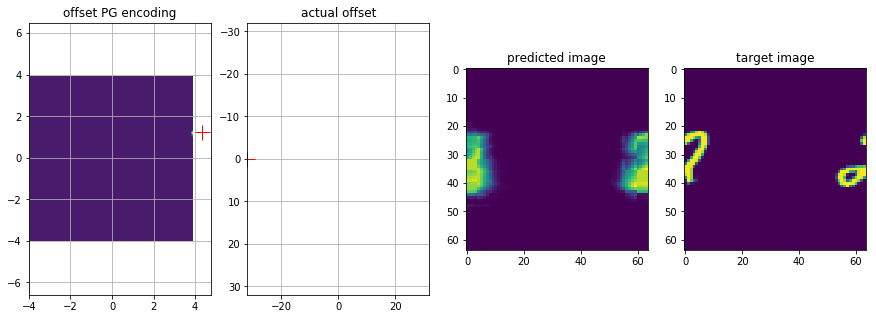

torch.Size([50, 1, 28, 28])
0 -28
[[-2.83395022  2.41280516]] [[-2.86578891  2.44732921]]


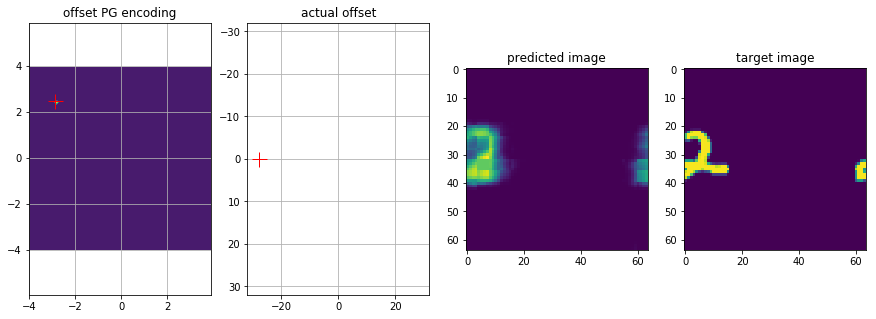

torch.Size([50, 1, 28, 28])
0 -24
[[-2.56677452  1.20785894]] [[-2.57678765  1.19294109]]


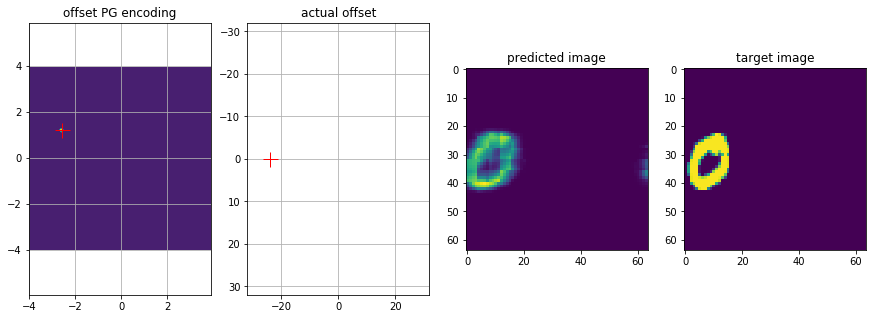

torch.Size([50, 1, 28, 28])
0 -20
[[-2.12371137  0.5972933 ]] [[-2.11043652  0.58596714]]


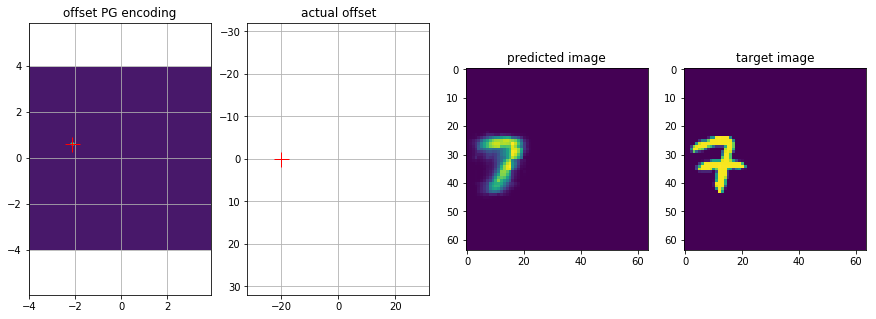

torch.Size([50, 1, 28, 28])
0 -16
[[-1.6515418   0.34900796]] [[-1.64559723  0.31581105]]


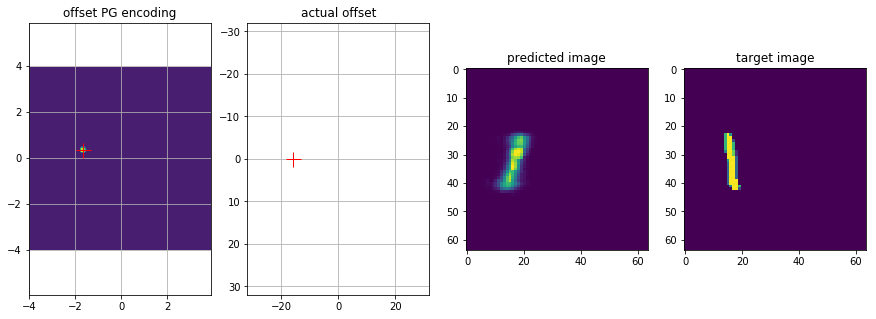

torch.Size([50, 1, 28, 28])
0 -12
[[-1.2370979   0.23308455]] [[-1.24087292  0.21150205]]


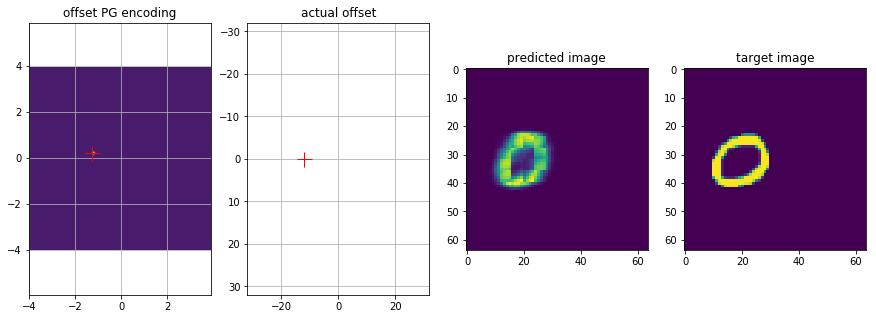

torch.Size([50, 1, 28, 28])
0 -8
[[-0.80501785  0.02242862]] [[-0.8141108   0.00703444]]


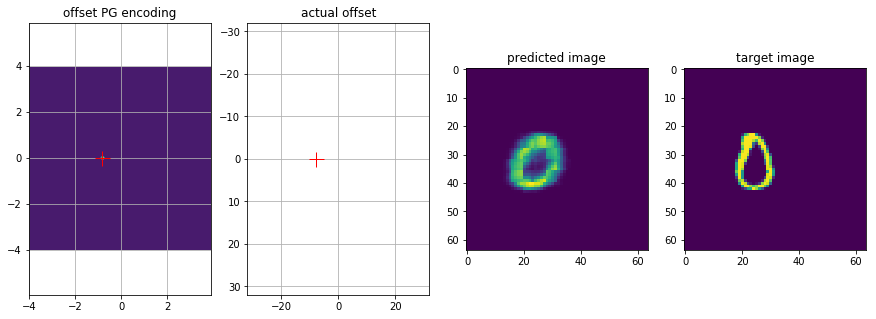

torch.Size([50, 1, 28, 28])
0 -4
[[-0.50398096 -0.059993  ]] [[-0.50935655 -0.07300605]]


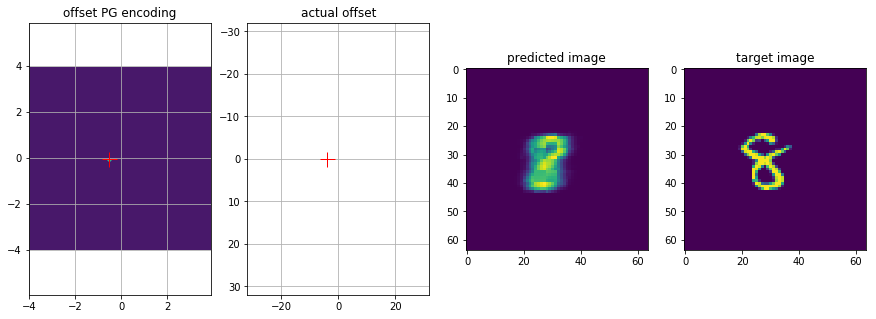

torch.Size([50, 1, 28, 28])
0 0
[[-0.13312798  0.02712689]] [[-0.14384621  0.01855993]]


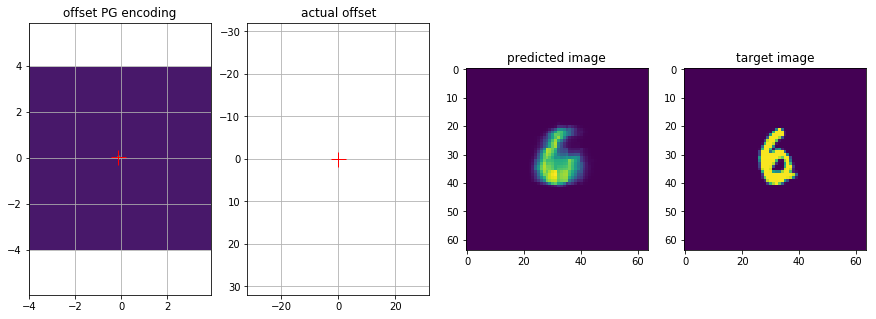

torch.Size([50, 1, 28, 28])
0 4
[[ 0.29539472 -0.14553433]] [[ 0.30750623 -0.14620726]]


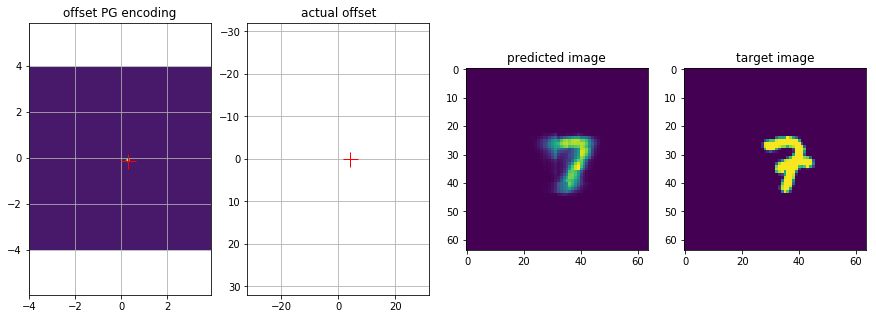

torch.Size([50, 1, 28, 28])
0 8
[[ 0.57309252 -0.09862857]] [[ 0.56212836 -0.11885343]]


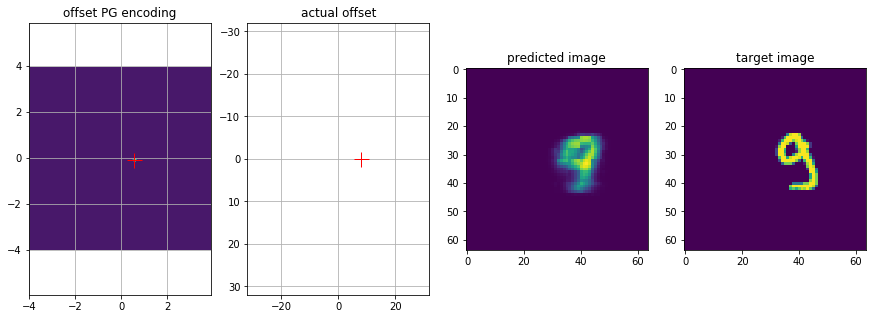

torch.Size([50, 1, 28, 28])
0 12
[[ 0.92953101  0.07842139]] [[ 0.95322659  0.07034624]]


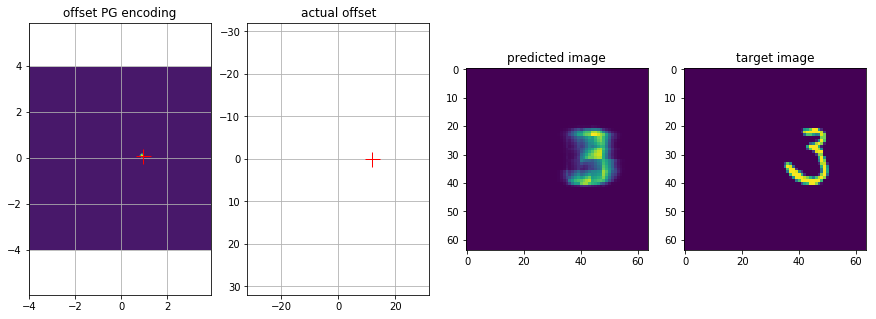

torch.Size([50, 1, 28, 28])
0 16
[[ 1.39227428 -0.0456875 ]] [[ 1.4392867  -0.02373649]]


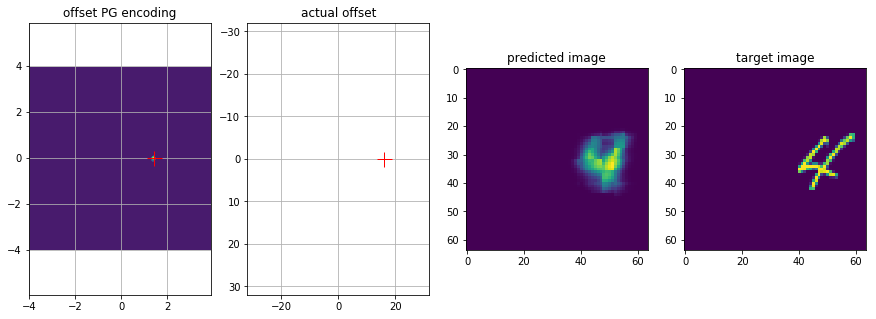

torch.Size([50, 1, 28, 28])
0 20
[[ 1.88470598 -0.03062522]] [[ 1.83273622 -0.01556488]]


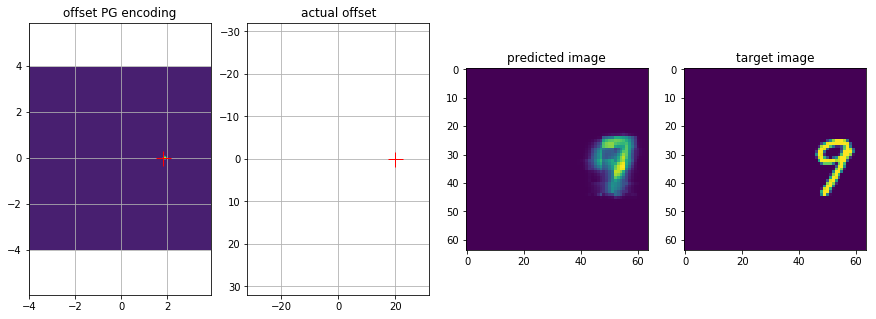

torch.Size([50, 1, 28, 28])
0 24
[[ 2.53007774  0.08896072]] [[ 2.51439137  0.09666849]]


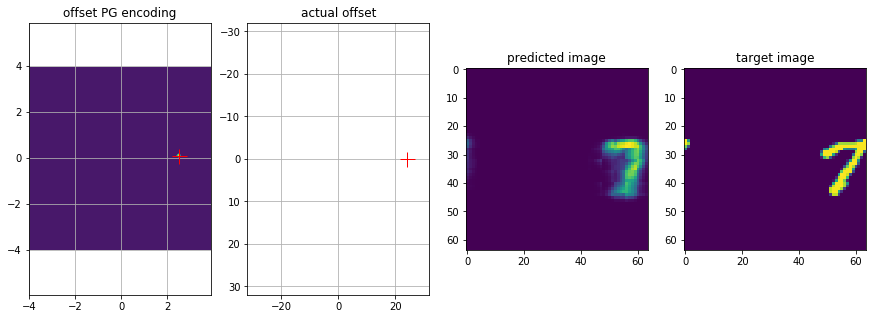

torch.Size([50, 1, 28, 28])
0 28
[[ 3.21509383  0.46142386]] [[ 3.19388847  0.4610079 ]]


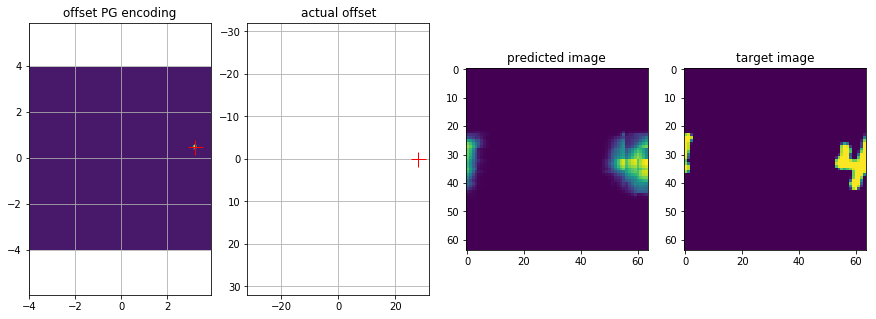

In [36]:
%matplotlib inline
import torch

from Where_act_code_VAE import couples_gen
from scipy.stats import multivariate_normal

import numpy as np
import torch.nn.functional as F


N_test = 10

for _ in range(-32,32,4): #range(N_test):
    '''i_offset = np.random.randint(args.size)
    j_offset = np.random.randint(args.size)'''
#     mid = np.int(ml.args.size / 2)
#     draw = np.random.multivariate_normal((0,0),((1,0),(0,1)))
#     i_offset = min(max(-mid, np.int(draw[0] * mid / 3)), mid)
#     j_offset = min(max(-mid, np.int(draw[1] * mid / 3)), mid)
    data, label = next(iter(ml.dataset.data_loader))
    print (data.shape)  
    idx = 0
    #label[idx] = 0
    i_offset = 0
    j_offset = _
    print(i_offset, j_offset)
    data_full, label_full, pos_full = couples_gen(data[idx, 0, :, :], label[idx], i_offset, j_offset, size=args.size, contrast=1.)
    label_full = np.array(label_full, dtype = 'double')
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(1, 4, figsize=((15, 5)))
    #ax[0].imshow(a_data)
    ax[3].imshow(data_full)
    ax[3].set_title('target image')
   
    mu_output, logvar_output, u_output, x_hat_logit_output = ml.model(torch.from_numpy(data_full[None, None, :, :]), 
                                                                      torch.from_numpy(label_full[None, :]),
                                                                      torch.from_numpy(pos_full[None, :]))[0:4]
    #ax[2].imshow(F.sigmoid(output[0, 0, :, :]).detach().numpy())
    #plt.title("("+str(i_offset)+","+str(j_offset)+"), label = "+str(label[idx].item()))
    #rep = torch.argmax(z_hat_logit_output).detach().numpy()

    #ig, ax = plt.subplots(1, 3, figsize=((13, 5)))
    #ax[0].plot(a_data)
    ax[1].plot(j_offset, i_offset, 'r+', ms = 15)
    ax[1].set_xlim([-32, 32])
    ax[1].set_ylim([32, -32])
    ax[1].xaxis.grid(True)
    ax[1].yaxis.grid(True)
    ax[1].set_title('actual offset')
    
    u_offset = u_output.detach().numpy()
    mu_offset = mu_output.detach().numpy()
    logvar_offset = logvar_output.detach().numpy()
    DIM1 = 0
    DIM2 = 1
    axe_x, axe_y = np.mgrid[-4:4:.1, -4:4:.1]
    q = multivariate_normal(mu_offset[0], np.exp(logvar_offset[0]) * np.eye(2))
    pos = np.empty(axe_x.shape + (2,))
    pos[:, :, DIM1] = axe_x; pos[:, :, DIM2] = axe_y

    print(mu_offset, u_offset)
    ax[0].contourf(axe_x, axe_y, q.pdf(pos))
    ax[0].plot(u_offset[0][0], u_offset[0][1], 'r+', ms = 15)
    ax[0].xaxis.grid(True)
    ax[0].set_xlim([-4, 4])
    ax[0].set_ylim([-4, 4])
    ax[0].yaxis.grid(True)
    ax[0].set_title('offset PG encoding')    
    ax[0].axis('equal')
    
    ax[2].imshow(F.sigmoid(x_hat_logit_output.view(64, 64)).detach().numpy())
    ax[2].set_title('predicted image')
    
    plt.show()    

-10 -10


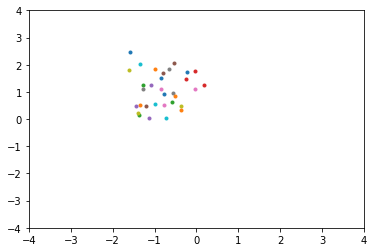

-10 -10


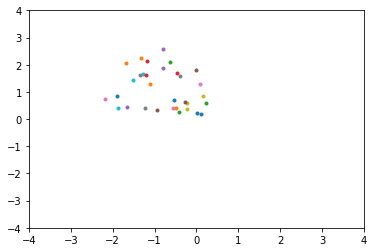

-10 -10


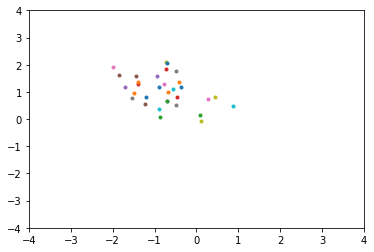

-10 -10


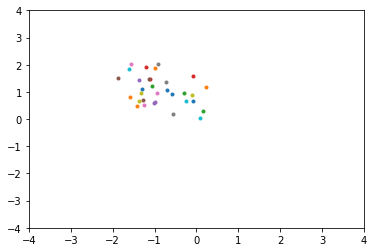

-10 -10


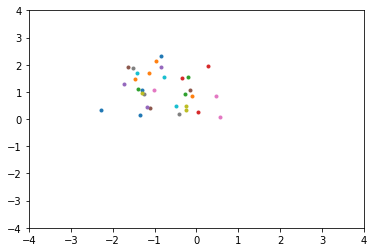

-10 -10


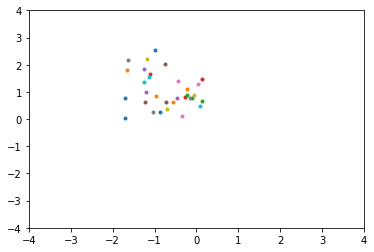

-10 -10


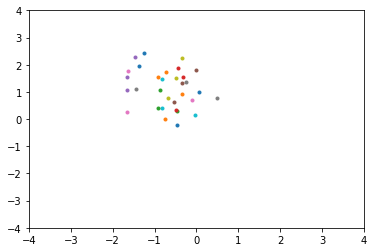

-10 -10


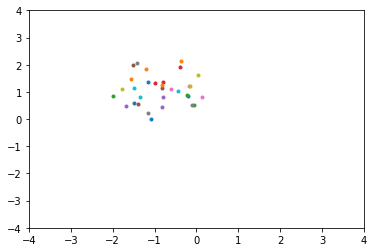

-10 -10


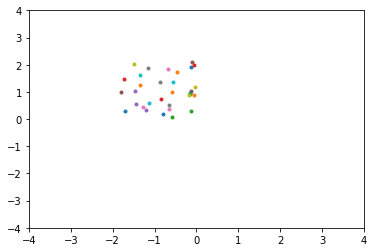

-10 -10


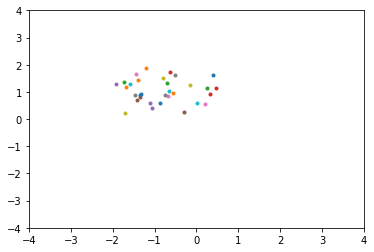

In [44]:
from Where_act_code_VAE import couples_gen
data, label = next(iter(ml.dataset.data_loader))
idx = 0
for z in range(10):
    label[idx] = z
    i_offset = -10
    j_offset = -10
    print(i_offset, j_offset)
    data_full, label_full, pos_full = couples_gen(data[idx, 0, :, :], label[idx], i_offset, j_offset, size=args.size, contrast=1.)
    label_full = np.array(label_full, dtype = 'double')
    x, d1, d2 = ml.model(torch.from_numpy(data_full[None, None, :, :]), 
                        torch.from_numpy(label_full[None, :]),
                        torch.from_numpy(pos_full[None, :]))[3:]
    plt.plot(d1.detach().numpy(),d2.detach().numpy(),'.')
    plt.xlim([-4, 4])
    plt.ylim([-4, 4])
    plt.show()



In [ ]:
_ = plt.plot(data_full)

In [ ]:
size = 256
grid_x, grid_y = np.abs(np.mgrid[-size/2:size/2, -size/2:size/2]) * 8 / size
pos = np.empty((size, size, 2))
pos[:, :, 0] = grid_x; pos[:, :, 1] = grid_y
d = multivariate_normal([0, 0], [[1, 0], [0, 1]])
mask = d.pdf(pos)
mask2 = np.exp(-20 * mask)
_ = plt.imshow(mask2)

In [ ]:
np.random.randn(5)

In [ ]:
output = ml.model(torch.from_numpy(data_full[None, None, :, :]))#.double())
output.shape

In [ ]:
output = torch.from_numpy(data_full[None, None, :, :].astype(np.float))
output.shape

In [ ]:
output = ml.model(torch.from_numpy(data_full[None, None, :, :])).detach().numpy()[0, 0, :, :]
output.shape

In [ ]:
output.min(), output.max()

In [ ]:
_ = plt.plot(a_data)

In [ ]:
draw = np.random.multivariate_normal((0,0),((1,0),(0,1)))

In [ ]:
plt.plot(ml.model.deconv1.bias.detach().numpy())

In [ ]:
plt.plot((1 + np.tanh(ml.model.fc4.bias.detach().numpy()))/2)

In [ ]:
plt.imshow(np.reshape(ml.model.fc4.bias.detach().numpy(),(64,64)))

In [ ]:
data, foo = next(iter(ml.dataset.data_loader))

In [ ]:
foo

In [ ]:
target_full = np.zeros(10, dtype = 'int')

In [ ]:
target_full

In [ ]:
loss_u = torch.zeros(1)